In [61]:
# Basic scientific computing
import os
import numpy as np
import scipy as sp
from scipy import stats
from scipy.linalg import expm
from scipy.optimize import nnls
from scipy.stats import entropy, pearsonr
import scipy.io
from sklearn.linear_model import LinearRegression

# Data manipulation and analysis
import pandas as pandas
import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Machine learning and dimensionality reduction
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_blobs
from umap.umap_ import UMAP

# Network analysis
import networkx as nx



In [131]:
# Define color palettes for plotting

# For diagnoses 
color_palette = {
    'Dementia': '#145A32',  # Deep evergreen
    'MCI': '#9ACD32',       # Yellow-green
    'CN': '#FFFACD'}        # Light yellow/cream

# For stage 
stage_palette = sns.color_palette([
    "#E6F3FF",  # Lightest blue
    "#B3D9FF",  # Light blue
    "#80BFFF",  # Medium blue
    "#FFB366",  # Light orange
    "#FF944D",  # Medium orange
    "#FF7533",  # Dark orange
    "#FF471A",  # Light red
    "#CC0000",  # Deep red
])

# Pastel palette
pastel_palette = sns.color_palette([
    "#FFE082",  # Darker pastel yellow
    "#FFCC80",  # Darker peach
    "#FFB74D",  # Medium peach
    "#FFA726",  # Medium salmon
    "#FF9800",  # Medium orange
    "#FB8C00",  # Darker orange
    "#F57C00",  # Deep orange
    "#EF6C00"   # Rich orange
])

# Archetype palette
archetype_palette = {
    'Diffuse': '#FFD93D', 
    'Entorhinal': '#FF6B6B'}

# Covariance palette
orange_cmap =LinearSegmentedColormap.from_list("yellow", ["#f4cca1", "#ff8c69","#ff5533", "#ff2200", "#760909"])

# Define region order
regions = ['Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Hippocampus','Left-Amygdala','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Hippocampus','Right-Amygdala','Right-VentralDC','ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate',	'ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal',	'ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate', 'ctx-rh-caudalmiddlefrontal', 'ctx-rh-cuneus','ctx-rh-entorhinal', 'ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal',	'ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate',	'ctx-rh-precentral',	'ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula']


In [196]:
# Load individual param op with common seed
parameters_all = pandas.read_csv('StaND results/final/Individual params.csv')

# Load individual seed op
seeding_all = pandas.read_csv('StaND results/final/Individual seeds.csv')

# Load subject-specific seeds and params
subject_specific_seeds_params = pandas.read_csv('StaND results/final/Individual seeds and params.csv')

# Load subtyping benchmark
params_subtypes_2_entorhinal = pandas.read_csv('StaND results/binary benchmark seeds/Optimized param - subtypes_2_entorhinalseed.csv')
params_subtypes_2_middletemporal = pandas.read_csv('StaND results/binary benchmark seeds/Optimized param - subtypes_2_middletemporal.csv')
params_subtypes_2_fusiform = pandas.read_csv('StaND results/binary benchmark seeds/Optimized param - subtypes_2_fusiform.csv')
params_subtypes_2_inferiortemporal = pandas.read_csv('StaND results/binary benchmark seeds/Optimized param - subtypes_2_inferiortemporal.csv')  

# Load empirical tau data
ebm_data = pandas.read_csv('EBM stage + tau/Stage + tau - version 9 final run.csv')
# FINAL: 'Cross-sectional stage and regional tau - version 9.csv'
# Organize columns in ebm_data to match the order in seeding_all
regions_order = ['Left-Cerebellum-Cortex', 'Left-Thalamus-Proper', 'Left-Hippocampus', 'Left-Amygdala', 'Left-VentralDC', 
                 'Right-Cerebellum-Cortex', 'Right-Thalamus-Proper', 'Right-Hippocampus', 'Right-Amygdala', 'Right-VentralDC',
                 'ctx-lh-bankssts', 'ctx-lh-caudalanteriorcingulate', 'ctx-lh-caudalmiddlefrontal', 'ctx-lh-cuneus', 
                 'ctx-lh-entorhinal', 'ctx-lh-fusiform', 'ctx-lh-inferiorparietal', 'ctx-lh-inferiortemporal', 
                 'ctx-lh-isthmuscingulate', 'ctx-lh-lateraloccipital', 'ctx-lh-lateralorbitofrontal', 'ctx-lh-lingual', 
                 'ctx-lh-medialorbitofrontal', 'ctx-lh-middletemporal', 'ctx-lh-parahippocampal', 'ctx-lh-paracentral', 
                 'ctx-lh-parsopercularis', 'ctx-lh-parsorbitalis', 'ctx-lh-parstriangularis', 'ctx-lh-pericalcarine', 
                 'ctx-lh-postcentral', 'ctx-lh-posteriorcingulate', 'ctx-lh-precentral', 'ctx-lh-precuneus', 
                 'ctx-lh-rostralanteriorcingulate', 'ctx-lh-rostralmiddlefrontal', 'ctx-lh-superiorfrontal', 
                 'ctx-lh-superiorparietal', 'ctx-lh-superiortemporal', 'ctx-lh-supramarginal', 'ctx-lh-frontalpole', 
                 'ctx-lh-temporalpole', 'ctx-lh-transversetemporal', 'ctx-lh-insula', 'ctx-rh-bankssts', 
                 'ctx-rh-caudalanteriorcingulate', 'ctx-rh-caudalmiddlefrontal', 'ctx-rh-cuneus', 'ctx-rh-entorhinal', 
                 'ctx-rh-fusiform', 'ctx-rh-inferiorparietal', 'ctx-rh-inferiortemporal', 'ctx-rh-isthmuscingulate', 
                 'ctx-rh-lateraloccipital', 'ctx-rh-lateralorbitofrontal', 'ctx-rh-lingual', 'ctx-rh-medialorbitofrontal', 
                 'ctx-rh-middletemporal', 'ctx-rh-parahippocampal', 'ctx-rh-paracentral', 'ctx-rh-parsopercularis', 
                 'ctx-rh-parsorbitalis', 'ctx-rh-parstriangularis', 'ctx-rh-pericalcarine', 'ctx-rh-postcentral', 
                 'ctx-rh-posteriorcingulate', 'ctx-rh-precentral', 'ctx-rh-precuneus', 'ctx-rh-rostralanteriorcingulate', 
                 'ctx-rh-rostralmiddlefrontal', 'ctx-rh-superiorfrontal', 'ctx-rh-superiorparietal', 
                 'ctx-rh-superiortemporal', 'ctx-rh-supramarginal', 'ctx-rh-frontalpole', 'ctx-rh-temporalpole', 
                 'ctx-rh-transversetemporal', 'ctx-rh-insula']
regions_to_exclude = ['Left-Pallidum', 'Right-Pallidum', 'Left-Accumbens-area', 'Right-Accumbens-area', 'Right-Putamen', 'Left-Putamen', 'Right-Caudate', 'Left-Caudate']
ebm_data = ebm_data.drop(columns=regions_to_exclude)
ebm_data = ebm_data[['Unnamed: 0','RID', 'Diagnosis', 'ml_stage'] + regions_order]

## Post Processing

In [197]:
# Define dataframes to process
dataframes = {
    'ebm': ebm_data,
    'seeding': seeding_all,
    'parameters': parameters_all,
    'params_entorhinal_seed': params_entorhinal_seed,
    'params_middletemporal_seed': params_middletemporal_seed,
    'params_fusiform_seed': params_fusiform_seed,
    'params_inferiortemporal_seed': params_inferiortemporal_seed,
    'subject_specific_seeds_params': subject_specific_seeds_params,
    'params_subtypes_2_entorhinal': params_subtypes_2_entorhinal,
    'params_subtypes_2_middletemporal': params_subtypes_2_middletemporal,
    'params_subtypes_2_fusiform': params_subtypes_2_fusiform,
    'params_subtypes_2_inferiortemporal': params_subtypes_2_inferiortemporal
}

def filter_dataframe(df):
    """Filter dataframe to remove CN subjects and stage 0"""
    return df[
        (df['Diagnosis'] != 'CN') & 
        (df['ml_stage'] != 0)
    ]

# Process all dataframes at once
filtered_dfs = {
    name: filter_dataframe(df) 
    for name, df in dataframes.items()
}

# Assign filtered dataframes back to original variable names
ebm_nonzero = filtered_dfs['ebm']
seeding_nonzero = filtered_dfs['seeding']
parameters_nonzero = filtered_dfs['parameters']
subject_specific_seeds_params_nonzero = filtered_dfs['subject_specific_seeds_params']
params_subtypes_2_entorhinal_nonzero = filtered_dfs['params_subtypes_2_entorhinal']
params_subtypes_2_middletemporal_nonzero = filtered_dfs['params_subtypes_2_middletemporal']
params_subtypes_2_fusiform_nonzero = filtered_dfs['params_subtypes_2_fusiform']
params_subtypes_2_inferiortemporal_nonzero = filtered_dfs['params_subtypes_2_inferiortemporal']

# Print value count for diagnostic categories
print(parameters_nonzero.Diagnosis.value_counts())


Diagnosis
MCI         104
Dementia     61
Name: count, dtype: int64


In [225]:
# Create data frames for each subtype and list of RIDs in each subtype
subtype1_nonzero = params_subtypes_2_inferiortemporal_nonzero[params_subtypes_2_inferiortemporal_nonzero['ml_subtype'] == 0]
subtype2_nonzero = params_subtypes_2_entorhinal_nonzero[params_subtypes_2_entorhinal_nonzero['ml_subtype'] == 1]
subtype1_RIDs = subtype1_nonzero['RID'].tolist()
subtype2_RIDs = subtype2_nonzero['RID'].tolist()


In [90]:
def process_by_diagnosis(df, include_cn=True):
    """
    Process dataframe by diagnosis and sort by stage
    
    Args:
        df: DataFrame to process
        include_cn: Whether to include CN in final concat (default True)
    """
    # Split and sort by diagnosis
    diagnosis_groups = {
        diag: df[df['Diagnosis'] == diag].sort_values(by='ml_stage')
        for diag in ['CN', 'MCI', 'Dementia']
    }
    
    # Calculate means for each group
    means = {
        f'means_{diag.lower()}': group.mean(numeric_only=True).to_frame().T
        for diag, group in diagnosis_groups.items()
    }
    
    # Concatenate groups based on include_cn flag
    groups_to_concat = ['MCI', 'Dementia'] if not include_cn else ['CN', 'MCI', 'Dementia']
    combined = pandas.concat([diagnosis_groups[diag] for diag in groups_to_concat], ignore_index=True)
    
    # Calculate overall means
    means['means'] = combined.mean(numeric_only=True).to_frame().T
    
    return combined, means, diagnosis_groups

# Process each dataset
parameters_by_diagnosis, param_means, param_groups = process_by_diagnosis(parameters_nonzero)
seeding_by_diagnosis, seed_means, seed_groups = process_by_diagnosis(seeding_nonzero, include_cn=False)
ebm_by_diagnosis, ebm_means, ebm_groups = process_by_diagnosis(ebm_nonzero)

# Assign individual group variables if needed
CN_param, MCI_param, AD_param = param_groups['CN'], param_groups['MCI'], param_groups['Dementia']
CN_seed, MCI_seed, AD_seed = seed_groups['CN'], seed_groups['MCI'], seed_groups['Dementia']
CN_ebm, MCI_ebm, AD_ebm = ebm_groups['CN'], ebm_groups['MCI'], ebm_groups['Dementia']

# Assign mean variables if needed
means_param = param_means['means']
means_param_CN = param_means['means_cn']
means_param_MCI = param_means['means_mci']
means_param_AD = param_means['means_dementia']
means_seed = seed_means['means']
means_seed_CN = seed_means['means_cn']
means_seed_MCI = seed_means['means_mci']
means_seed_AD = seed_means['means_dementia']

# Subject-specific parameters and cohort seed

   Unnamed: 0          RID  ml_stage       MSE         R     alpha      beta  \
0  325.812121  4836.266667  6.060606  0.033248  0.573919  0.245087  0.615486   

   gamma    s    b    p       k  
0    1.0  0.5  0.0  0.0  1000.0  


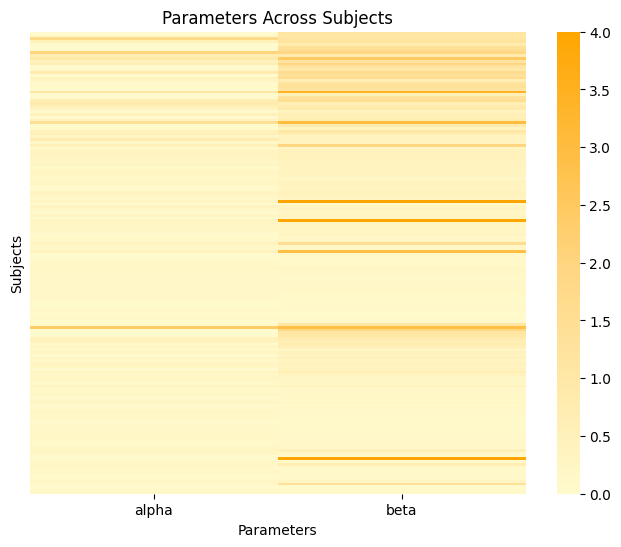

In [31]:
# Plot heat map of parameter values across subjects
yellow_palette = LinearSegmentedColormap.from_list("pale_yellow_to_orange", ["#FFFACD", "#FFD580", "#FFA500"])

plt.figure(figsize=(8, 6)) 
sns.heatmap(parameters_by_diagnosis.iloc[:,6:8], cmap=yellow_palette, yticklabels=False, vmin=0, vmax=4) 
plt.xlabel('Parameters')
plt.ylabel('Subjects')
plt.title('Parameters Across Subjects')

# Print average parameter values
print(means_param)

Average R value: 0.574


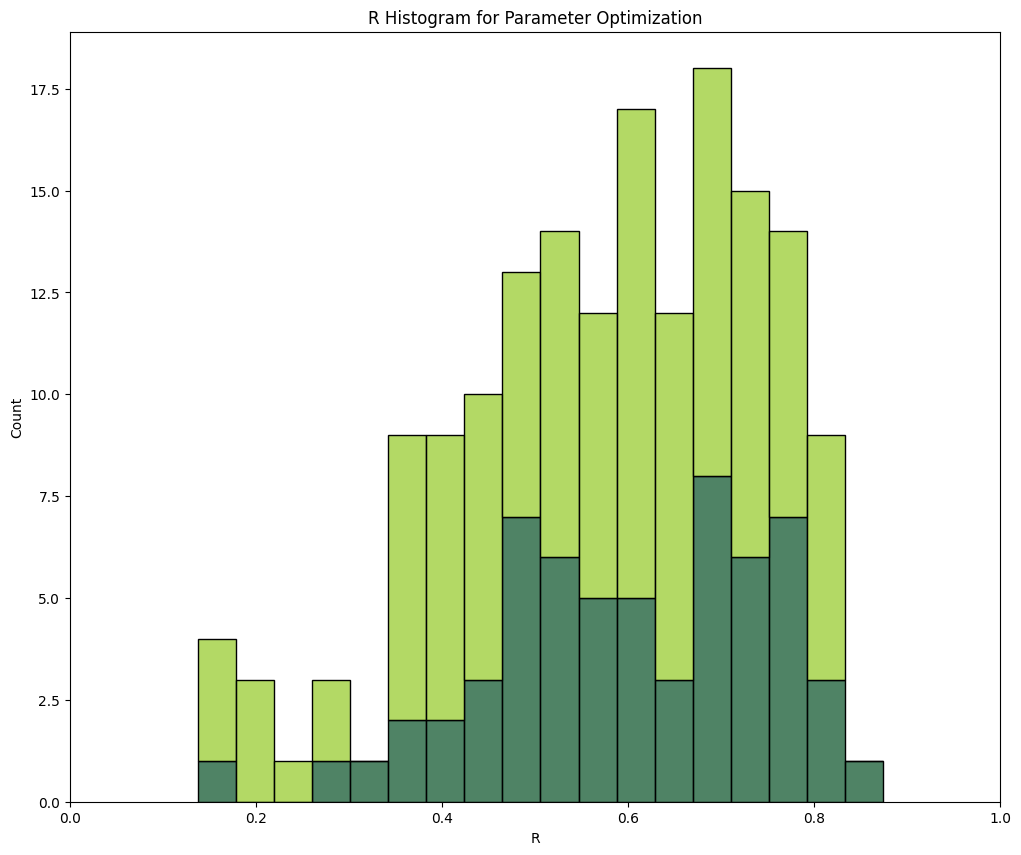

In [113]:
# Histogram for R
plt.figure(figsize=(12, 10))
ax = sns.histplot(data=parameters_nonzero, binwidth= 0.04, x='R', color = 'red', hue='Diagnosis', palette=color_palette, multiple='stack',legend=False)
plt.xlabel('R')
plt.ylabel('Count')
plt.title('R Histogram for Parameter Optimization')
plt.xlim(0, 1)
#plt.ylim(0, 55)
plt.show

# Print average R value
print(f"Average R value: {parameters_nonzero['R'].mean():.3f}")

# Subject-specific seeds 

In [114]:
# Calculating entropy across subjects for each region 
entropy_dict = {}

for region in seeding_by_diagnosis.columns[6:]: 
    tau_seed_values = seeding_by_diagnosis[region].values
    
    # Normalize the data 
    probability_distribution = tau_seed_values / tau_seed_values.sum()
    
    # Calculate the entropy for the region
    entropy_value = entropy(probability_distribution)
    entropy_dict[region] = entropy_value

entropy_df = pandas.DataFrame(list(entropy_dict.items()), columns=['Region', 'Entropy'])
mean_entropy = entropy_df['Entropy'].mean()
print('Mean entropy across regions: ' + str(mean_entropy))
sorted_entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)
top_5_regions = sorted_entropy_df.head(5)
print('Highest entropy regions: ' + str(sorted_entropy_df.head(5)))

Mean entropy across regions: 2.7459340124286022
Highest entropy regions:                          Region   Entropy
56  ctx-rh-lateralorbitofrontal  4.686832
19      ctx-lh-inferiortemporal  4.672678
5                 Left-Amygdala  4.647247
22  ctx-lh-lateralorbitofrontal  4.646726
53      ctx-rh-inferiortemporal  4.586909


/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/1505396801.py:8: RuntimeWarning: invalid value encountered in divide
  probability_distribution = tau_seed_values / tau_seed_values.sum()


Regions with highest average tau seed density: ['ctx-rh-entorhinal', 'ctx-lh-inferiortemporal', 'ctx-rh-inferiortemporal', 'ctx-lh-middletemporal', 'ctx-lh-entorhinal', 'Left-Amygdala', 'ctx-rh-middletemporal', 'Left-VentralDC', 'Right-Amygdala', 'Right-VentralDC', 'Left-Hippocampus', 'ctx-lh-fusiform', 'Right-Hippocampus', 'ctx-rh-fusiform', 'ctx-lh-bankssts', 'Left-Thalamus-Proper', 'ctx-rh-lateralorbitofrontal', 'ctx-lh-lateralorbitofrontal', 'ctx-rh-inferiorparietal', 'ctx-lh-inferiorparietal', 'Right-Thalamus-Proper', 'ctx-lh-precuneus', 'ctx-rh-bankssts', 'ctx-lh-temporalpole', 'ctx-rh-precuneus', 'ctx-rh-lateraloccipital', 'ctx-rh-caudalmiddlefrontal', 'ctx-rh-temporalpole', 'ctx-lh-lateraloccipital', 'ctx-rh-medialorbitofrontal', 'ctx-lh-parsorbitalis', 'ctx-rh-parsorbitalis', 'ctx-lh-medialorbitofrontal', 'ctx-rh-cuneus', 'ctx-lh-caudalmiddlefrontal', 'ctx-rh-rostralmiddlefrontal', 'ctx-lh-rostralmiddlefrontal', 'ctx-lh-lingual', 'ctx-lh-cuneus', 'ctx-lh-parsopercularis', 'ctx

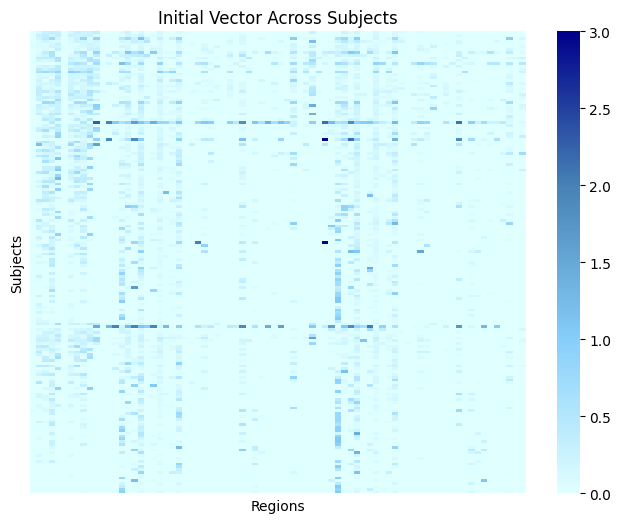

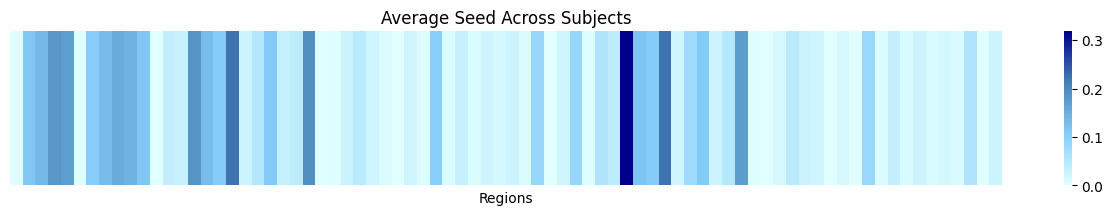

In [15]:
blue_cmap = LinearSegmentedColormap.from_list("custom_blue", ["#E0FFFF", "#87CEFA", "#4682B4", "#00008B"])

# Plot heat map of seeds across subjects
plt.figure(figsize=(8, 6)) 
sns.heatmap(seeding_by_diagnosis.iloc[:,8:], cmap=blue_cmap, xticklabels=False, yticklabels=False) # vmax = 0.6
plt.xlabel('Regions')
plt.ylabel('Subjects')
plt.title('Initial Vector Across Subjects')

# Plot average seed 
plt.figure(figsize=(16, 2)) 
sns.heatmap(means_seed.iloc[:, 7:], cmap=blue_cmap, xticklabels=False, yticklabels=False)
plt.xlabel('Regions')
plt.title('Average Seed Across Subjects')

#Sort regions by highest averages and print
sorted_regions = means_seed.iloc[:, 7:].sort_values(by=0, axis=1, ascending=False)
sorted_regions = sorted_regions.columns.tolist()
print('Regions with highest average tau seed density: ' + str(sorted_regions))
sorted_regions_MCI = means_seed_MCI.iloc[:, 7:].sort_values(by=0, axis=1, ascending=False)
sorted_regions_MCI = sorted_regions_MCI.columns.tolist()
print('Regions with highest average seed MCI: ' + str(sorted_regions_MCI))
sorted_regions_AD = means_seed_AD.iloc[:, 7:].sort_values(by=0, axis=1, ascending=False)
sorted_regions_AD = sorted_regions_AD.columns.tolist()
print('Regions with highest average seed AD: ' + str(sorted_regions_AD))

# Get mean values for top 5 regions with highest average seed
top_5_regions = sorted_regions[:5]
print("\nMean values for top 5 seeded regions:")
for region in top_5_regions:
    mean_value = means_seed[region].values[0]
    print(f"{region}: {mean_value:.6f}")

In [435]:
# Save average optimized seed for Pysurfer plotting
average_seed = means_seed.iloc[:, 5:]
average_seed.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/Pysurfer data/Average individually optimized seed - version 11.csv')

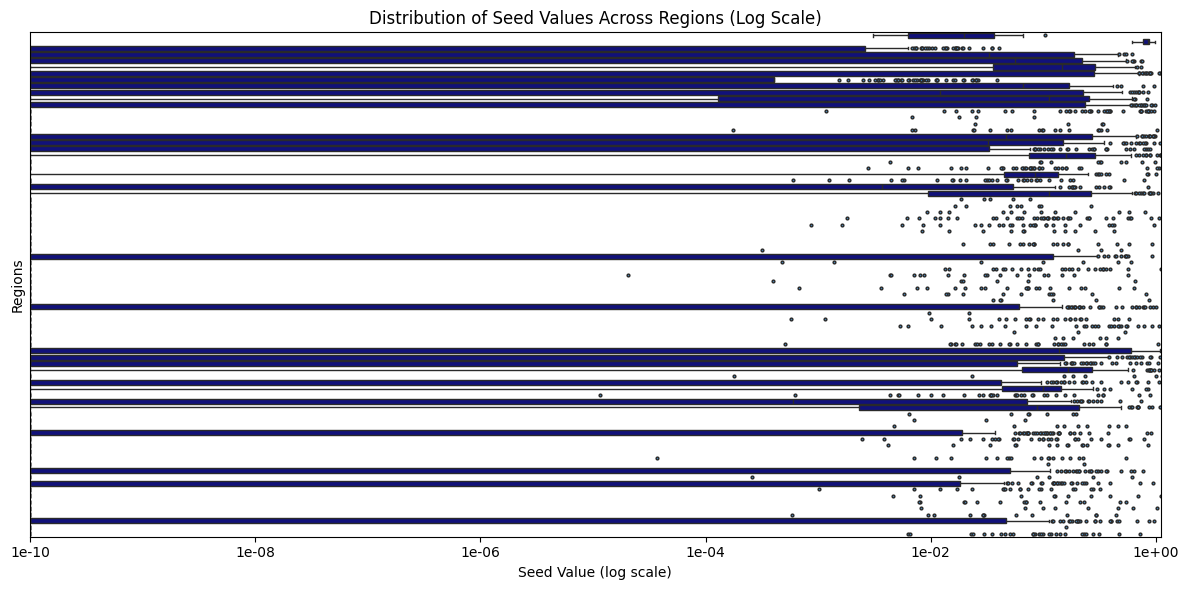

In [16]:
# Box plot of optimized seeds across regions

data_melted = seeding_nonzero.iloc[:, 6:].melt(var_name='Region', value_name='Seed Value')

data_melted['Seed Value'] = data_melted['Seed Value'].replace(0, 1e-10)

flierprops = dict(marker='o', markersize=2, linestyle='none', markerfacecolor='#4682B4')

plt.figure(figsize=(12, 6))
sns.boxplot(y='Region', x='Seed Value', data=data_melted, color='#00008B', showfliers=True, flierprops=flierprops)

plt.yticks([])
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Seed Value (log scale)')
plt.ylabel('Regions')
plt.title('Distribution of Seed Values Across Regions (Log Scale)')
plt.xlim(1e-10, 1.1)  
plt.minorticks_on()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0e}'))

plt.tight_layout()
plt.show()

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/1770622167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimization_data['stage_bin'] = pandas.cut(optimization_data['ml_stage'],
/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/1770622167.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Stage Range', bbox_to_anchor=(1.05, 1), loc='upper left')


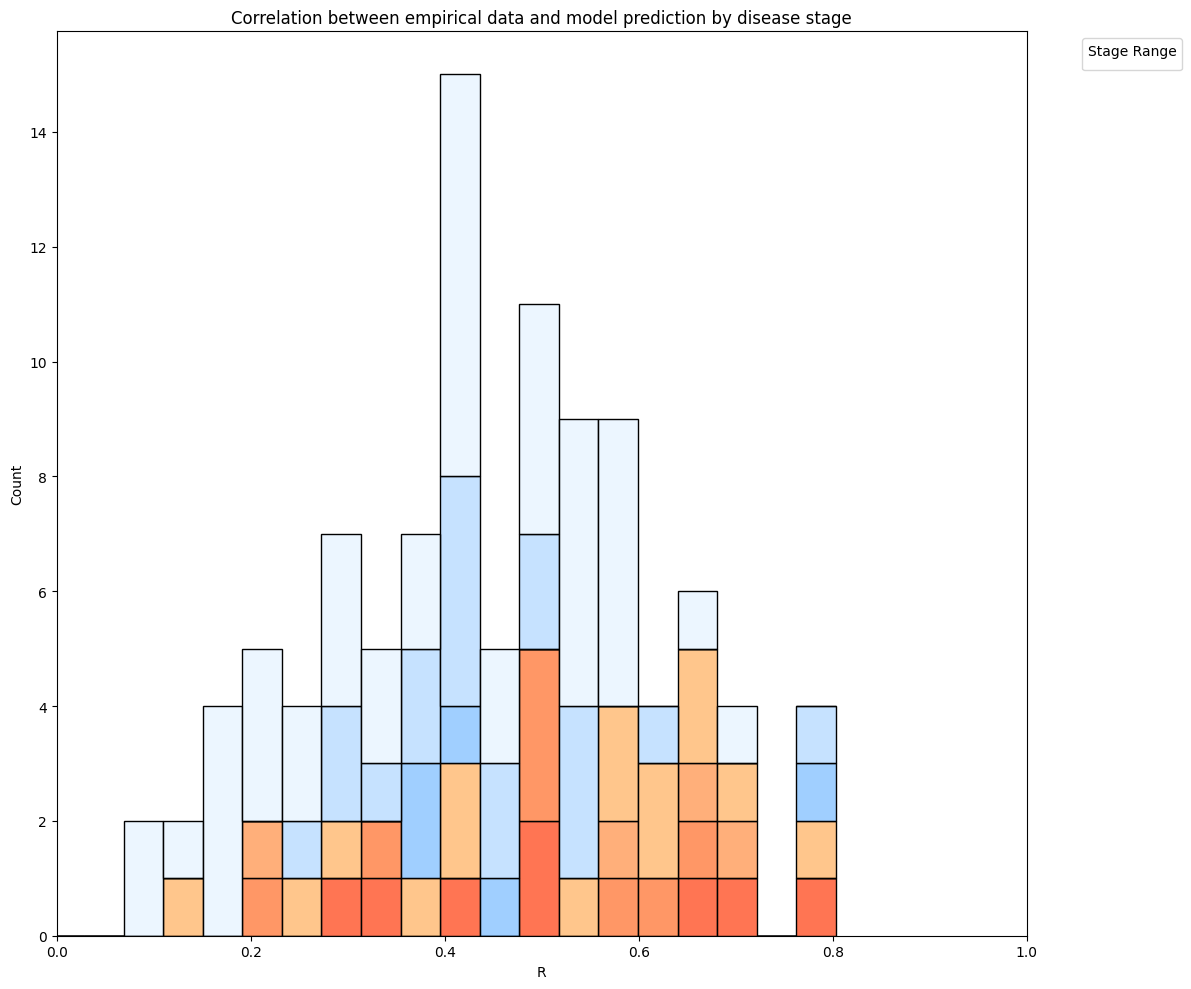

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/1770622167.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([''])



Mean R values by diagnosis:
Diagnosis
Dementia    0.498543
MCI         0.406293
Name: R, dtype: float64


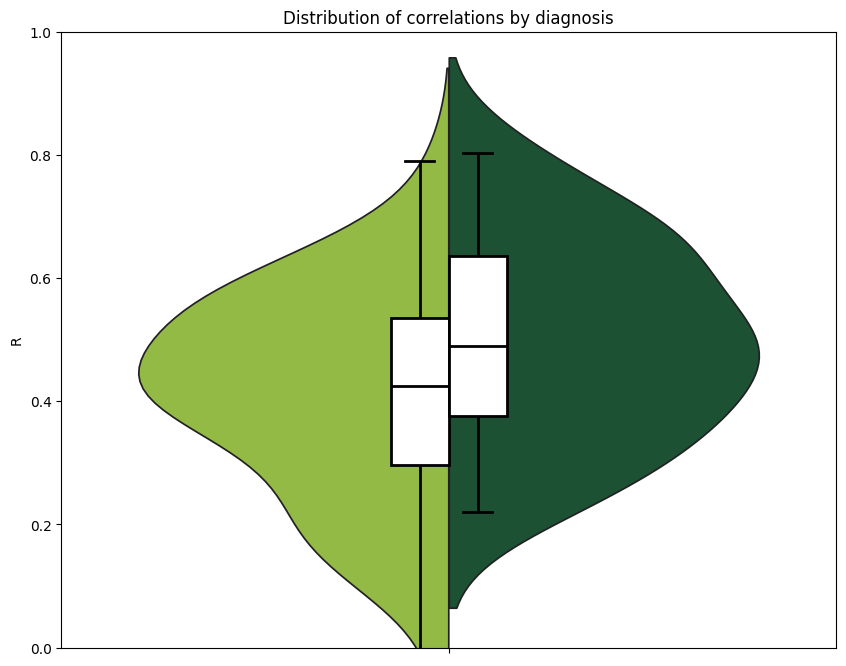

In [187]:
# GENERAL PURPOSE PLOTS

# Define data to plot
optimization_data = subtype1_nonzero

# Create histogram organized by stage
plt.figure(figsize=(12, 10))
optimization_data['stage_bin'] = pandas.cut(optimization_data['ml_stage'], 
                                        bins=[0, 2, 4, 6, 8, 10, 12, 14, 16],
                                        labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16'])

ax = sns.histplot(data=optimization_data, x='R', binwidth=0.04, 
                  hue='stage_bin', multiple='stack', 
                  palette=stage_palette, legend=True)

plt.xlabel('R')
plt.ylabel('Count')
plt.title('Correlation between empirical data and model prediction by disease stage')
plt.xlim(0, 1)
plt.legend(title='Stage Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Print mean R by diagnosis
print("\nMean R values by diagnosis:")
print(optimization_data.groupby('Diagnosis')['R'].mean())

# Create violin plot 
plt.figure(figsize=(10, 8))
violin_data = optimization_data[optimization_data['Diagnosis'].isin(['MCI', 'Dementia'])]

# Create violin plot
sns.violinplot(data=violin_data, 
               x=['dummy']*len(violin_data), 
               y='R',
               hue='Diagnosis', 
               split=True,
               palette=color_palette, 
               legend=False,
               inner=None)  # Remove the inner box plot as we'll add our own

# Add box plots 
sns.boxplot(data=violin_data,
            x=['dummy']*len(violin_data),
            y='R',
            hue='Diagnosis',
            width=0.15,         
            showfliers=False,   
            linewidth=2,
            legend=False,
            boxprops={'facecolor': 'white', 'edgecolor': 'black'},
            whiskerprops={'color': 'black'},
            capprops={'color': 'black'},
            medianprops={'color': 'black'})      

plt.ylim(0, 1)  # Set y-axis limits
plt.title('Distribution of correlations by diagnosis')
plt.xlabel('')  # Remove x-label since we're using a dummy variable
plt.ylabel('R')
plt.gca().set_xticklabels([''])
plt.show()

## Exploring Heterogeneity of Optimized Seeds

### Covariances Matrices and SVD

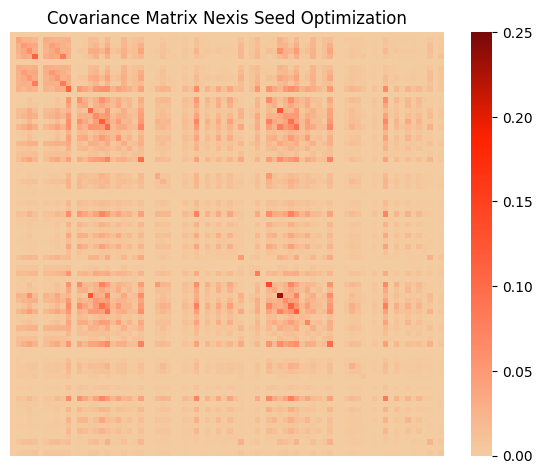

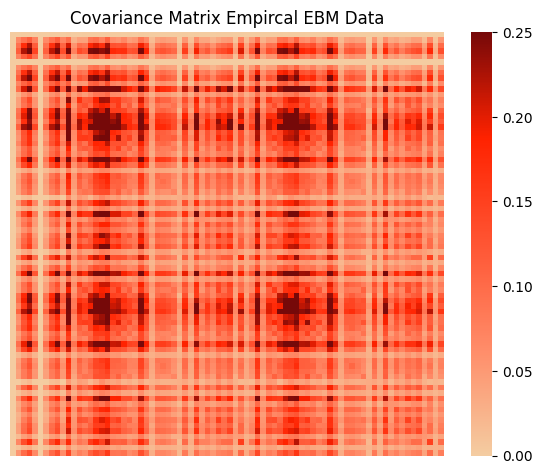

In [240]:
# Convert relevant columns to numeric, coercing errors to NaN
seeding_nonzero.iloc[:, 8:] = seeding_nonzero.iloc[:, 8:].apply(pandas.to_numeric, errors='coerce')
ebm_nonzero.iloc[:, 4:] = ebm_nonzero.iloc[:, 4:].apply(pandas.to_numeric, errors='coerce')

# Check for NaN values and handle them 
seeding_nonzero = seeding_nonzero.dropna(subset=seeding_nonzero.columns[8:], how='any')
ebm_nonzero = ebm_nonzero.dropna(subset=ebm_nonzero.columns[4:], how='any')

# Initialize the sum matrices
n = len(seeding_nonzero) # Number of subjects
Sum_seed = np.zeros((78, 78))
Sum_ebm = np.zeros((78, 78))

# Loop through all subjects
for i in range(len(seeding_nonzero)):
    x0_i = seeding_nonzero.iloc[i, 8:].values.astype(np.float64) 
    M_i = np.outer(x0_i, x0_i)
    Sum_seed += M_i

    x_i = ebm_nonzero.iloc[i, 4:].values.astype(np.float64)  
    M_i_ebm = np.outer(x_i, x_i)
    Sum_ebm += M_i_ebm

# Compute the average
E_model = Sum_seed / n
E_ebm= Sum_ebm / n

plt.figure(figsize=(7, 5.5)) 
sns.heatmap(E_model, cmap=orange_cmap, vmin=0, xticklabels=False, yticklabels=False, vmax = 0.25)
plt.title('Covariance Matrix Nexis Seed Optimization')

plt.figure(figsize=(7, 5.5)) 
sns.heatmap(E_ebm, cmap=orange_cmap, vmin=0, xticklabels=False, yticklabels=False, vmax = 0.25)
plt.title('Covariance Matrix Empircal EBM Data')

# Take the diagonal of both plot on PySurfer
Variance_model = np.diag(E_model)
Variance_ebm= np.diag(E_ebm)

# SVD and EVD for E_model matrix
U_model, S_model, VT_model = np.linalg.svd(E_model)
eigenvalues_model, eigenvectors_model = np.linalg.eig(E_model)

# SVD and EVD for E_ebm matrix
U_ebm, S_ebm, VT_ebm = np.linalg.svd(E_ebm)
eigenvalues_ebm, eigenvectors_ebm = np.linalg.eig(E_ebm)

In [241]:
# How much variance is explained by the top 4 components?
total_variance = np.sum(S_model**2)  # Sum of squares of all singular values
variance_explained_4 = np.sum(S_model[:4]**2) / total_variance * 100

# For first 4 components:
print(f"Variance explained by top 4 components: {variance_explained_4:.2f}%")

# Individual contributions:
for i in range(4):
    print(f"Component {i+1}: {(S_model[i]**2/total_variance*100):.2f}%")

Variance explained by top 4 components: 96.84%
Component 1: 80.19%
Component 2: 11.35%
Component 3: 4.04%
Component 4: 1.26%


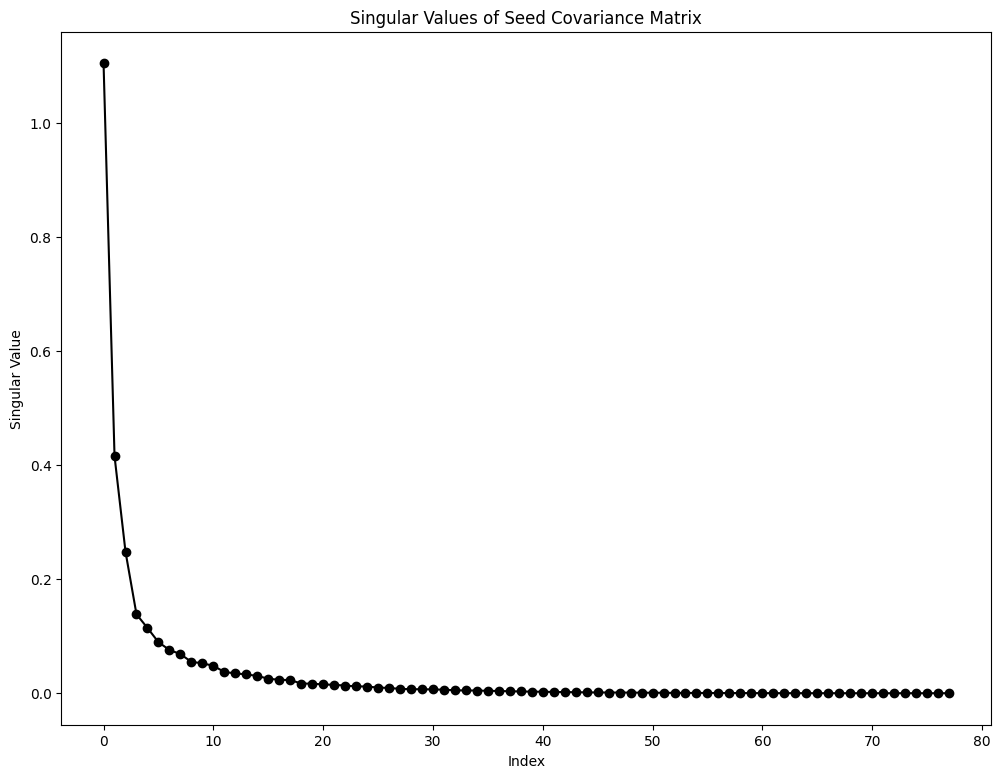

In [242]:
# Plot the singular values of E_model
plt.figure(figsize=(12, 9))
plt.plot(S_model, marker='o', linestyle='-', color = 'black')
plt.title('Singular Values of Seed Covariance Matrix')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.show()

Vector 1:
 Highest value: 0.2535 at region ctx-lh-inferiortemporal
 2nd Highest value: 0.2477 at region ctx-rh-inferiorparietal
 Lowest value: -0.0000 at region ctx-lh-postcentral
 2nd Lowest value: -0.0000 at region ctx-rh-postcentral

Vector 2:
 Highest value: 0.4176 at region ctx-rh-entorhinal
 2nd Highest value: 0.2490 at region ctx-lh-entorhinal
 Lowest value: -0.2281 at region ctx-lh-inferiorparietal
 2nd Lowest value: -0.2167 at region ctx-rh-caudalmiddlefrontal

Vector 3:
 Highest value: 0.5903 at region ctx-rh-entorhinal
 2nd Highest value: 0.3277 at region ctx-lh-entorhinal
 Lowest value: -0.3820 at region Left-VentralDC
 2nd Lowest value: -0.3381 at region Right-VentralDC

Vector 4:
 Highest value: 0.6165 at region ctx-rh-caudalmiddlefrontal
 2nd Highest value: 0.2331 at region ctx-rh-middletemporal
 Lowest value: -0.2801 at region ctx-rh-lateraloccipital
 2nd Lowest value: -0.2420 at region ctx-lh-lateraloccipital



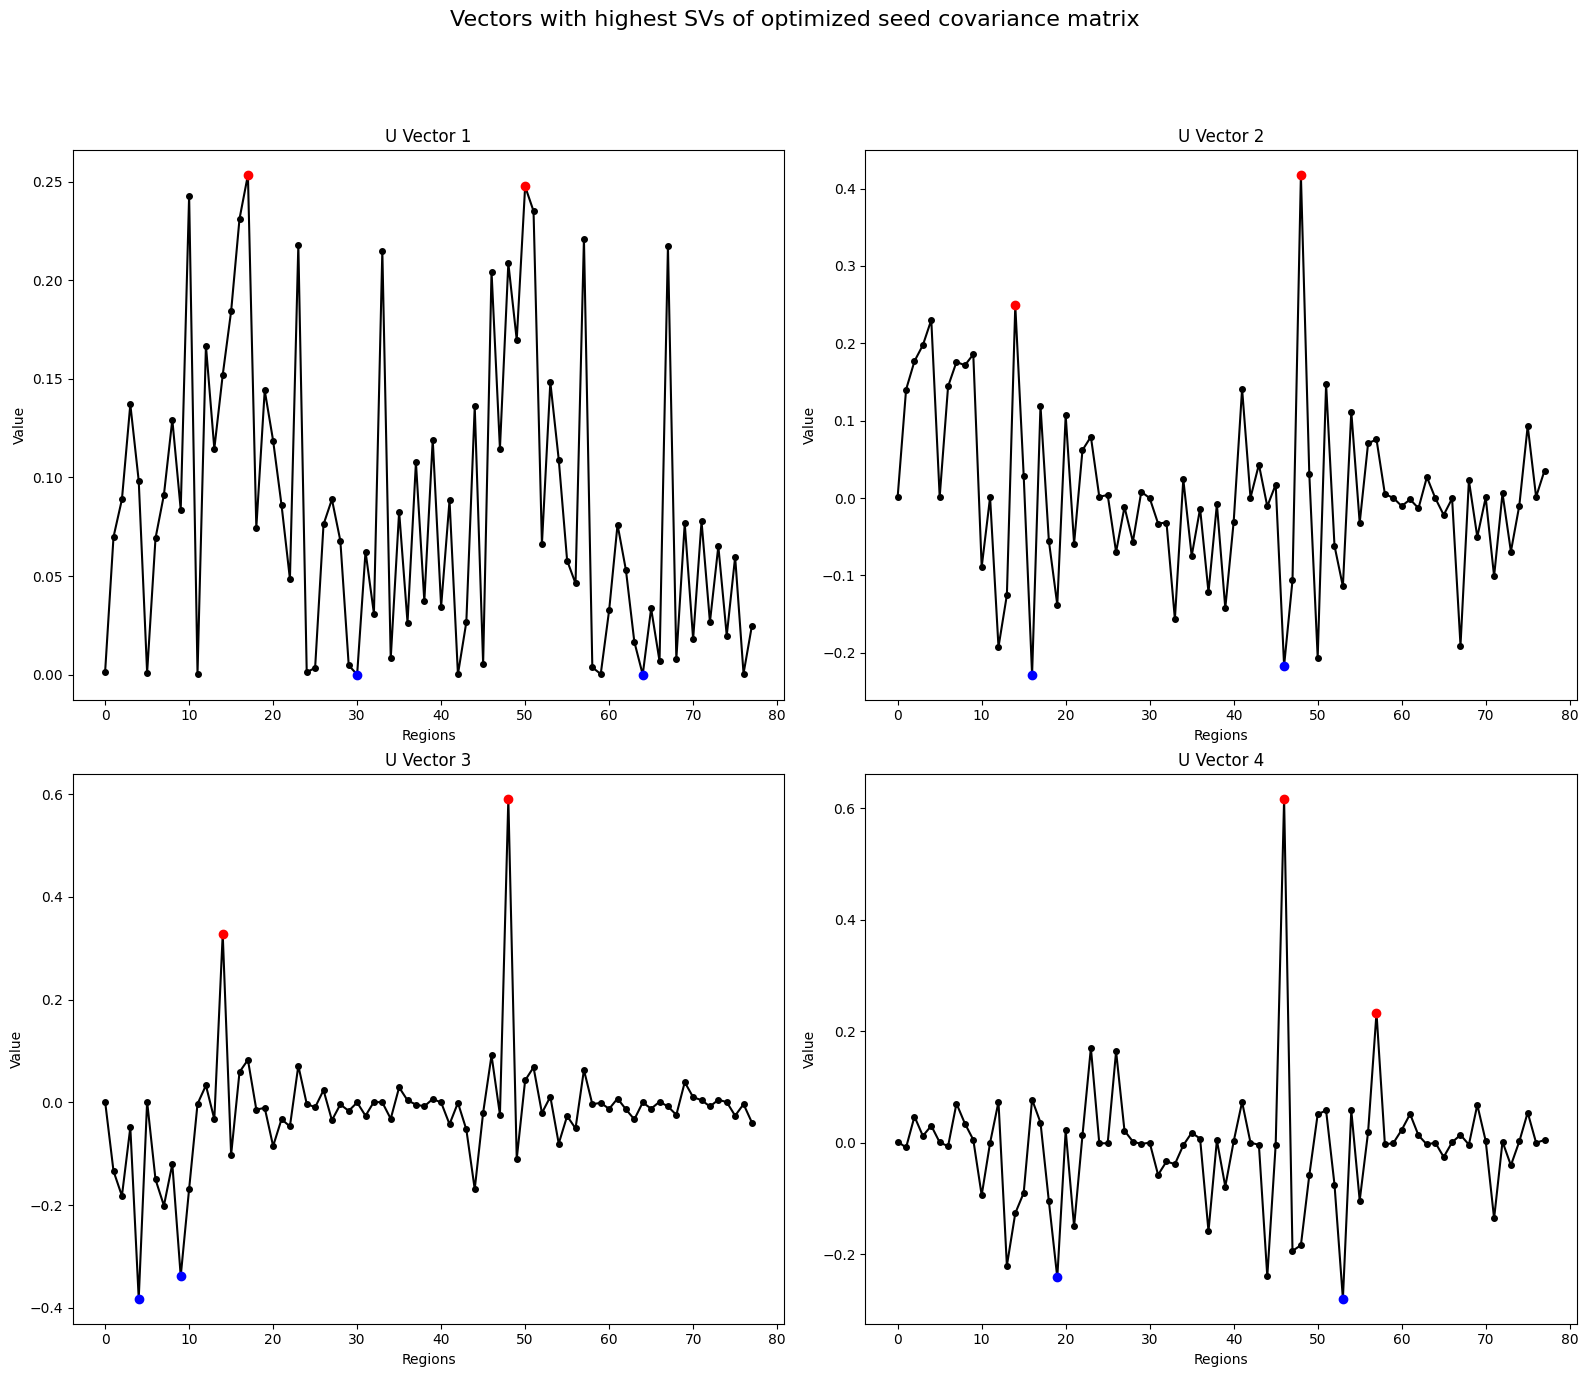

In [243]:
# Select top 4 vectors SVs and corresponding vectors
sorted_indices = np.argsort(S_model)[::-1]
sorted_singular_values = S_model[sorted_indices]
sorted_U = U_model[:, sorted_indices]
top_U_vectors = sorted_U[:, :4]
top_SV = sorted_singular_values[:4]

# Flip the sign of vectors 1,2, and 4
top_U_vectors[:, 0] = pandas.Series(np.negative(top_U_vectors[:, 0]))
top_U_vectors[:, 1] = pandas.Series(np.negative(top_U_vectors[:, 1]))
top_U_vectors[:, 3] = pandas.Series(np.negative(top_U_vectors[:, 3]))

# Find the highest and lowest values in top_U_vectors (to determine the scale of pysurfer plots)
max_value = np.max(top_U_vectors)
min_value = np.min(top_U_vectors)

# Plot the top 4 vectors in U
fig, axs = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Vectors with highest SVs of optimized seed covariance matrix', fontsize=16)

for i in range(4):
    column = top_U_vectors[:, i]
    
    # Get indices of sorted column (in descending order)
    sorted_indices = np.argsort(column)[::-1]
    
    # Highest and second highest
    max_index = sorted_indices[0]
    second_max_index = sorted_indices[1]
    max_region = regions[max_index]
    second_max_region = regions[second_max_index]
    
    # Lowest and second lowest
    min_index = sorted_indices[-1]
    second_min_index = sorted_indices[-2]
    min_region = regions[min_index]
    second_min_region = regions[second_min_index]
    
    print(f"Vector {i+1}:")
    print(f" Highest value: {column[max_index]:.4f} at region {max_region}")
    print(f" 2nd Highest value: {column[second_max_index]:.4f} at region {second_max_region}")
    print(f" Lowest value: {column[min_index]:.4f} at region {min_region}")
    print(f" 2nd Lowest value: {column[second_min_index]:.4f} at region {second_min_region}")
    print()
    
    row = i // 2
    col = i % 2
    axs[row, col].plot(column, color='black', marker='o', linestyle='-', markersize=4)
    axs[row, col].set_title(f'U Vector {i+1}')
    axs[row, col].set_xlabel('Regions')
    axs[row, col].set_ylabel('Value')
    
    axs[row, col].plot(max_index, column[max_index], color='red', marker='o', markersize=6)
    axs[row, col].plot(min_index, column[min_index], color='blue', marker='o', markersize=6)
    axs[row, col].plot(second_max_index, column[second_max_index], color='red', marker='o', markersize=6)
    axs[row, col].plot(second_min_index, column[second_min_index], color='blue', marker='o', markersize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Adjust the top margin to accommodate the main title
plt.show()

In [244]:
# Assign each subject to the singular vector with the highest correlation

vector_assignments = []
for i in range(len(seeding_nonzero)): # Loop through subjects
    seed_vec = seeding_nonzero.iloc[i, 8:86].values
    highest_correlation = -1  # Initialize to -1 since correlations range from -1 to 1
    vector_assignment = -1
    for j in range(top_U_vectors.shape[1]):
        correlation, _ = pearsonr(top_U_vectors[:, j], seed_vec)
        if abs(correlation) > highest_correlation:
            highest_correlation = abs(correlation)
            vector_assignment = j
    vector_assignments.append(vector_assignment)

vector_assignments_df = pandas.DataFrame(vector_assignments, columns=['Singular Vector Assignment'])
seeding_nonzero = seeding_nonzero.reset_index(drop=True)
vector_assignments_df = vector_assignments_df.reset_index(drop=True)
seeding_nonzero_wvecs = pandas.concat([seeding_nonzero, vector_assignments_df], axis=1)
seeding_nonzero_wvecs_MCI = seeding_nonzero_wvecs[seeding_nonzero_wvecs['Diagnosis']=='MCI']
seeding_nonzero_wvecs_AD = seeding_nonzero_wvecs[seeding_nonzero_wvecs['Diagnosis']=='Dementia']

# Add archetype assignments based on singular vector assignments
seeding_nonzero_wvecs['archetype_assignment'] = seeding_nonzero_wvecs['Singular Vector Assignment'].map({
    0: 'diffuse',
    1: 'entorhinal', 
    2: 'entorhinal'
}).fillna(np.nan)

print('Total:\n', vector_assignments_df['Singular Vector Assignment'].value_counts().to_string())
print('\nMCI:\n', seeding_nonzero_wvecs_MCI['Singular Vector Assignment'].value_counts().to_string())
print('\nDementia:\n', seeding_nonzero_wvecs_AD['Singular Vector Assignment'].value_counts().to_string())

Total:
 Singular Vector Assignment
2    61
1    60
0    41
3     3

MCI:
 Singular Vector Assignment
1    44
2    36
0    22
3     2

Dementia:
 Singular Vector Assignment
2    25
0    19
1    16
3     1


In [41]:
seeding_nonzero_wvecs.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/seed archetype results/covariance_vector_assignments.csv')

In [259]:
# Get full timeseries for each archetype, calculate the mean, and save to csv for pysurfer plotting
import pickle
with open('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/StaND results/final/timeseries_all_dict_ss_seeds_and_params.pkl', 'rb') as f:
    timeseries_dict = pickle.load(f)

# Get RIDs for each archetype
diffuse_RIDs = seeding_nonzero_wvecs[seeding_nonzero_wvecs['archetype_assignment'] == 'diffuse']['RID'].tolist()
entorhinal_RIDs = seeding_nonzero_wvecs[seeding_nonzero_wvecs['archetype_assignment'] == 'entorhinal']['RID'].tolist()

# Create separate dictionaries for each archetype
diffuse_timeseries = {}
entorhinal_timeseries = {}

# Populate the dictionaries based on RID lists
for rid in diffuse_RIDs:
    if rid in timeseries_dict:
        diffuse_timeseries[rid] = timeseries_dict[rid]

for rid in entorhinal_RIDs:
    if rid in timeseries_dict:
        entorhinal_timeseries[rid] = timeseries_dict[rid]

# Save the new dictionaries as pickle files
with open('StaND results/final/timeseries_diffuse_archetype.pkl', 'wb') as f:
    pickle.dump(diffuse_timeseries, f)

with open('StaND results/final/timeseries_entorhinal_archetype.pkl', 'wb') as f:
    pickle.dump(entorhinal_timeseries, f)

# Define the column names in the correct order
columns = ['Left-Cerebellum-Cortex', 'Left-Thalamus-Proper', 'Left-Hippocampus', 'Left-Amygdala', 
          'Left-VentralDC', 'Right-Cerebellum-Cortex', 'Right-Thalamus-Proper', 'Right-Hippocampus', 
          'Right-Amygdala', 'Right-VentralDC', 
          'ctx-lh-bankssts', 'ctx-lh-caudalanteriorcingulate', 'ctx-lh-caudalmiddlefrontal',
          'ctx-lh-cuneus', 'ctx-lh-entorhinal', 'ctx-lh-fusiform', 'ctx-lh-inferiorparietal',
          'ctx-lh-inferiortemporal', 'ctx-lh-isthmuscingulate', 'ctx-lh-lateraloccipital',
          'ctx-lh-lateralorbitofrontal', 'ctx-lh-lingual', 'ctx-lh-medialorbitofrontal',
          'ctx-lh-middletemporal', 'ctx-lh-parahippocampal', 'ctx-lh-paracentral',
          'ctx-lh-parsopercularis', 'ctx-lh-parsorbitalis', 'ctx-lh-parstriangularis',
          'ctx-lh-pericalcarine', 'ctx-lh-postcentral', 'ctx-lh-posteriorcingulate',
          'ctx-lh-precentral', 'ctx-lh-precuneus', 'ctx-lh-rostralanteriorcingulate',
          'ctx-lh-rostralmiddlefrontal', 'ctx-lh-superiorfrontal', 'ctx-lh-superiorparietal',
          'ctx-lh-superiortemporal', 'ctx-lh-supramarginal', 'ctx-lh-frontalpole',
          'ctx-lh-temporalpole', 'ctx-lh-transversetemporal', 'ctx-lh-insula',
          'ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate', 'ctx-rh-caudalmiddlefrontal',
          'ctx-rh-cuneus', 'ctx-rh-entorhinal', 'ctx-rh-fusiform', 'ctx-rh-inferiorparietal',
          'ctx-rh-inferiortemporal', 'ctx-rh-isthmuscingulate', 'ctx-rh-lateraloccipital',
          'ctx-rh-lateralorbitofrontal', 'ctx-rh-lingual', 'ctx-rh-medialorbitofrontal',
          'ctx-rh-middletemporal', 'ctx-rh-parahippocampal', 'ctx-rh-paracentral',
          'ctx-rh-parsopercularis', 'ctx-rh-parsorbitalis', 'ctx-rh-parstriangularis',
          'ctx-rh-pericalcarine', 'ctx-rh-postcentral', 'ctx-rh-posteriorcingulate',
          'ctx-rh-precentral', 'ctx-rh-precuneus', 'ctx-rh-rostralanteriorcingulate',
          'ctx-rh-rostralmiddlefrontal', 'ctx-rh-superiorfrontal', 'ctx-rh-superiorparietal',
          'ctx-rh-superiortemporal', 'ctx-rh-supramarginal', 'ctx-rh-frontalpole',
          'ctx-rh-temporalpole', 'ctx-rh-transversetemporal', 'ctx-rh-insula']

# Initialize lists to store all timeseries
diffuse_all_series = []
entorhinal_all_series = []

# Convert each subject's timeseries to a DataFrame and collect them
for rid, series in diffuse_timeseries.items():
    df = pandas.DataFrame(series).T  # Transpose here
    df.columns = columns
    diffuse_all_series.append(df)
    
for rid, series in entorhinal_timeseries.items():
    df = pandas.DataFrame(series).T  # Transpose here
    df.columns = columns
    entorhinal_all_series.append(df)

# Calculate mean across all subjects for each archetype
diffuse_mean_series = pandas.concat(diffuse_all_series).groupby(level=0).mean()
entorhinal_mean_series = pandas.concat(entorhinal_all_series).groupby(level=0).mean()

# Add index column
diffuse_mean_series.index = range(len(diffuse_mean_series))
entorhinal_mean_series.index = range(len(entorhinal_mean_series))
diffuse_mean_series.index.name = 'Unnamed: 0'
entorhinal_mean_series.index.name = 'Unnamed: 0'

# Save the average timeseries
diffuse_mean_series.to_csv('StaND results/final/average_timeseries_diffuse_archetype.csv')
entorhinal_mean_series.to_csv('StaND results/final/average_timeseries_entorhinal_archetype.csv')

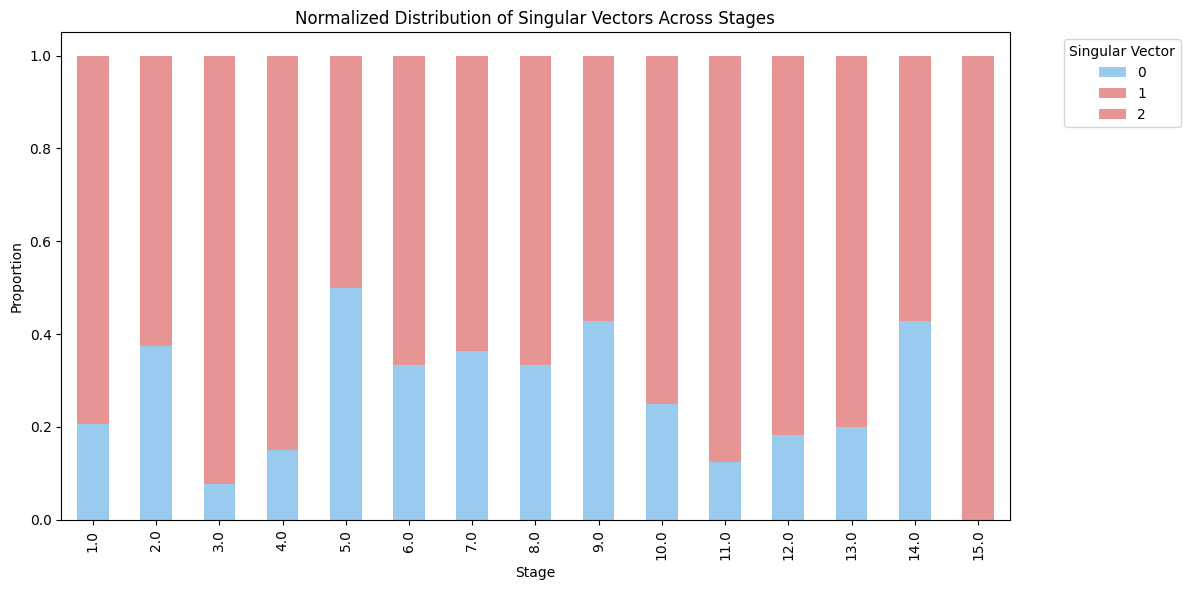

In [139]:
# Create a normalized stacked bar plot of highest SVs for each stage

# Group by stage and count the occurrences of each singular vector
stage_sv_counts = seeding_nonzero_wvecs.groupby(['ml_stage', 'Singular Vector Assignment']).size().unstack(fill_value=0)

# Reorder and filter the columns (excluding vector 3)
new_order = [0, 1, 2]  # Keep vectors 0, 1, 2 only
stage_sv_counts = stage_sv_counts.reindex(columns=new_order)

# Normalize the counts
stage_sv_normalized = stage_sv_counts.div(stage_sv_counts.sum(axis=1), axis=0)

colors = ['#7FBFE9', '#E07A7A', '#E07A7A']  # Blue for vector 0, Pink for vectors 1 and 2

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(12, 6))
stage_sv_normalized.plot(kind='bar', stacked=True, ax=ax, alpha=0.8, 
                        color=colors[:len(stage_sv_normalized.columns)])

# Customize the plot
plt.title('Normalized Distribution of Singular Vectors Across Stages')
plt.xlabel('Stage')
plt.ylabel('Proportion')
plt.legend(title='Singular Vector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [406]:
# Save top U vectors to csv to visualize with PySurfer
top_U_vectors_df = pandas.DataFrame(top_U_vectors.T, columns=regions)
top_U_vectors_df.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/Pysurfer data/Top U Vectors - version 11.csv')

### Variance of Seed Regions Across Subjects

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/2188819789.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  variance_empirical_df = pandas.concat([variance_empirical_df, sub_empirical_df], ignore_index=True)


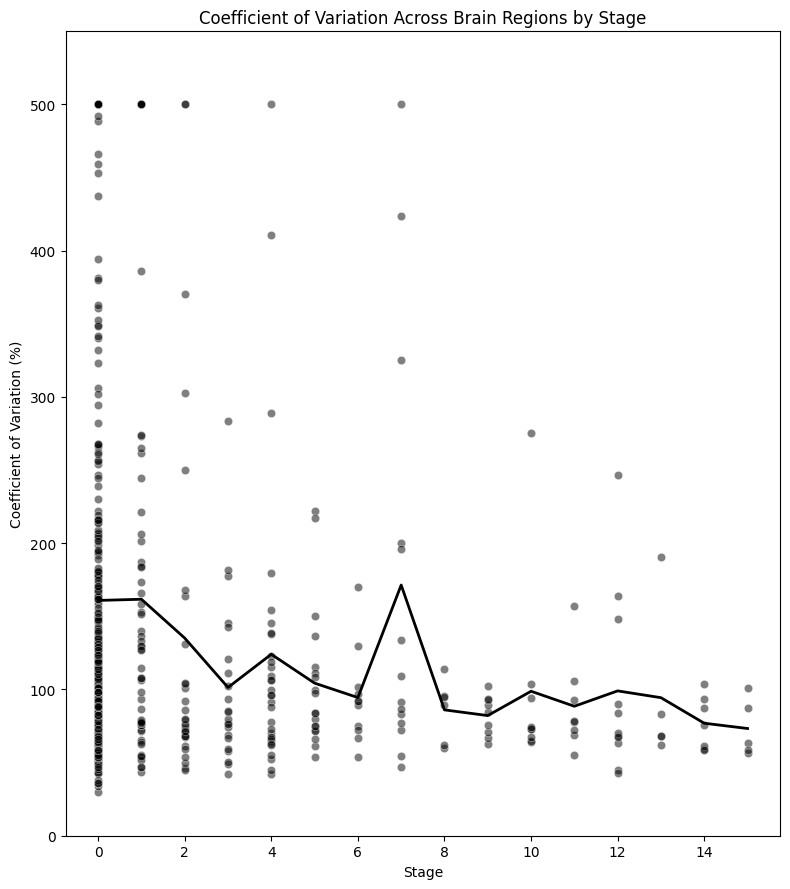


Summary Statistics:

Empirical CV:
count    650.000000
mean     146.814785
std      123.276279
min       29.878874
25%       71.869926
50%       99.378951
75%      161.589349
max      500.000000
Name: CV, dtype: float64


In [142]:
# First calculate the variance for each subject
variance_empirical_df = pandas.DataFrame(columns=['RID', 'Diagnosis', 'Variance'])

# Calculate variance for each subject
for i in range(len(ebm_data)):
    empirical_tau = ebm_data.iloc[i, 4:]
    variance_empirical = empirical_tau.var()
    
    sub_empirical_df = pandas.DataFrame([[ebm_data.iloc[i, 1], ebm_data.iloc[i, 2], variance_empirical]], 
                                     columns=['RID', 'Diagnosis', 'Variance'])
    variance_empirical_df = pandas.concat([variance_empirical_df, sub_empirical_df], ignore_index=True)

# Then your existing code for CV calculation and plotting
def calculate_cv_biological(variance, means, max_cv=500):
    """
    Calculate CV with handling for biological data
    """
    variance = np.array(variance)
    means = np.array(means)
    abs_means = np.abs(means)
    min_mean_threshold = 1e-6
    
    valid_mask = abs_means > min_mean_threshold
    cv = np.full_like(means, np.nan, dtype=float)
    cv[valid_mask] = np.sqrt(variance[valid_mask]) / abs_means[valid_mask] * 100
    cv = np.clip(cv, 0, max_cv)
    
    return cv

# Calculate CV for empirical data
cv_empirical = calculate_cv_biological(
    variance_empirical_df['Variance'],
    ebm_data.iloc[:, 4:].mean(axis=1)
)

# Create DataFrame with non-NaN values
plot_data_empirical = pandas.DataFrame({
    'RID': ebm_data['RID'],
    'ml_stage': ebm_data['ml_stage'],
    'CV': cv_empirical
}).dropna()

# Create the plot
plt.figure(figsize=(8, 9))

# Plot empirical data
sns.scatterplot(data=plot_data_empirical, 
                x='ml_stage', 
                y='CV', 
                color='black', 
                alpha=0.5)

# Calculate mean CV for each stage
mean_cv_by_stage = plot_data_empirical.groupby('ml_stage')['CV'].mean()

# Plot mean CV line
plt.plot(mean_cv_by_stage.index, mean_cv_by_stage.values, 
         color='black', linewidth=2, label='Mean CV')

#plt.legend()

# Customize plot
plt.title('Coefficient of Variation Across Brain Regions by Stage')
plt.xlabel('Stage')
plt.ylabel('Coefficient of Variation (%)')
plt.ylim(0, 550)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("\nEmpirical CV:")
print(plot_data_empirical['CV'].describe())



In [144]:
# Create violin plots for pairwise R distributions of optimized seeds and empirical tau (excluding stage 0 subjects)

# Calculate pairwise correlations for optimized seeds
seed_corr_matrix = np.corrcoef(seeding_nonzero.iloc[:, 8:])

# Extract upper triangle of correlation matrix (excluding diagonal)
seed_corr_values = seed_corr_matrix[np.triu_indices(seed_corr_matrix.shape[0], k=1)]

# Create a DataFrame with correlation values for optimized seeds
seed_corr_data = pandas.DataFrame({
    'R': seed_corr_values,
    'Type': 'Optimized Seeds'
})

# Combine seed and empirical correlation data
combined_corr_data = pandas.concat([
    seed_corr_data,
    corr_data.assign(Type='Empirical Tau')
])

# Create violin plot
plt.figure(figsize=(12, 12))
sns.violinplot(x='Type', y='R', data=combined_corr_data, 
               order=['Optimized Seeds', 'Empirical Tau'],
               palette={'Optimized Seeds': '#87CEFA', 'Empirical Tau': '#00008B'})
plt.title('Distribution of Pairwise Correlations: Optimized Seeds vs Empirical Tau')
plt.xlabel('Data Type')
plt.ylabel('Correlation (R)')
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

# Perform t-test between optimized seeds and empirical tau correlations
t_stat, p_value = stats.ttest_ind(seed_corr_values, empirical_corr_values)

# Print t-test results
print("\nT-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Add mean values to the plot title
mean_seed = np.mean(seed_corr_values)
mean_emp = np.mean(empirical_corr_values)


NameError: name 'corr_data' is not defined

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/164280541.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='R', data=combined_corr_data,


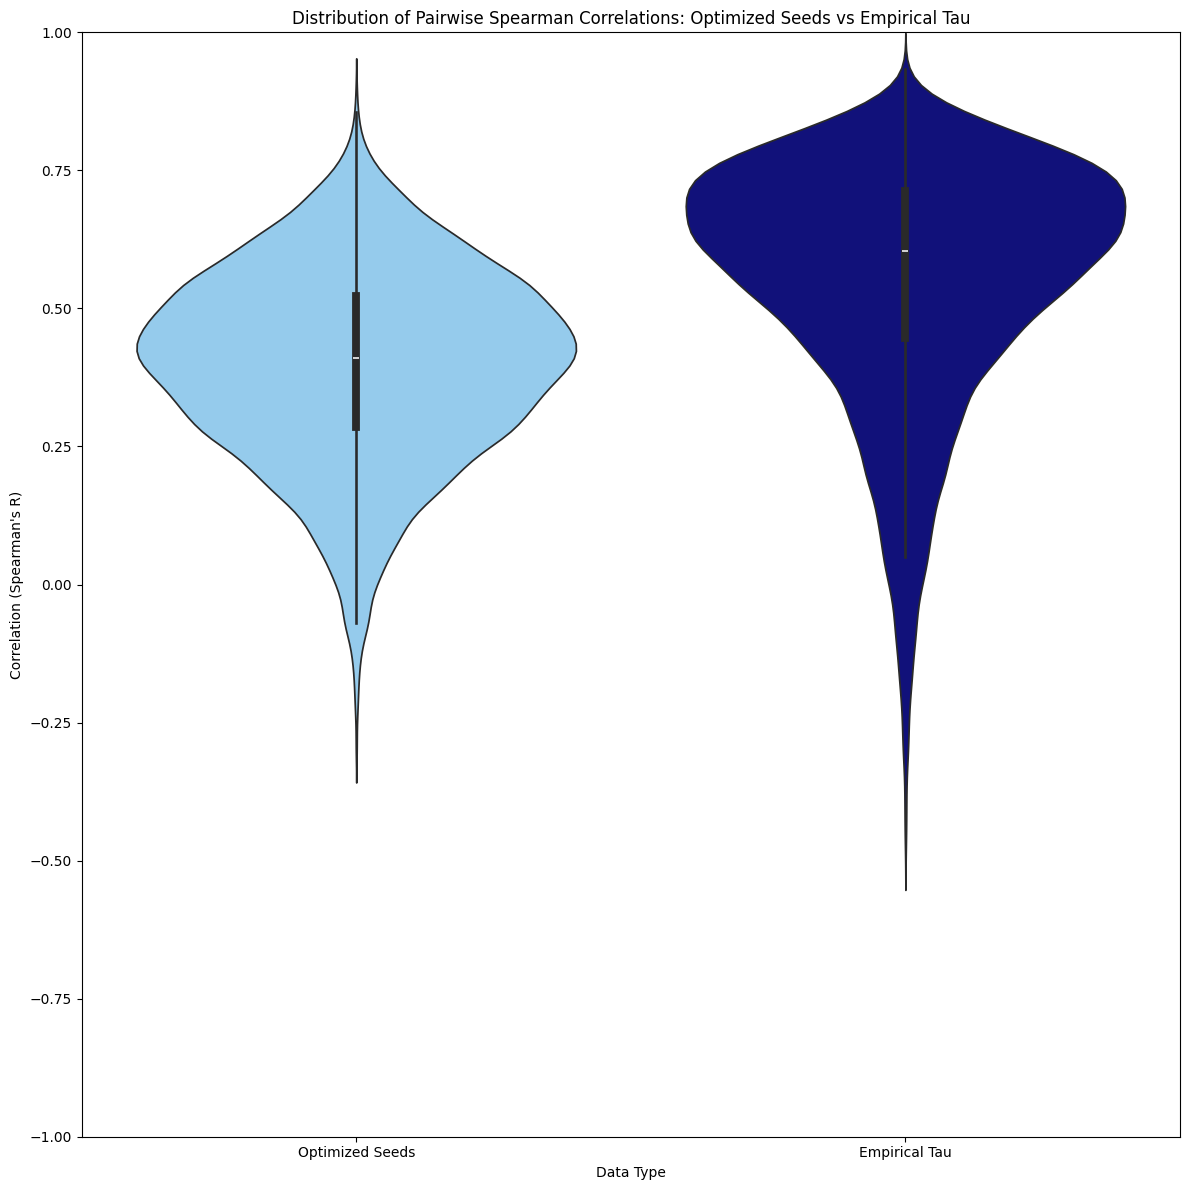


T-test Results:
t-statistic: -63.7958
p-value: 0.0000e+00

Mean Spearman's R:
Optimized Seeds: 0.3985
Empirical Tau: 0.5524


In [145]:
# Create violin plots for pairwise Spearman R distributions (SUPPLEMENTARY FIGURE)

# Calculate pairwise Spearman correlations for optimized seeds
def pairwise_spearman(data):
    n_samples = data.shape[0]
    corr_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            if i != j:
                corr, _ = stats.spearmanr(data.iloc[i, :], data.iloc[j, :])
                corr_matrix[i, j] = corr
    return corr_matrix

# Calculate correlation matrices
seed_corr_matrix = pairwise_spearman(seeding_nonzero.iloc[:, 8:])
empirical_corr_matrix = pairwise_spearman(ebm_nonzero.iloc[:, 4:])

# Extract upper triangle of correlation matrices (excluding diagonal)
seed_corr_values = seed_corr_matrix[np.triu_indices(seed_corr_matrix.shape[0], k=1)]
empirical_corr_values = empirical_corr_matrix[np.triu_indices(empirical_corr_matrix.shape[0], k=1)]

# Create DataFrames with correlation values
seed_corr_data = pandas.DataFrame({
    'R': seed_corr_values,
    'Type': 'Optimized Seeds'
})

empirical_corr_data = pandas.DataFrame({
    'R': empirical_corr_values,
    'Type': 'Empirical Tau'
})

# Combine seed and empirical correlation data
combined_corr_data = pandas.concat([seed_corr_data, empirical_corr_data])

# Create violin plot
plt.figure(figsize=(12, 12))
sns.violinplot(x='Type', y='R', data=combined_corr_data, 
               order=['Optimized Seeds', 'Empirical Tau'],
               palette={'Optimized Seeds': '#87CEFA', 'Empirical Tau': '#00008B'})
plt.title('Distribution of Pairwise Spearman Correlations: Optimized Seeds vs Empirical Tau')
plt.xlabel('Data Type')
plt.ylabel('Correlation (Spearman\'s R)')
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

# Perform t-test between optimized seeds and empirical tau correlations
t_stat, p_value = stats.ttest_ind(seed_corr_values, empirical_corr_values)

# Print t-test results
print("\nT-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

# Calculate mean values
mean_seed = np.mean(seed_corr_values)
mean_emp = np.mean(empirical_corr_values)
print(f"\nMean Spearman's R:")
print(f"Optimized Seeds: {mean_seed:.4f}")
print(f"Empirical Tau: {mean_emp:.4f}")

In [477]:
# Save variance to csv to visualize with PySurfer

column_names = ['Left-Cerebellum-Cortex','Left-Thalamus-Proper','Left-Hippocampus','Left-Amygdala','Left-VentralDC','Right-Cerebellum-Cortex','Right-Thalamus-Proper','Right-Hippocampus','Right-Amygdala','Right-VentralDC','ctx-lh-bankssts','ctx-lh-caudalanteriorcingulate',	'ctx-lh-caudalmiddlefrontal','ctx-lh-cuneus','ctx-lh-entorhinal','ctx-lh-fusiform','ctx-lh-inferiorparietal','ctx-lh-inferiortemporal','ctx-lh-isthmuscingulate','ctx-lh-lateraloccipital','ctx-lh-lateralorbitofrontal','ctx-lh-lingual','ctx-lh-medialorbitofrontal','ctx-lh-middletemporal','ctx-lh-parahippocampal','ctx-lh-paracentral','ctx-lh-parsopercularis','ctx-lh-parsorbitalis','ctx-lh-parstriangularis','ctx-lh-pericalcarine','ctx-lh-postcentral','ctx-lh-posteriorcingulate','ctx-lh-precentral','ctx-lh-precuneus','ctx-lh-rostralanteriorcingulate','ctx-lh-rostralmiddlefrontal','ctx-lh-superiorfrontal','ctx-lh-superiorparietal',	'ctx-lh-superiortemporal','ctx-lh-supramarginal','ctx-lh-frontalpole','ctx-lh-temporalpole','ctx-lh-transversetemporal','ctx-lh-insula','ctx-rh-bankssts', 'ctx-rh-caudalanteriorcingulate', 'ctx-rh-caudalmiddlefrontal', 'ctx-rh-cuneus','ctx-rh-entorhinal', 'ctx-rh-fusiform','ctx-rh-inferiorparietal','ctx-rh-inferiortemporal',	'ctx-rh-isthmuscingulate','ctx-rh-lateraloccipital','ctx-rh-lateralorbitofrontal','ctx-rh-lingual','ctx-rh-medialorbitofrontal','ctx-rh-middletemporal','ctx-rh-parahippocampal','ctx-rh-paracentral','ctx-rh-parsopercularis','ctx-rh-parsorbitalis','ctx-rh-parstriangularis','ctx-rh-pericalcarine','ctx-rh-postcentral','ctx-rh-posteriorcingulate',	'ctx-rh-precentral',	'ctx-rh-precuneus','ctx-rh-rostralanteriorcingulate','ctx-rh-rostralmiddlefrontal','ctx-rh-superiorfrontal','ctx-rh-superiorparietal','ctx-rh-superiortemporal','ctx-rh-supramarginal','ctx-rh-frontalpole','ctx-rh-temporalpole','ctx-rh-transversetemporal','ctx-rh-insula']
Variance_model_df = pandas.DataFrame(columns=column_names)
Variance_model_df = pandas.concat([Variance_model_df, pandas.DataFrame([Variance_model], columns=column_names)], ignore_index=True)
Variance_model_df.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/Pysurfer data/Model Seed Op Variance - version 11.csv')

Variance_ebm_df = pandas.DataFrame(columns=column_names)
Variance_ebm_df = pandas.concat([Variance_ebm_df, pandas.DataFrame([Variance_ebm], columns=column_names)], ignore_index=True)
Variance_ebm_df.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/Pysurfer data/EBM Variance - version 11.csv')

/var/folders/bd/p6dnm7ns0tb9glfgc_h835k40000gn/T/ipykernel_1347/898808222.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Variance_model_df = pandas.concat([Variance_model_df, pandas.DataFrame([Variance_model], columns=column_names)], ignore_index=True)
/var/folders/bd/p6dnm7ns0tb9glfgc_h835k40000gn/T/ipykernel_1347/898808222.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Variance_ebm_df = pandas.concat([Variance_ebm_df, pandas.DataFrame([Variance_ebm], columns=column_names)], ignore_i

### CLustering of Optimized Seeds (k-means)

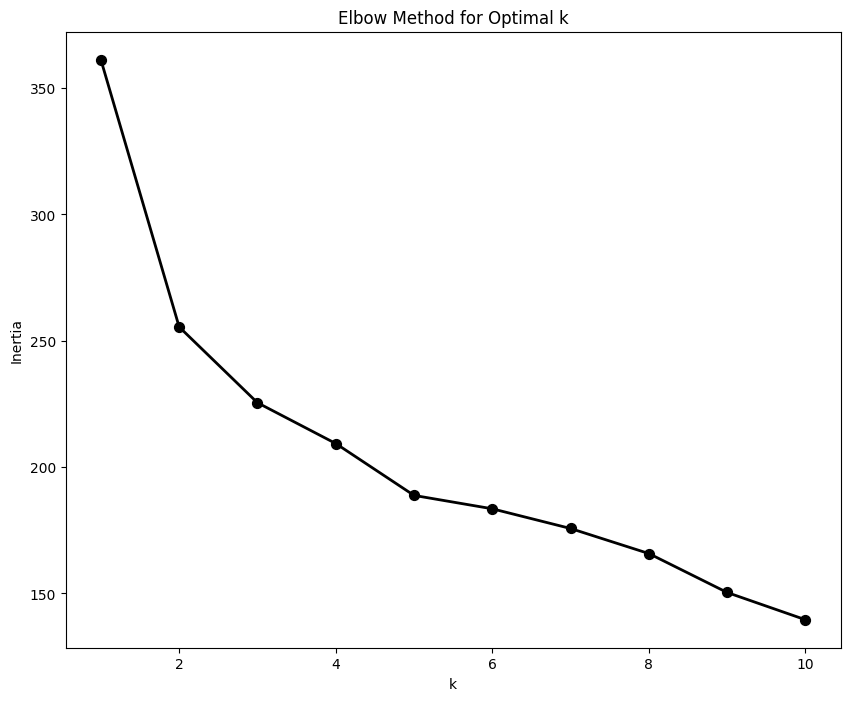

In [248]:
# Determine number of clusters using the elbow method
seeding_nonzero_array = np.array(seeding_nonzero)
seeding_nonzero_array = np.array(seeding_nonzero.iloc[:,8:])

inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(seeding_nonzero_array)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
# Plot line
plt.plot(k_range, inertias, color='black', linewidth=2)
# Add dots at each point
plt.scatter(k_range, inertias, color='black', s=50)  # s=150 controls dot size

plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

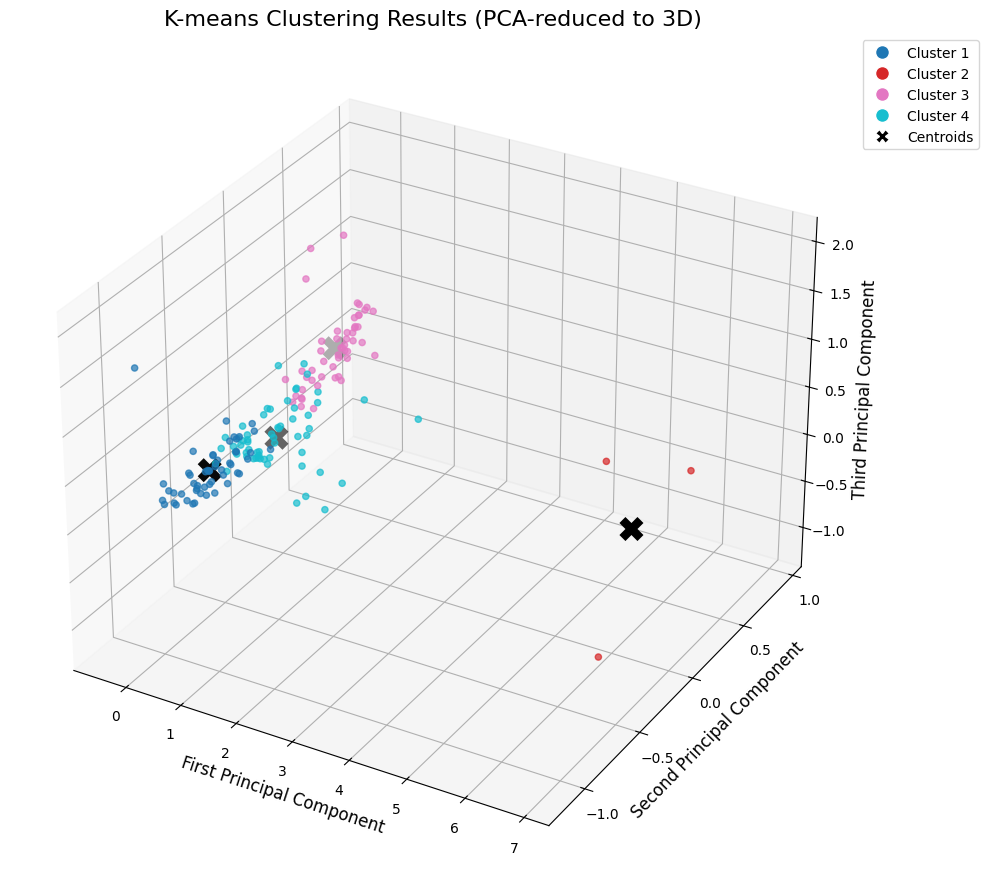

Number of subjects in each cluster:
Cluster 1: 52 subjects
Cluster 2: 3 subjects
Cluster 3: 51 subjects
Cluster 4: 59 subjects
Inertia: 209.3456199296844

MCI:
 Cluster Assignment
0    42
3    34
2    26
1     2

Dementia:
 Cluster Assignment
3    25
2    25
0    10
1     1


In [249]:
# Perform clustering analysis  

n_clusters = 4  # Number of clusters

# Create and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(seeding_nonzero_array) # Array of subjects x regions

# PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
vectors_3d = pca.fit_transform(seeding_nonzero_array)
centroids_3d = pca.transform(kmeans.cluster_centers_)

# Visualize 
n_clusters = len(np.unique(cluster_assignments))
colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))
cmap = mcolors.ListedColormap(colors)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points 
scatter = ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2],
                     c=cluster_assignments, cmap=cmap, alpha=0.7)

# Scatter plot for centroids
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2],
           color='black', s=300, marker='X', linewidths=0.001, label='Centroids')

ax.set_title('K-means Clustering Results (PCA-reduced to 3D)', fontsize=16)
ax.set_xlabel('First Principal Component', fontsize=12)
ax.set_ylabel('Second Principal Component', fontsize=12)
ax.set_zlabel('Third Principal Component', fontsize=12)

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                   markerfacecolor=colors[i], markersize=10) for i in range(n_clusters)]
legend_elements.append(plt.Line2D([0], [0], marker='X', color='w', label='Centroids', 
                       markerfacecolor='black', markersize=10))

ax.legend(handles=legend_elements, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

cluster_assignments_df = pandas.DataFrame(cluster_assignments, columns=['Cluster Assignment'])
seeding_nonzero = seeding_nonzero.reset_index(drop=True)
cluster_assignments_df = cluster_assignments_df.reset_index(drop=True)
seeding_nonzero_wvecs_clusters = pandas.concat([seeding_nonzero_wvecs, cluster_assignments_df], axis=1)
seeding_nonzero_wvecs_clusters_MCI = seeding_nonzero_wvecs_clusters[seeding_nonzero_wvecs_clusters['Diagnosis']=='MCI']
seeding_nonzero_wvecs_clusters_AD = seeding_nonzero_wvecs_clusters[seeding_nonzero_wvecs_clusters['Diagnosis']=='Dementia']

# Print
unique, counts = np.unique(cluster_assignments, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of subjects in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster + 1}: {count} subjects")
print("Inertia:", kmeans.inertia_)

print('\nMCI:\n', seeding_nonzero_wvecs_clusters_MCI['Cluster Assignment'].value_counts().to_string())
print('\nDementia:\n', seeding_nonzero_wvecs_clusters_AD['Cluster Assignment'].value_counts().to_string())

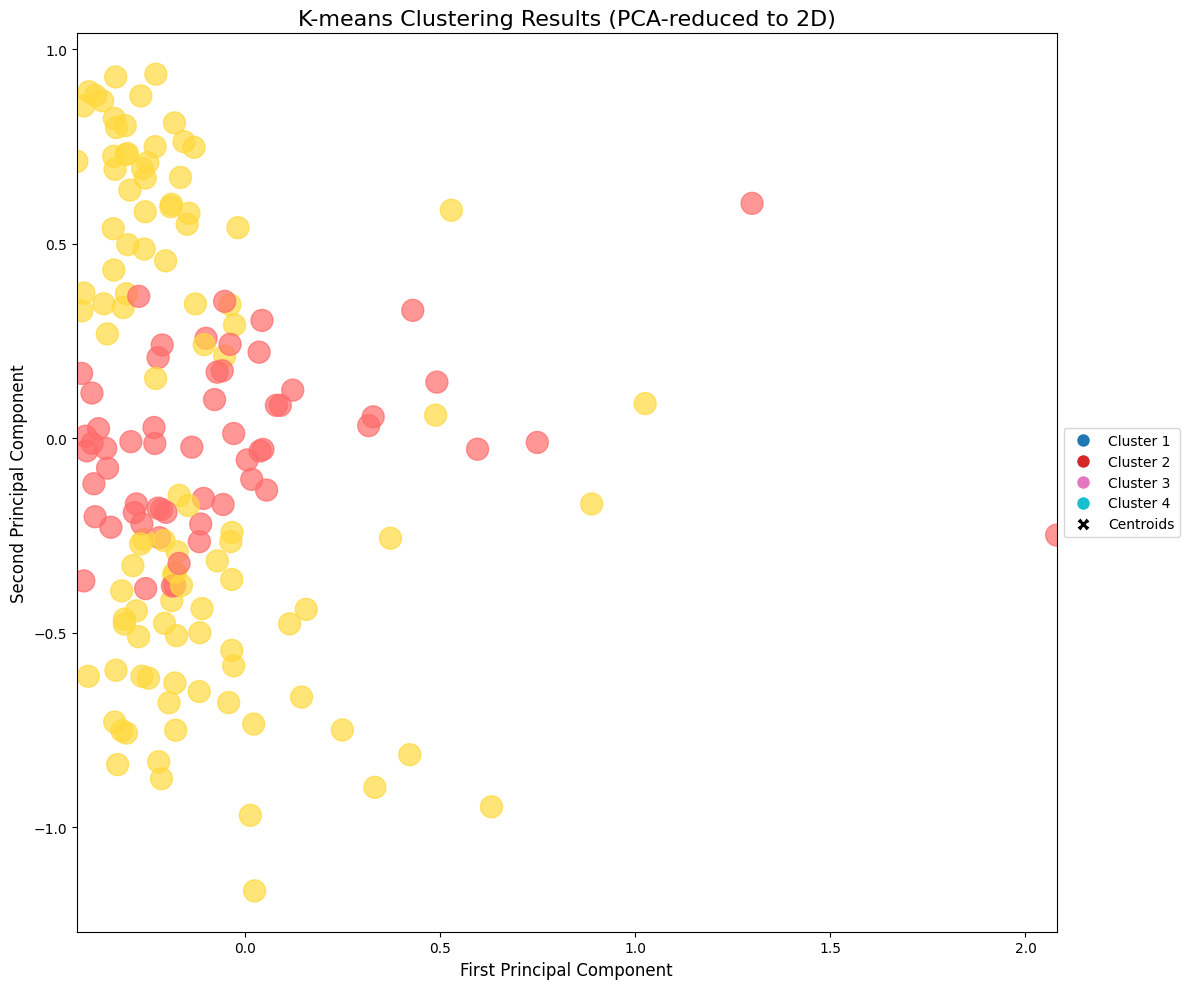

Number of subjects in each cluster:
Clusters 1 & 3 combined: 103 subjects
Cluster 4: 59 subjects
Inertia: 209.3456199296844


In [250]:
# Perform clustering analysis  
n_clusters = 4  # Number of clusters

# Create and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(seeding_nonzero_array)

# PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(seeding_nonzero_array)
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Create mask to exclude cluster 2 (index 1)
mask = cluster_assignments != 1
filtered_vectors = vectors_2d[mask]
filtered_assignments = cluster_assignments[mask]
filtered_centroids = centroids_2d[[0,2,3]]  # Keep centroids for clusters 1, 3, and 4

# Combine clusters 1 and 3 (indices 0 and 2) and map cluster 4 (index 3)
cluster_map = {0:0, 2:0, 3:1}  # Map clusters 1&3 to 0, cluster 4 to 1
filtered_assignments = np.array([cluster_map[x] for x in filtered_assignments])

# Custom colors
custom_colors = ['#FFD93D', '#FF6B6B']  
cmap = mcolors.ListedColormap(custom_colors)

plt.figure(figsize=(12, 10))

# Scatter plot for data points 
scatter = plt.scatter(filtered_vectors[:, 0], filtered_vectors[:, 1],
                     c=filtered_assignments, cmap=cmap, s = 250, alpha=0.7)

# Scatter plot for centroids (all in black)
#plt.scatter(filtered_centroids[:, 0], filtered_centroids[:, 1],
           #color='black', s=500, marker='X', linewidth=0.5)

plt.title('K-means Clustering Results (PCA-reduced to 2D)', fontsize=16)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)

plt.legend(handles=legend_elements, fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Adjust x-axis limits based on filtered data
x_min = filtered_vectors[:, 0].min()
x_max = filtered_vectors[:, 0].max()
plt.xlim(x_min, x_max)

plt.show()

# Print cluster statistics for combined clusters
unique, counts = np.unique(filtered_assignments, return_counts=True)
print("Number of subjects in each cluster:")
print(f"Clusters 1 & 3 combined: {counts[0]} subjects")
print(f"Cluster 4: {counts[1]} subjects")
print("Inertia:", kmeans.inertia_)

Cluster 1:
 Highest value: 0.5140 at region Left-VentralDC
 2nd Highest value: 0.4409 at region Right-VentralDC
 3rd Highest value: 0.2199 at region ctx-lh-bankssts

Cluster 2:
 Highest value: 1.9576 at region ctx-rh-inferiorparietal
 2nd Highest value: 1.8900 at region ctx-rh-precuneus
 3rd Highest value: 1.8366 at region ctx-rh-caudalmiddlefrontal

Cluster 3:
 Highest value: 0.7842 at region ctx-rh-entorhinal
 2nd Highest value: 0.4330 at region ctx-lh-entorhinal
 3rd Highest value: 0.3043 at region ctx-rh-inferiortemporal

Cluster 4:
 Highest value: 0.2526 at region ctx-lh-middletemporal
 2nd Highest value: 0.2044 at region Left-Amygdala
 3rd Highest value: 0.1929 at region ctx-lh-inferiortemporal



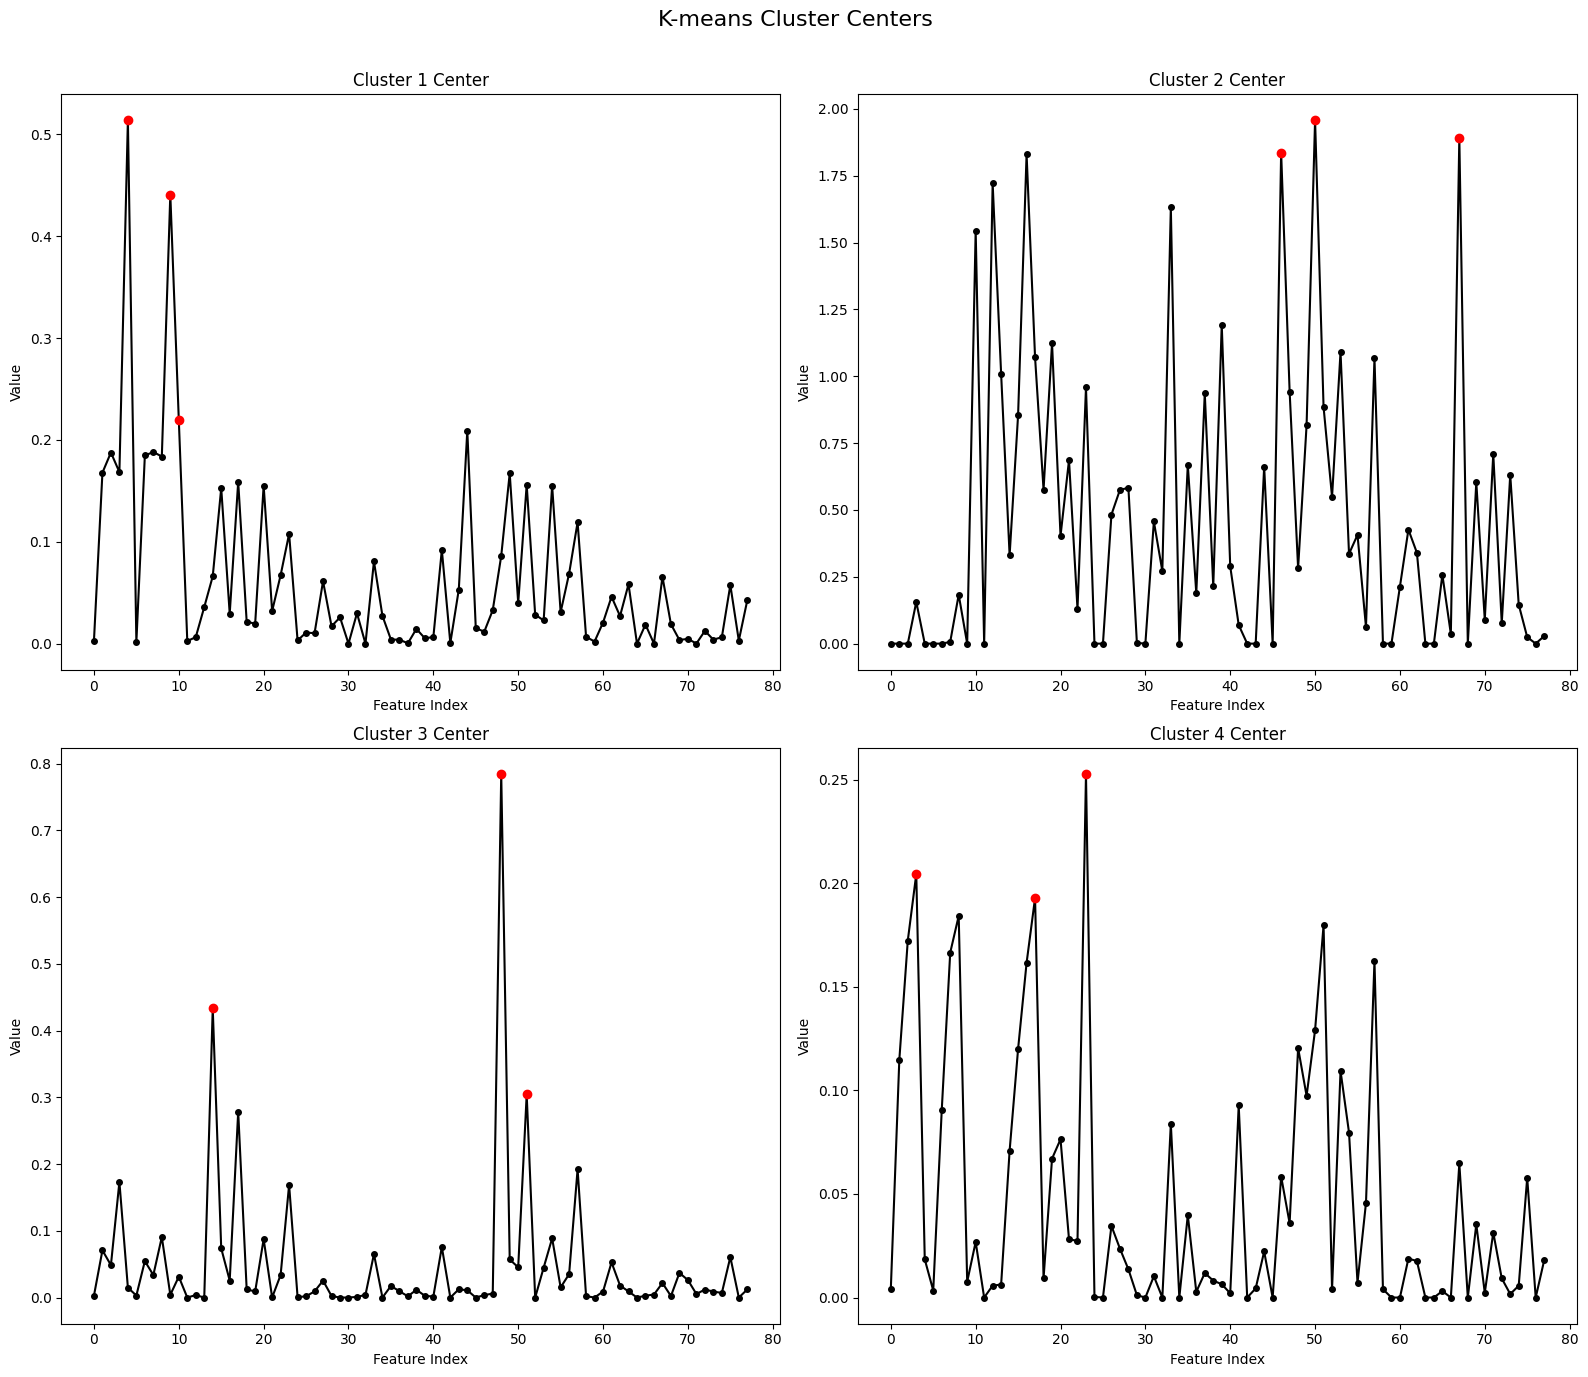

In [251]:
# Visualize cluster centers/ centroids  

# Get the number of clusters and features
n_clusters, n_features = kmeans.cluster_centers_.shape

# Create a figure with subplots for each cluster
fig, axs = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('K-means Cluster Centers', fontsize=16)

cluster_centers_array = np.zeros((78, n_clusters))

for i in range(n_clusters):
    row = i // 2
    col = i % 2
    
    column = kmeans.cluster_centers_[i]
    cluster_centers_array[:, i] = column
    
    # Get indices of sorted column (in descending order)
    sorted_indices = np.argsort(column)[::-1]
    
    # Highest and second highest
    max_index = sorted_indices[0]
    second_max_index = sorted_indices[1]
    third_max_index = sorted_indices[2]
    max_region = regions[max_index]
    second_max_region = regions[second_max_index]
    third_max_region = regions[third_max_index]

    
    print(f"Cluster {i+1}:")
    print(f" Highest value: {column[max_index]:.4f} at region {max_region}")
    print(f" 2nd Highest value: {column[second_max_index]:.4f} at region {second_max_region}")
    print(f" 3rd Highest value: {column[third_max_index]:.4f} at region {third_max_region}")
    print()
    
    axs[row, col].plot(range(n_features), column, color='black', marker='o', linestyle='-', markersize=4)
    axs[row, col].set_title(f'Cluster {i + 1} Center')
    axs[row, col].set_xlabel('Feature Index')
    axs[row, col].set_ylabel('Value')
    
    axs[row, col].plot(max_index, column[max_index], color='red', marker='o', markersize=6)
    axs[row, col].plot(second_max_index, column[second_max_index], color='red', marker='o', markersize=6)
    axs[row, col].plot(third_max_index, column[third_max_index], color='red', marker='o', markersize=6)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust the top margin to accommodate the main title
plt.show()

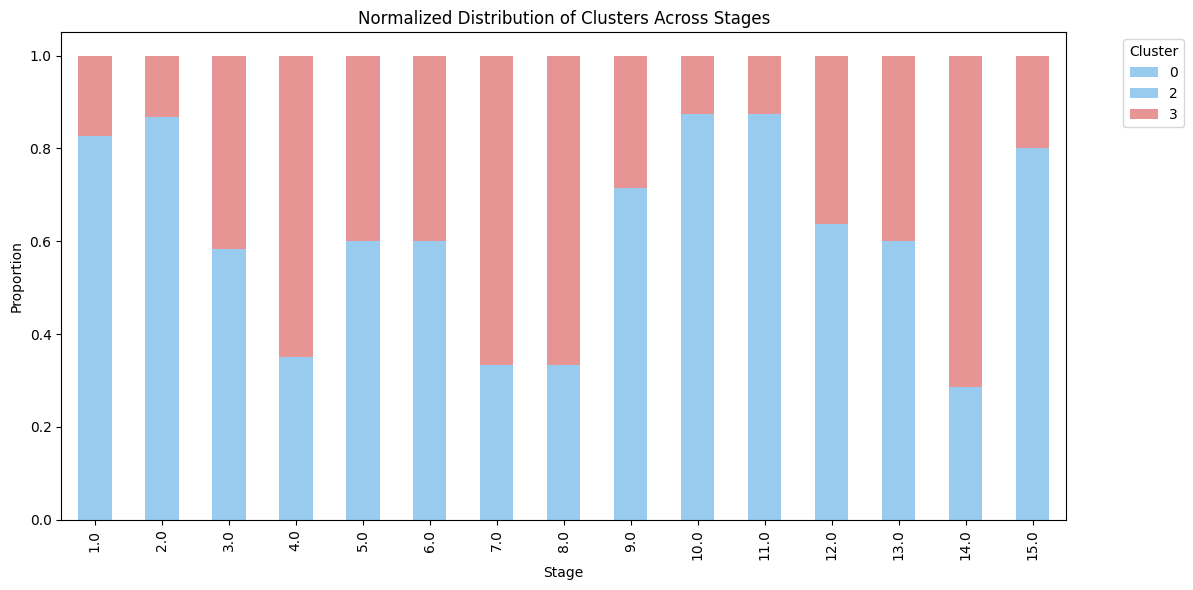

In [143]:
colors = ['#7FBFE9', '#7FBFE9', '#E07A7A']  # Blue, Blue, Pink for clusters 0, 2, 3

# Group by stage and count the occurrences of each singular vector
stage_cluster_counts = seeding_nonzero_wvecs_clusters.groupby(['ml_stage', 'Cluster Assignment']).size().unstack(fill_value=0)

# Reorder and filter the columns of stage_cluster_counts (excluding cluster 1)
new_order = [0, 2, 3]  # Order to get blue clusters (0,2) together, followed by pink cluster (3)
stage_cluster_counts = stage_cluster_counts.reindex(columns=new_order)

# Normalize the counts
stage_cluster_normalized = stage_cluster_counts.div(stage_cluster_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12, 6))
stage_cluster_normalized.plot(kind='bar', stacked=True, ax=ax, alpha=0.8, 
                            color=colors[:len(stage_cluster_normalized.columns)])

# Customize the plot
plt.title('Normalized Distribution of Clusters Across Stages')
plt.xlabel('Stage')
plt.ylabel('Proportion')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [329]:
# Save cluster centroids to csv to visualize with PySurfer
cluster_centers_df = pandas.DataFrame(cluster_centers_array.T, columns=regions)
#cluster_centers_df.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/Pysurfer data/Cluster centers k= 4 - version 11.csv')

### Nexis + Deep Learning 

In [35]:
# FOR NEXIS + DEEP LEARNING PROJECT: Save eta values for all subjects

cog_data = pandas.read_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/sustaln/SuStaIn/data/ADNI3/Regional_Tau_w_Demographics.csv')
cog_data = cog_data.drop_duplicates(subset='RID', keep='first')
value_to_drop = [4513, 6038, 6505, 6598, 6601, 6509]  
cog_data = cog_data[~cog_data['RID'].isin(value_to_drop)]
cog_data = cog_data[['RID', 'ADAS11_bl']]
DL_df = pandas.merge(cog_data, ebm_nonzero, on='RID', how='inner')
DL_df = DL_df.drop(['Unnamed: 0'],axis=1)
DL_df = DL_df[DL_df['Diagnosis'] != 'CN']
DL_df['eta'] = ''

In [36]:
top_SV_matrix = np.diag(top_SV)
RIDs = np.array(DL_df['RID'])

for RID in RIDs:  # Loop through all subject RIDs
    # Extract the seed values
    dl_index = DL_df.index[DL_df['RID'] == RID].tolist()[0]
    x0_row = seeding_nonzero[seeding_nonzero['RID'] == RID].iloc[0] 
    x0_i = x0_row.iloc[8:].values.astype(np.float64)
    x0_i = x0_i.reshape(78, 1)
    
    # Calculate eta_i
    eta_i = np.dot(np.linalg.inv(top_SV_matrix), np.dot(top_U_vectors.T, x0_i))
    
    # Convert eta_i to string
    eta_i_str = np.array2string(eta_i, separator=',')
    
    # Add eta to DL_df
    DL_df.at[dl_index, 'eta'] = eta_i_str

In [572]:
# Save to csv (to send to Daren to optimize DNN on)
DL_df.to_csv('EBM + Nexis + Deep Learning: eta values - latest with stage 0.csv')

In [23]:
# POST DNN TRAINING: Recover individual's seeds from DNN output

# Upload DNN predicted eta values for all subjects
predicted_etas = pandas.read_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/EBM + Nexis + DNN/Predicted_Etas_for_NEXIS_Oct23.csv')

Number of common RIDs (excluding specified subjects): 153


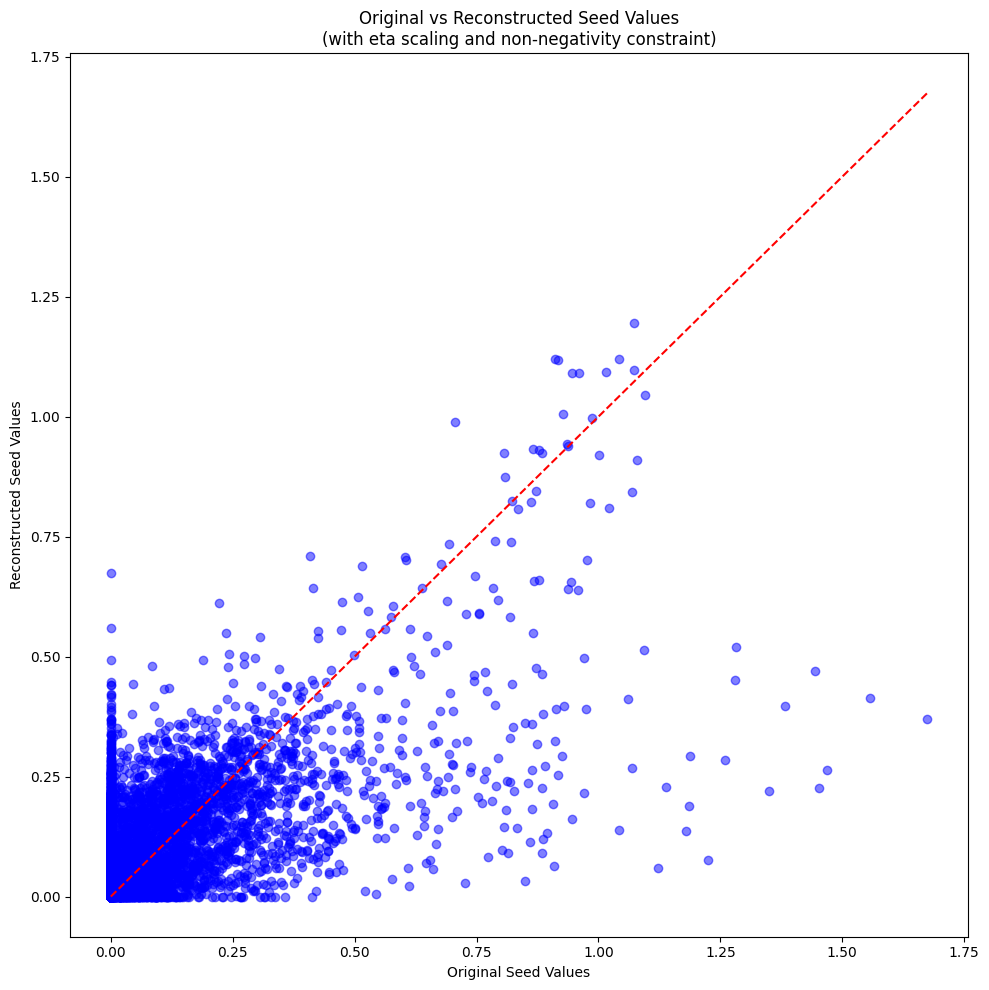

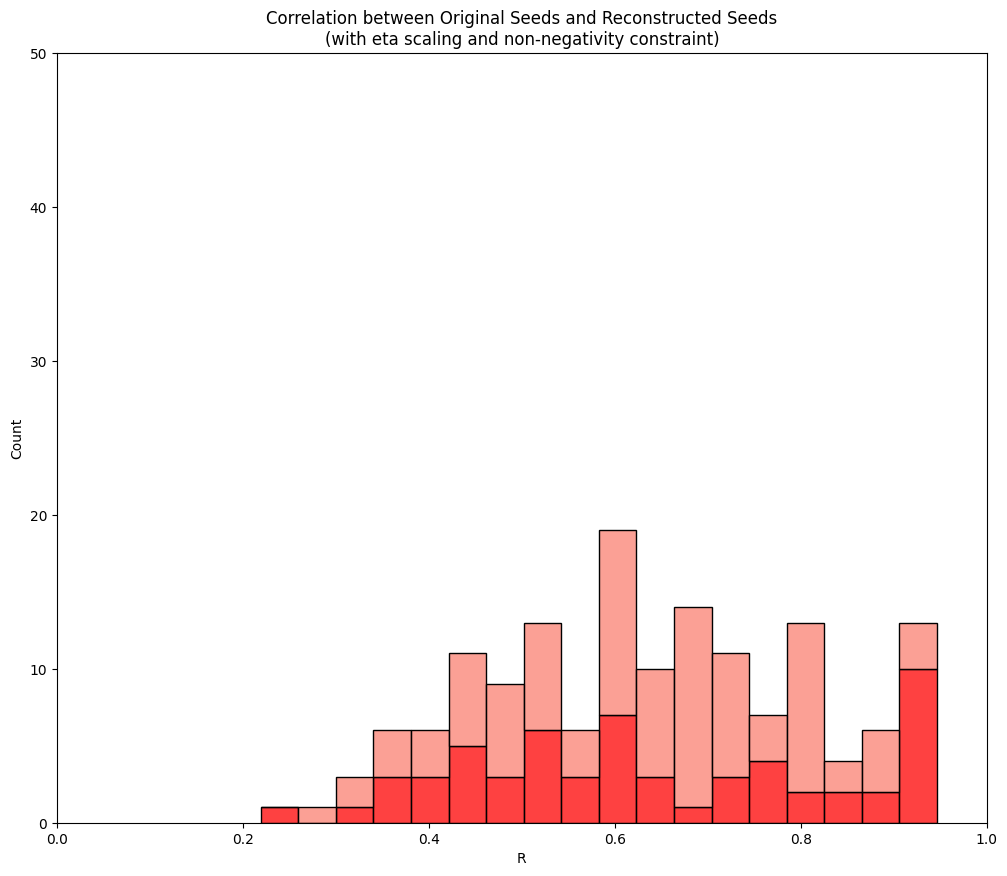


Mean R across subjects: 0.636


In [35]:
# Recovering seeds from predicted and original eta values 

predicted = False # True for predicted etas, False for original etas

# Initialize a DataFrame to store the recovered seed vectors
recovered_seeds = pandas.DataFrame(columns=regions)

# List of subjects to exclude
exclude_subjects = ['6610', '4262', '6602', '4301']

# Reconstruct seeds with eta scaling, non-negativity constraint, and sparsity matching
for idx, row in predicted_etas.iterrows():
    if str(row['RID']) not in exclude_subjects:  # Skip excluded subjects
        # Extract eta values for this subject
        if predicted == True:
            eta_values = row[['pred_eta1', 'pred_eta2', 'pred_eta3', 'pred_eta4']].values.reshape(-1, 1)
        else:
            eta_values = row[['eta1', 'eta2', 'eta3', 'eta4']].values.reshape(-1, 1)
        
        # Scale eta values by their corresponding singular values
        scaled_eta = eta_values * top_SV[:4].reshape(-1, 1)
        
        # Reconstruction: U * (scaled eta values)
        recovered_seed = np.dot(top_U_vectors, scaled_eta).flatten()
        
        # Apply non-negativity constraint
        recovered_seed = np.maximum(recovered_seed, 0)
        
        # Add to DataFrame
        recovered_seeds.loc[idx] = recovered_seed

# Add RID to recovered seeds DataFrame
recovered_seeds.insert(0, 'RID', predicted_etas['RID'])

# Find common RIDs between datasets (excluding specified subjects)
seeding_rids = set(seeding_nonzero['RID'].astype(str))
recovered_rids = set(recovered_seeds['RID'].astype(str))
common_rids = (seeding_rids & recovered_rids) - set(exclude_subjects)
print(f"Number of common RIDs (excluding specified subjects): {len(common_rids)}")

# Create arrays of all values and their corresponding RIDs and regions
all_rids = []
all_regions = []
all_original_values = []
all_reconstructed_values = []

# Calculate correlations and store values for plotting
correlations = []
correlation_rids = []

for rid in common_rids:
    try:
        original = seeding_nonzero[seeding_nonzero['RID'].astype(str) == rid].iloc[0, 8:].values
        recovered = recovered_seeds[recovered_seeds['RID'].astype(str) == rid].iloc[0, 1:].values
        
        # Calculate correlation for this subject
        corr, _ = stats.pearsonr(original, recovered)
        correlations.append(corr)
        correlation_rids.append(rid)
        
        # Store values for comparison DataFrame
        all_rids.extend([rid] * len(original))
        all_regions.extend(regions)
        all_original_values.extend(original)
        all_reconstructed_values.extend(recovered)
        
    except IndexError:
        print(f"Warning: Could not process RID {rid}")
        continue

# Create comparison DataFrame
comparison_df = pandas.DataFrame({
    'RID': all_rids,
    'Region': all_regions,
    'Original': all_original_values,
    'Reconstructed': all_reconstructed_values
})

# Add diagnosis information to comparison_df
comparison_df['Diagnosis'] = comparison_df['RID'].map(
    dict(zip(seeding_nonzero['RID'].astype(str), seeding_nonzero['Diagnosis']))
)

# Create DataFrame for correlation distribution plot
correlation_df = pandas.DataFrame({
    'Correlation': correlations,
    'RID': correlation_rids
})

# Add diagnosis information to correlation_df
correlation_df['Diagnosis'] = correlation_df['RID'].map(
    dict(zip(seeding_nonzero['RID'].astype(str), seeding_nonzero['Diagnosis']))
)

# Create scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(all_original_values, all_reconstructed_values, alpha=0.5, color='blue')

# Add diagonal line
max_val = max(max(all_original_values), max(all_reconstructed_values))
min_val = min(min(all_original_values), min(all_reconstructed_values))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Reconstruction')

plt.xlabel('Original Seed Values')
plt.ylabel('Reconstructed Seed Values')
plt.title('Original vs Reconstructed Seed Values\n(with eta scaling and non-negativity constraint)')
#plt.legend()

# Add both correlation coefficients
overall_corr, _ = stats.pearsonr(all_original_values, all_reconstructed_values)
mean_subject_corr = np.mean(correlations)
#plt.text(0.05, 0.95, f'Overall R = {overall_corr:.3f}', transform=plt.gca().transAxes)
#plt.text(0.05, 0.90, f'Mean Subject R = {mean_subject_corr:.3f}', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

# Plot R distribution with diagnosis-based stacking
plt.figure(figsize=(12, 10))

# Set the order of categories (Dementia first/bottom, MCI second/top)
correlation_df['Diagnosis'] = pandas.Categorical(correlation_df['Diagnosis'], 
                                               categories=['MCI', 'Dementia'], 
                                               ordered=True)

# Sort the DataFrame by Diagnosis to ensure correct stacking order
correlation_df = correlation_df.sort_values('Diagnosis')

ax = sns.histplot(data=correlation_df, x='Correlation', binwidth=0.04, hue='Diagnosis', 
                  multiple='stack', palette=color_palette, legend=False)
plt.xlabel('R')
plt.ylabel('Count')
plt.title('Correlation between Original Seeds and Reconstructed Seeds\n(with eta scaling and non-negativity constraint)')
plt.xlim(0, 1)
plt.ylim(0,50)
plt.show()

# Calculate and print mean R across subjects
print(f"\nMean R across subjects: {mean_subject_corr:.3f}")



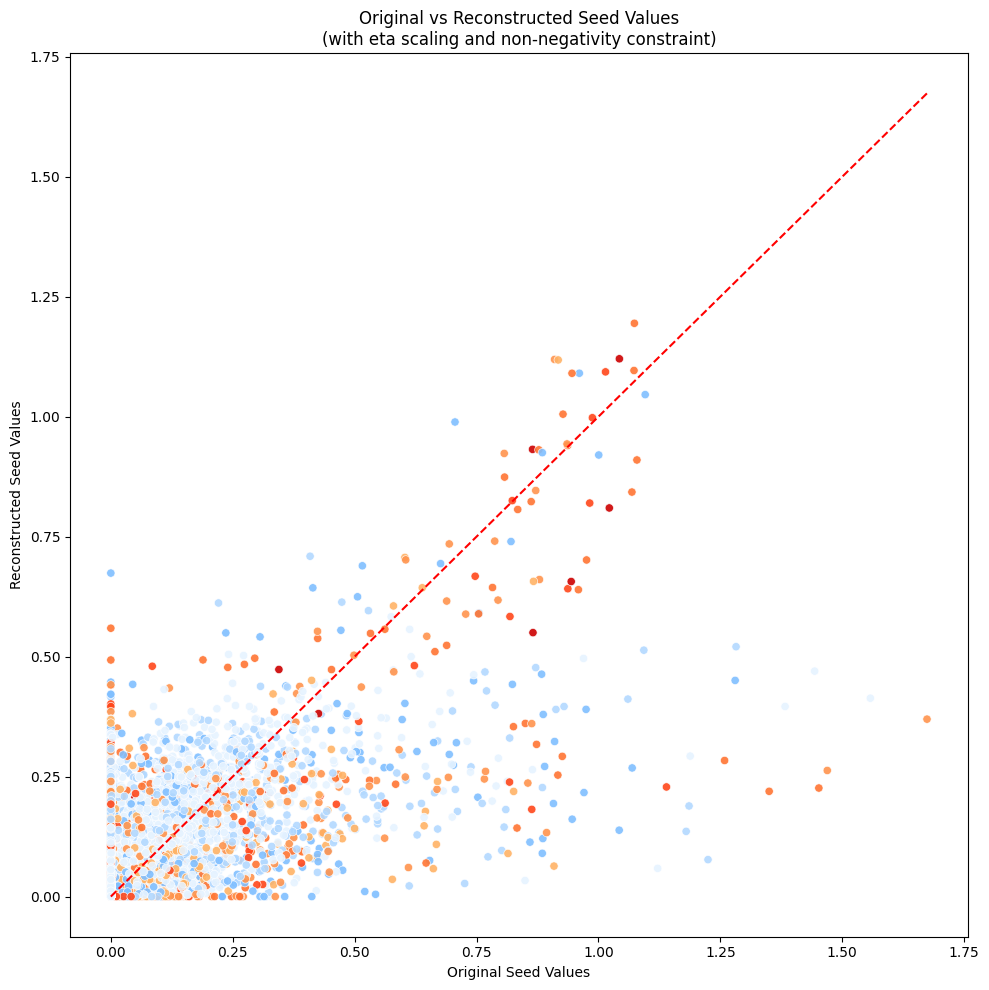

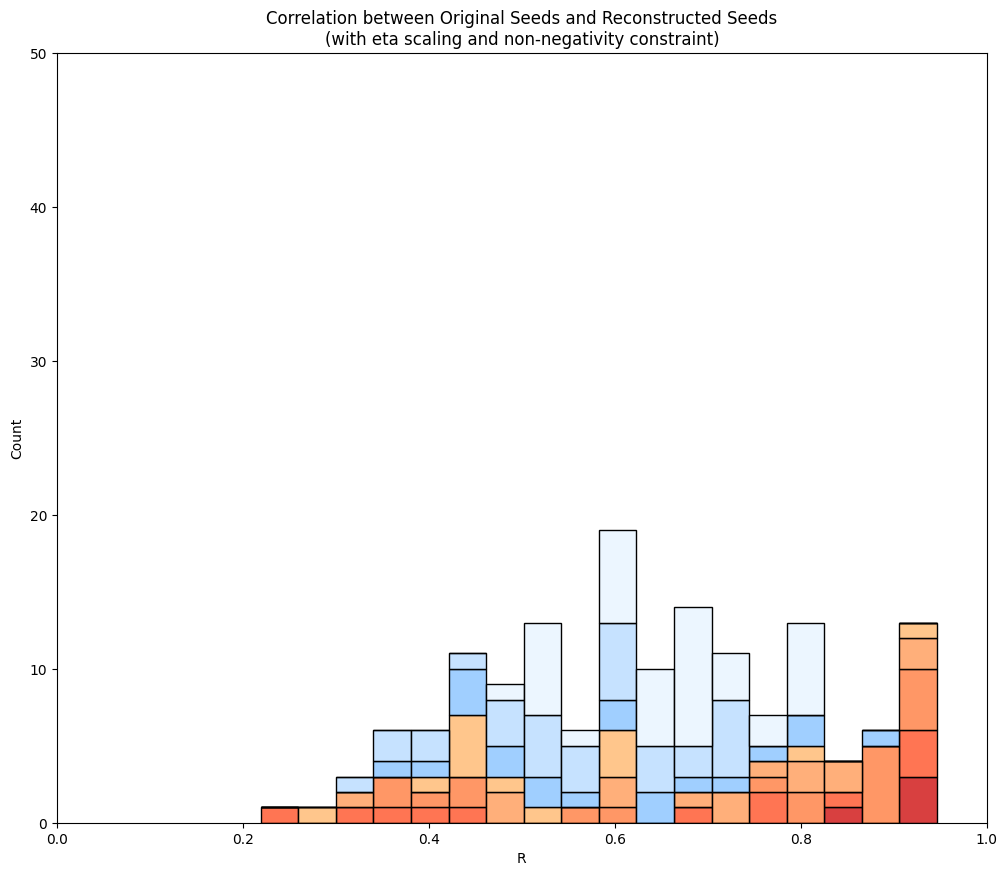


Mean R across subjects: 0.636


In [39]:
# Add stage information to correlation_df and comparison_df
correlation_df['ml_stage'] = correlation_df['RID'].map(
    dict(zip(seeding_nonzero['RID'].astype(str), seeding_nonzero['ml_stage']))
)

comparison_df['ml_stage'] = comparison_df['RID'].map(
    dict(zip(seeding_nonzero['RID'].astype(str), seeding_nonzero['ml_stage']))
)

# Create stage bins
correlation_df['stage_bin'] = pandas.cut(correlation_df['ml_stage'], 
                                       bins=[0, 2, 4, 6, 8, 10, 12, 14, 16],
                                       labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16'])

# Create scatter plot
plt.figure(figsize=(10, 10))

# Create scatter plot with stage coloring
comparison_df['stage_bin'] = pandas.cut(comparison_df['ml_stage'], 
                                      bins=[0, 2, 4, 6, 8, 10, 12, 14, 16],
                                      labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16'])

sns.scatterplot(data=comparison_df, 
                x='Original', 
                y='Reconstructed', 
                hue='stage_bin',
                palette=stage_palette,
                alpha=0.9,
                legend=False)

# Add diagonal line
max_val = max(max(all_original_values), max(all_reconstructed_values))
min_val = min(min(all_original_values), min(all_reconstructed_values))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Reconstruction')

plt.xlabel('Original Seed Values')
plt.ylabel('Reconstructed Seed Values')
plt.title('Original vs Reconstructed Seed Values\n(with eta scaling and non-negativity constraint)')
plt.tight_layout()
plt.show()

# Plot R distribution with stage-based stacking
plt.figure(figsize=(12, 10))

# Sort the DataFrame by stage to ensure correct stacking order
correlation_df = correlation_df.sort_values('ml_stage')

ax = sns.histplot(data=correlation_df, x='Correlation', binwidth=0.04, 
                 hue='stage_bin', multiple='stack', 
                 palette=stage_palette, legend=False)
plt.xlabel('R')
plt.ylabel('Count')
plt.title('Correlation between Original Seeds and Reconstructed Seeds\n(with eta scaling and non-negativity constraint)')
plt.xlim(0, 1)
plt.ylim(0,50)
plt.show()

# Calculate and print mean R across subjects
print(f"\nMean R across subjects: {mean_subject_corr:.3f}")

In [43]:
recovered_seeds.to_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/Recovered seeds (from SVD)/Recovered seeds based on original etas.csv')  

In [37]:
# Count occurrences of each RID in outlier cases (with two or more discrepant regions)
repeat_subjects = discrepant_cases['RID'].value_counts()

print("Subjects with multiple discrepant regions:")
for rid, count in repeat_subjects.items():
    if count > 1:
        # Get the specific regions for this subject
        subject_regions = discrepant_cases[discrepant_cases['RID'] == rid]
        diag = seeding_nonzero[seeding_nonzero['RID'] == rid]['Diagnosis'].iloc[0]
        print(f"\nRID {rid} ({diag}) appears {count} times:")
        for _, row in subject_regions.iterrows():
            print(f"  Region: {row['Region']}")
            print(f"  Original: {row['Original']:.3f}")
            print(f"  Reconstructed: {row['Reconstructed']:.3f}")

if len(repeat_subjects[repeat_subjects > 1]) == 0:
    print("\nNo subjects have multiple discrepant regions.")

# Count occurrences of each RID in outlier cases
repeat_subjects = discrepant_cases['RID'].value_counts()

# Count how many unique RIDs have multiple occurrences
num_repeat_rids = len(repeat_subjects[repeat_subjects > 1])
print(f"\nNumber of subjects with multiple discrepant regions: {num_repeat_rids}")
# Get RIDs with multiple occurrences
multiple_occurrence_rids = repeat_subjects[repeat_subjects > 1].index.tolist()

print("\nList of RIDs with multiple discrepant regions:")
print(multiple_occurrence_rids)



NameError: name 'discrepant_cases' is not defined

## Seed vs. Param- op Model Comparison 

In [153]:
# Calculate AIC 

binary_seed_benchmark = params_subtypes_2_inferiortemporal_nonzero

seeding_length = len(seeding_nonzero)
parameters_length = len(parameters_nonzero)
seeds_params_length = len(subject_specific_seeds_params_nonzero)

# Use the smaller length to avoid out-of-bounds errors
min_length = min(seeding_length, parameters_length, seeds_params_length)

# Number of parameters being optimized
k_param = 2 # alpha, beta, gamma
k_seed = 78 # top 6 seeds
k_seeds_params = 80 # alpha, beta

# Number of observations
n = len(seeding_nonzero)

# Compute the log-likelihood for both models
log_likelihoods_param = []
log_likelihoods_seed = []
log_likelihoods_binary = []
log_likelihoods_seeds_params = []
for i in range(min_length): # for every subject
    subject_param = parameters_nonzero.iloc[i]
    log_likelihood_param = n / 2 * np.log(subject_param['R'] ** 2)
    log_likelihoods_param.append(log_likelihood_param)

    subject_seed = seeding_nonzero.iloc[i]
    log_likelihood_seed = n / 2 * np.log(subject_seed['R'] ** 2)
    log_likelihoods_seed.append(log_likelihood_seed)

    subject_ent = binary_seed_benchmark.iloc[i]
    log_likelihood_ent = n / 2 * np.log(subject_ent['R'] ** 2)
    log_likelihoods_binary.append(log_likelihood_ent)   

    subject_seeds_params = subject_specific_seeds_params_nonzero.iloc[i]
    log_likelihood_seeds_params = n / 2 * np.log(subject_seeds_params['R'] ** 2)
    log_likelihoods_seeds_params.append(log_likelihood_seeds_params)

# Sum log likelihoods across all subjects for both models
log_likelihoods_param = np.array(log_likelihoods_param)
log_total_param = log_likelihoods_param.sum()

log_likelihoods_seed = np.array(log_likelihoods_seed)
log_total_seed = log_likelihoods_seed.sum()

log_likelihoods_binary = np.array(log_likelihoods_binary)
log_total_binary = log_likelihoods_binary.sum()

log_likelihoods_seeds_params = np.array(log_likelihoods_seeds_params)
log_total_seeds_params = log_likelihoods_seeds_params.sum()

# Calculate AIC for both models
AIC_param = -2 * log_total_param + 2 * k_param
AIC_seed = -2 * log_total_seed + 2 * k_seed
AIC_ent = -2 * log_total_binary + 2 * k_param
AIC_seeds_params = -2 * log_total_seeds_params + 2 * k_seeds_params

print('AIC parameter optimization: ' + str(AIC_param))
print('AIC seed optimization: ' + str(AIC_seed))
print('AIC param optimization with canonical seed: ' + str(AIC_ent))
print('AIC param and seed: ' + str(AIC_seeds_params))


AIC parameter optimization: 33166.07826117038
AIC seed optimization: 9151.729930958358
AIC param optimization with canonical seed: 47199.4661239352
AIC param and seed: 8435.21938832659


In [210]:
subject_specific_seeds_params_nonzero

Unnamed: 0   RID Diagnosis  ml_stage       MSE         R  \
3             3    59       MCI       2.0  0.004940  0.873879   
4             4    69       MCI       2.0  0.002529  0.902909   
6             6   112  Dementia       7.0  0.008026  0.741681   
8             8   127       MCI       2.0  0.002358  0.918262   
9             9   142  Dementia       3.0  0.004774  0.827649   
..          ...   ...       ...       ...       ...       ...   
643         643  6702       MCI       1.0  0.002349  0.883002   
645         645  6704       MCI       1.0  0.003008  0.874382   
646         646  6705       MCI       7.0  0.007539  0.781947   
648         648  6721  Dementia       2.0  0.002607  0.891178   
649         649  6722  Dementia       7.0  0.007769  0.834817   

     MSE_longitudinal  R_longitudinal     alpha      beta  gamma    s    b  \
3                 NaN             NaN  0.371325  0.296797    1.0  0.5  0.0   
4            0.005225        0.877801  0.281093  0.300174    1.0  0.5  0.0   
6            0.028563        0.676430  0.216234  0.188820    1.0  0.5  0.0   
8                 NaN             NaN  0.256807  0.318037    1.0  0.5  0.0   
9                 NaN             NaN  0.223972  0.254892    1.0  0.5  0.0   
..                ...             ...       ...       ...    ...  ...  ...   
643               NaN             NaN  0.544465  0.567531    1.0  0.5  0.0   
645               NaN             NaN  0.277122  0.386543    1.0  0.5  0.0   
646               NaN             NaN  0.033303  0.228696    1.0  0.5  0.0   
648               NaN             NaN  0.303014  0.301377    1.0  0.5  0.0   
649               NaN             NaN  0.137072  0.172644    1.0  0.5  0.0   

       p     k  
3    0.0  50.0  
4    0.0  50.0  
6    0.0  50.0  
8    0.0  50.0  
9    0.0  50.0  
..   ...   ...  
643  0.0  50.0  
645  0.0  50.0  
646  0.0  50.0  
648  0.0  50.0  
649  0.0  50.0  

[165 rows x 15 columns]

In [220]:
# Create a laddergraph and perform paired t-test for seed vs. param op

param_op_common_seed_R = np.array(parameters_nonzero['R'])
seed_op_R = np.array(seeding_nonzero['R'])
seeds_params_op_R = np.array(subject_specific_seeds_params_nonzero['R'])

# Take only RIDs in each subtype for comparison to chosen method

# Subtype 1
common_rids_1 = set(subject_specific_seeds_params_nonzero['RID']) & set(subtype1_RIDs)
# Filter both DataFrames to only include common RIDs
seeds_params_subtype1_nonzero = subject_specific_seeds_params_nonzero[
    subject_specific_seeds_params_nonzero['RID'].isin(common_rids_1)
].sort_values('RID')
subtype1_filtered = subtype1_nonzero[
    subtype1_nonzero['RID'].isin(common_rids_1)
].sort_values('RID')
# Create arrays from the filtered and sorted DataFrames
seeds_params_subtype1_R = np.array(seeds_params_subtype1_nonzero['R'])
param_op_subtype1_R = np.array(subtype1_filtered['R'])

# Subtype 2
common_rids_2 = set(subject_specific_seeds_params_nonzero['RID']) & set(subtype2_RIDs)
# Filter both DataFrames to only include common RIDs
seeds_params_subtype2_nonzero = subject_specific_seeds_params_nonzero[
    subject_specific_seeds_params_nonzero['RID'].isin(common_rids_2)
].sort_values('RID')
subtype2_filtered = subtype2_nonzero[
    subtype2_nonzero['RID'].isin(common_rids_2)
].sort_values('RID')
# Create arrays from the filtered and sorted DataFrames
seeds_params_subtype2_R = np.array(seeds_params_subtype2_nonzero['R'])
param_op_subtype2_R = np.array(subtype2_filtered['R'])

# Create list of R values instead of DataFrames
StaND_methods_R = [
    param_op_common_seed_R,
    seed_op_R
]

# # Ladder graph
# plt.figure(figsize=(18, 12))
# for i in range(len(seeds_params_op_R)):
#     plt.plot([1, 2, 3, 4, 5], 
#              [param_op_common_seed_R[i], 
#               param_op_subtype1_R[i], 
#               param_op_subtype2_R[i],  
#               seed_op_R[i],
#               seeds_params_op_R[i]], 
#              'bo-', 
#              color='black',
#              linewidth=0.8,
#              marker='o',
#              markersize=6)

# plt.xticks([1, 2, 3, 4, 5], 
#            ['Common Seed', 'Subtype 1', 'Subtype 2', 'Individual Seeds', 'Individual Param and Seed'])
# plt.ylabel('R')
# plt.title('R-values for individual optimization methods across subjects')
# plt.show()

# # Paired t-tests
# method_names = ['Common Seed', 'Individual Seeds', 'Individual Param and Seed']
# for method_R, method_name in zip(StaND_methods_R, method_names):
#     t_statistic, p_value = stats.ttest_rel(seeds_params_op_R, method_R)
#     print(f"\nT-test Individual Seed and Params vs {method_name}:")
#     print(f"T-statistic: {t_statistic:.4f}")
#     print(f"P-value: {p_value:.4e}")

# For subtype 1
t_statistic, p_value = stats.ttest_rel(seeds_params_subtype1_R, param_op_subtype1_R)
print(f"\nT-test Individual Seed and Params vs Subtype 1:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4e}")

# For subtype 2
t_statistic, p_value = stats.ttest_rel(seeds_params_subtype2_R, param_op_subtype2_R)
print(f"\nT-test Individual Seed and Params vs Subtype 2:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4e}")


T-test Individual Seed and Params vs Subtype 1:
T-statistic: 23.4651
P-value: 4.4438e-41

T-test Individual Seed and Params vs Subtype 2:
T-statistic: 15.1593
P-value: 1.1901e-23


In [56]:
# Calculate sparcity of optimized seed across all subjects

def sparsity_calc(seed):
    # seed must be an array
    max_value = np.max(seed)
    threshold = max_value * 0.1
    return np.sum(seed > threshold)  

sparsity_list = []
for i in range(len(seeding_nonzero)):
    seed = seeding_nonzero.iloc[i, 6:]  
    sparsity = sparsity_calc(seed.values)
    sparsity_list.append(sparsity)

sparsity_array = np.array(sparsity_list)
mean_sparsity = np.mean(sparsity_array)
print(f'Average optimized seed sparsity across subjects: {mean_sparsity:.2f}')

def energy_calc(seed): 
    seed = np.array(seed)
    seed_ordered = np.sort(seed)[::-1]
    seed_sum = seed.sum()
    percent_of_sum = seed_sum * 0.9

    temp_sum = 0
    for value in seed_ordered:
        temp_sum = temp_sum + value
        if temp_sum > percent_of_sum:
            threshold = value
            count_sparse_regions = np.sum(seed > threshold)
            return count_sparse_regions

energy_list = []
for i in range(len(seeding_nonzero)):
    seed = seeding_nonzero.iloc[i, 8:]  
    energy = energy_calc(seed.values)
    energy_list.append(energy)

energy_array = np.array(energy_list)
mean_energy = np.mean(energy_array)
print(f'Average number of regions above threshold (regions that contribute to 90% of total seed energy): ' + str(mean_energy))

# Perform z-test for energy
cohort_energy_value = 12  # Your cohort-level seed value
std_energy = np.std(energy_array, ddof=1)  # Sample standard deviation
t_stat = (mean_energy - cohort_energy_value) / (std_energy / np.sqrt(len(energy_array)))
p_value = 2 * stats.t.sf(abs(t_stat), df=len(energy_array)-1)  # Two-tailed p-value

print(f"Standard deviation: {std_energy:.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of freedom: {len(energy_array)-1}")


Average optimized seed sparsity across subjects: 14.33
Average number of regions above threshold (regions that contribute to 90% of total seed energy): 12.012121212121212
Standard deviation: 6.86
T-statistic: 0.023
P-value: 0.982
Degrees of freedom: 164


/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/760560808.py:7: RuntimeWarning: invalid value encountered in greater
  return np.sum(seed > threshold)


## Longitudinal Validation of Model

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/2455209266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimization_data['stage_bin'] = pandas.cut(optimization_data['ml_stage'],
/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/2455209266.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Stage Range', bbox_to_anchor=(1.05, 1), loc='upper left')


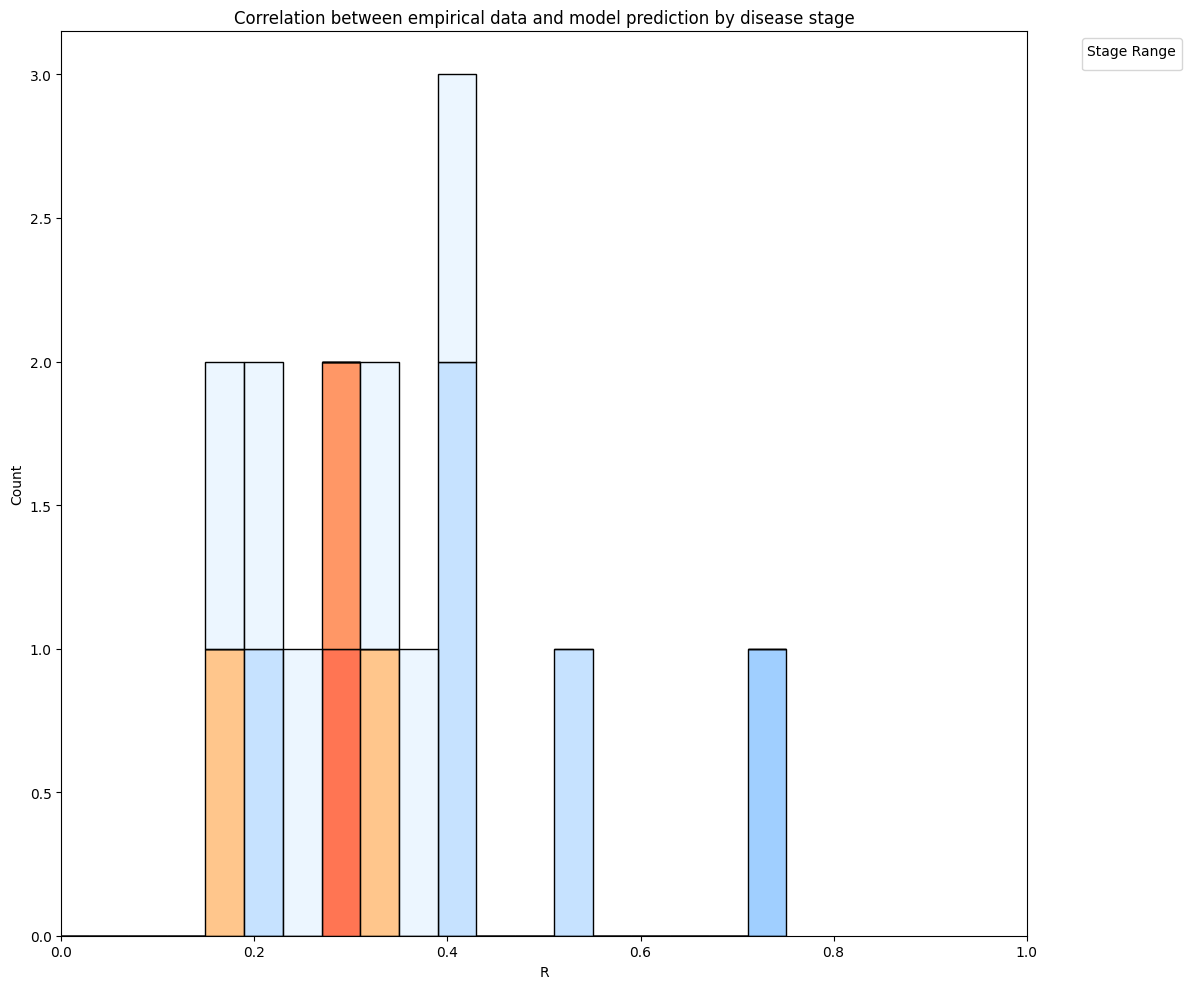

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_956/2455209266.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([''])


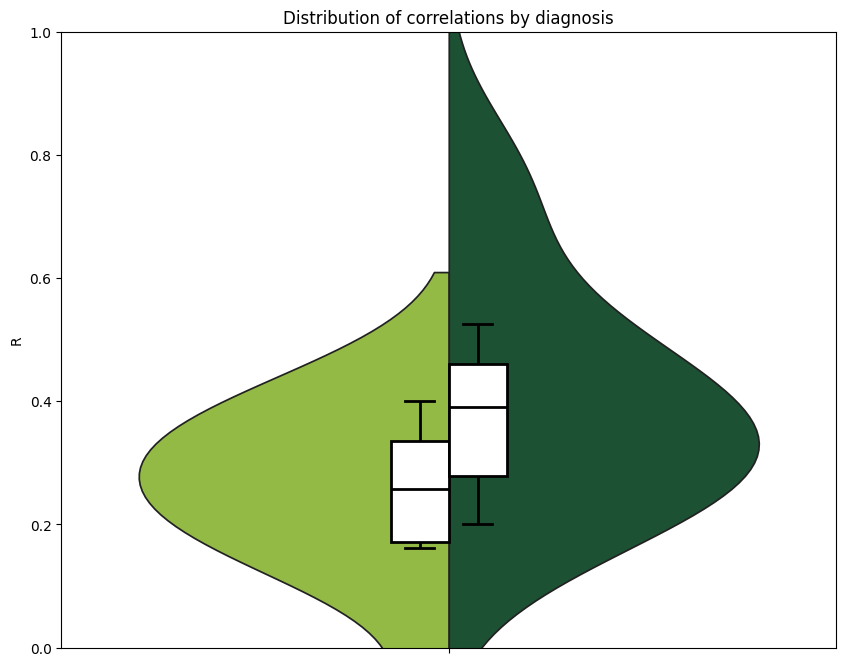

Mean R_longitudinal: 0.306


In [230]:
optimization_data = subtype1_nonzero

# Create histogram organized by stage
plt.figure(figsize=(12, 10))
optimization_data['stage_bin'] = pandas.cut(optimization_data['ml_stage'], 
                                        bins=[0, 2, 4, 6, 8, 10, 12, 14, 16],
                                        labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16'])

ax = sns.histplot(data=optimization_data, x='R_longitudinal', binwidth=0.04, 
                  hue='stage_bin', multiple='stack', 
                  palette=stage_palette, legend=True)

plt.xlabel('R')
plt.ylabel('Count')
plt.title('Correlation between empirical data and model prediction by disease stage')
plt.xlim(0, 1)
plt.legend(title='Stage Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create violin plot 
plt.figure(figsize=(10, 8))
violin_data = optimization_data[optimization_data['Diagnosis'].isin(['MCI', 'Dementia'])]

# Create violin plot
sns.violinplot(data=violin_data, 
               x=['dummy']*len(violin_data), 
               y='R_longitudinal',
               hue='Diagnosis', 
               split=True,
               palette=color_palette, 
               legend=False,
               inner=None)  # Remove the inner box plot as we'll add our own

# Add box plots 
sns.boxplot(data=violin_data,
            x=['dummy']*len(violin_data),
            y='R_longitudinal',
            hue='Diagnosis',
            width=0.15,         
            showfliers=False,   
            linewidth=2,
            legend=False,
            boxprops={'facecolor': 'white', 'edgecolor': 'black'},
            whiskerprops={'color': 'black'},
            capprops={'color': 'black'},
            medianprops={'color': 'black'})      

plt.ylim(0, 1)  # Set y-axis limits
plt.title('Distribution of correlations by diagnosis')
plt.xlabel('')  # Remove x-label since we're using a dummy variable
plt.ylabel('R')
plt.gca().set_xticklabels([''])
plt.show()

# Calculate and print mean R_longitudinal
mean_r = optimization_data['R_longitudinal'].mean()
print(f"Mean R_longitudinal: {mean_r:.3f}")


## Correlations to Subjects' Demographics and Clincial Variables

In [106]:
# Load demographic data
demographic_data = pandas.read_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/sustaln/SuStaIn/data/ADNI3/Regional_Tau_w_Demographics.csv')

#Load archetype assignments
demographic_correlation_data = pandas.read_csv('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/seed archetype results/covariance_vector_assignments.csv')
demographic_correlation_data['archetype_assignment'] = demographic_correlation_data['Singular Vector Assignment'].map(
    {0: 'diffuse', 1: 'entorhinal', 2: 'entorhinal'})

# Merge demographic data with archetype assignments based on RID
demographic_columns = ['RID', 'AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl','MMSE_bl']
demographic_correlation_data = demographic_correlation_data.merge(
    demographic_data[demographic_columns],
    on='RID',
    how='left'
)

# Add alpha and beta parameters to archetype assignments
demographic_correlation_data = demographic_correlation_data.merge(
    parameters_all[['RID', 'alpha', 'beta']], 
    on='RID',
    how='left'
)

demographic_correlation_data.head()


Unnamed: 0.1  Unnamed: 0  RID Diagnosis  ml_stage       MSE         R  \
0             0           3   59       MCI       2.0  0.008492  0.861284   
1             1           4   69       MCI       2.0  0.006275  0.860004   
2             1           4   69       MCI       2.0  0.006275  0.860004   
3             2           6  112  Dementia       7.0  0.008424  0.740628   
4             2           6  112  Dementia       7.0  0.008424  0.740628   

   MSE_longitudinal  R_longitudinal  Left-Cerebellum-Cortex  ...  \
0               NaN             NaN                     0.0  ...   
1          0.003760        0.904679                     0.0  ...   
2          0.003760        0.904679                     0.0  ...   
3          0.025404        0.688990                     0.0  ...   
4          0.025404        0.688990                     0.0  ...   

   ctx-rh-insula  Singular Vector Assignment  archetype_assignment   AGE  \
0       0.000000                           2            entorhinal  70.9   
1       0.155292                           0               diffuse  72.9   
2       0.155292                           0               diffuse  72.9   
3       0.000000                           0               diffuse  70.6   
4       0.000000                           0               diffuse  70.6   

   PTGENDER  APOE4  ADAS11_bl  MMSE_bl     alpha      beta  
0    Female    0.0       7.00       29  0.505937  1.059665  
1      Male    0.0       8.33       28  0.527321  0.820453  
2      Male    0.0       8.33       28  0.527321  0.820453  
3      Male    1.0       6.00       30  0.212957  0.201197  
4      Male    1.0       6.00       30  0.212957  0.201197  

[5 rows x 96 columns]

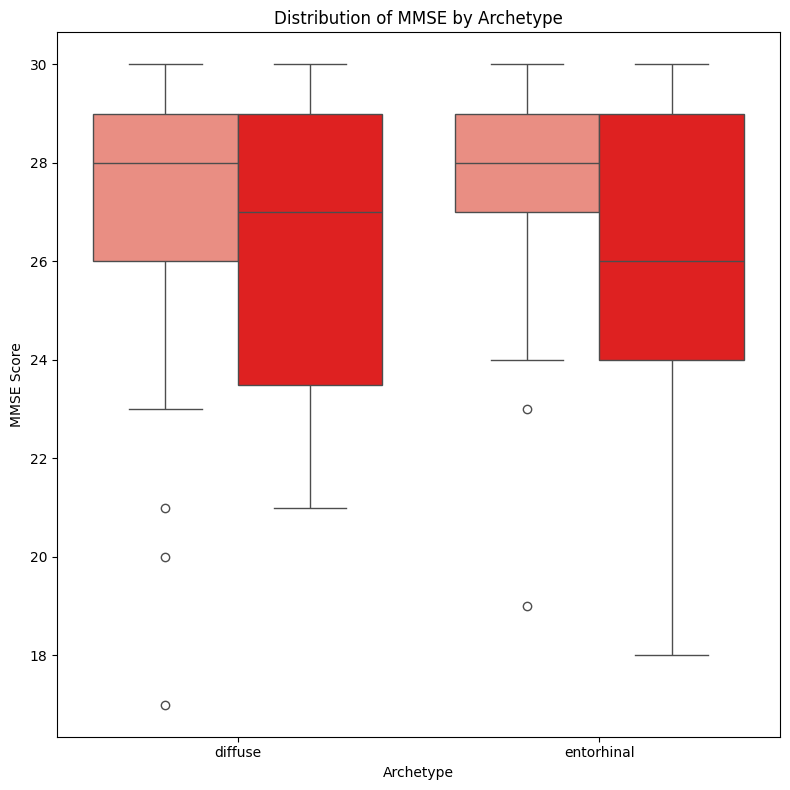

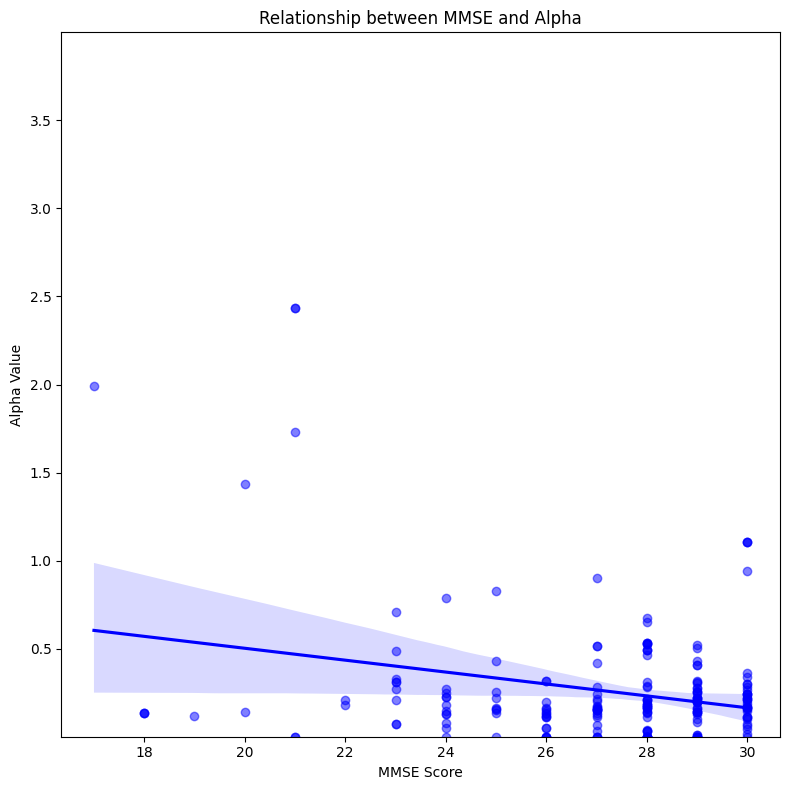

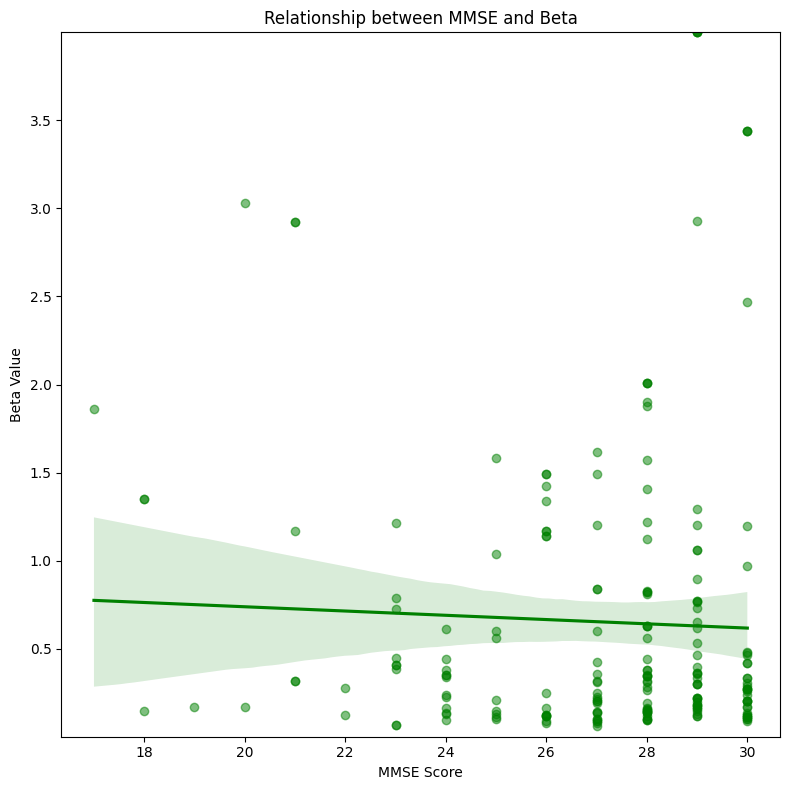


Statistical Results:
--------------------------------------------------
MMSE by Archetype (Mann-Whitney U test):
U=3462.50, p=0.2230

MMSE Correlations:
Alpha: r=-0.269, p=0.0001
Beta: r=-0.040, p=0.5650

MMSE Mean ± SD by archetype:

Diffuse:
MMSE: 26.60 ± 3.16

Entorhinal:
MMSE: 27.33 ± 2.63


In [194]:
# Get min and max for alpha and beta for consistent y-axis
param_min = min(demographic_correlation_data['alpha'].min(), 
                demographic_correlation_data['beta'].min())
param_max = max(demographic_correlation_data['alpha'].max(), 
                demographic_correlation_data['beta'].max())

# MMSE vs Archetype boxplot
plt.figure(figsize=(8, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='MMSE_bl',
           hue='Diagnosis',
           palette=color_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of MMSE by Archetype')
plt.ylabel('MMSE Score')
plt.xlabel('Archetype')
plt.gca().get_legend().remove()
plt.tight_layout()
plt.show()

# MMSE vs Alpha scatter
plt.figure(figsize=(8, 8))
sns.regplot(data=demographic_correlation_data,
           x='MMSE_bl',
           y='alpha',
           color='blue',
           scatter_kws={'alpha':0.5})
plt.title('Relationship between MMSE and Alpha')
plt.xlabel('MMSE Score')
plt.ylabel('Alpha Value')
plt.ylim(param_min, param_max)
plt.tight_layout()
plt.show()

# MMSE vs Beta scatter
plt.figure(figsize=(8, 8))
sns.regplot(data=demographic_correlation_data,
           x='MMSE_bl',
           y='beta',
           color='green',
           scatter_kws={'alpha':0.5})
plt.title('Relationship between MMSE and Beta')
plt.xlabel('MMSE Score')
plt.ylabel('Beta Value')
plt.ylim(param_min, param_max)
plt.tight_layout()
plt.show()

# Statistical tests
# MMSE vs Archetype (Mann-Whitney U test)
groups_mmse = [group['MMSE_bl'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_mmse, p_val_mmse = scipy.stats.mannwhitneyu(*groups_mmse)

# MMSE correlations with parameters (Pearson)
corr_alpha, p_val_alpha = scipy.stats.pearsonr(demographic_correlation_data['MMSE_bl'], 
                                             demographic_correlation_data['alpha'])
corr_beta, p_val_beta = scipy.stats.pearsonr(demographic_correlation_data['MMSE_bl'], 
                                           demographic_correlation_data['beta'])

print("\nStatistical Results:")
print("-" * 50)
print(f"MMSE by Archetype (Mann-Whitney U test):")
print(f"U={stat_mmse:.2f}, p={p_val_mmse:.4f}")

print(f"\nMMSE Correlations:")
print(f"Alpha: r={corr_alpha:.3f}, p={p_val_alpha:.4f}")
print(f"Beta: r={corr_beta:.3f}, p={p_val_beta:.4f}")

# Print mean and std values for MMSE by archetype
print("\nMMSE Mean ± SD by archetype:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"MMSE: {arch_data['MMSE_bl'].mean():.2f} ± {arch_data['MMSE_bl'].std():.2f}")

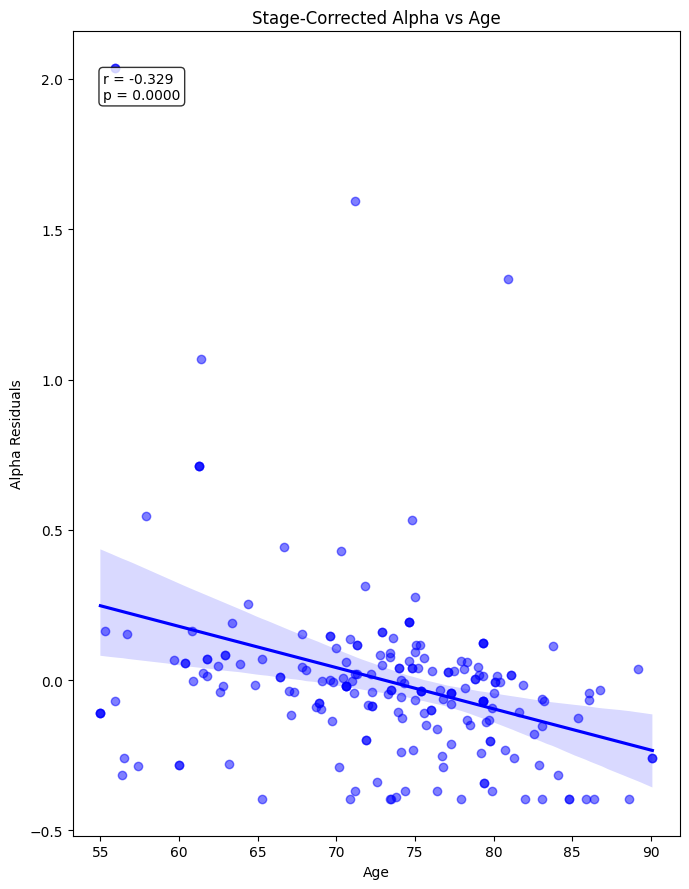

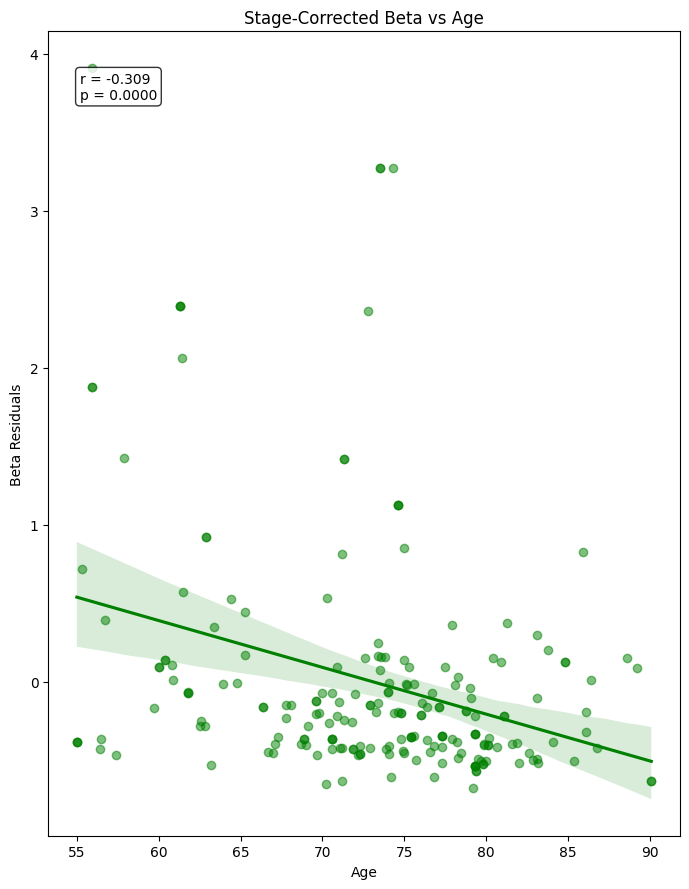

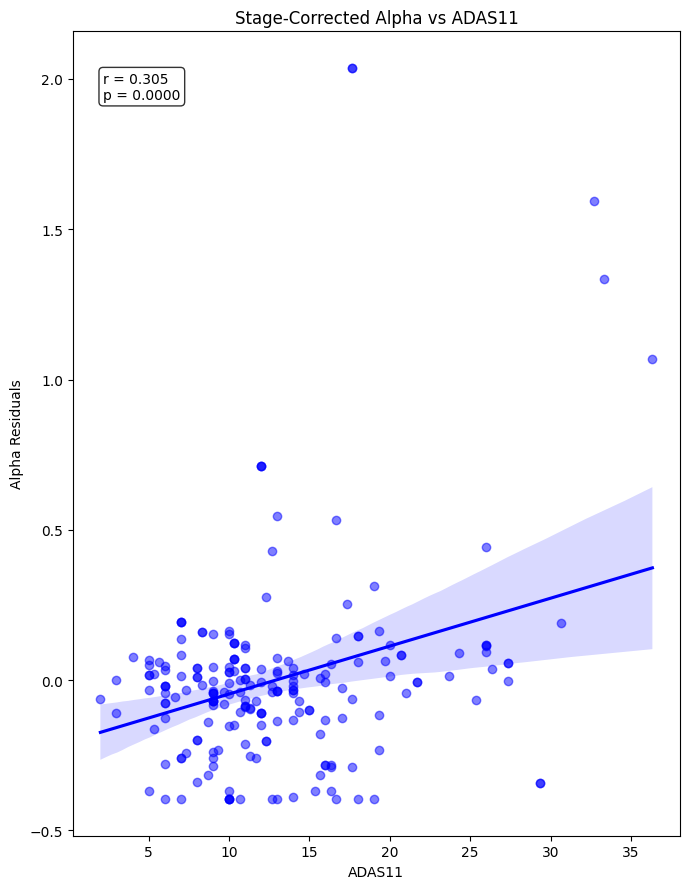

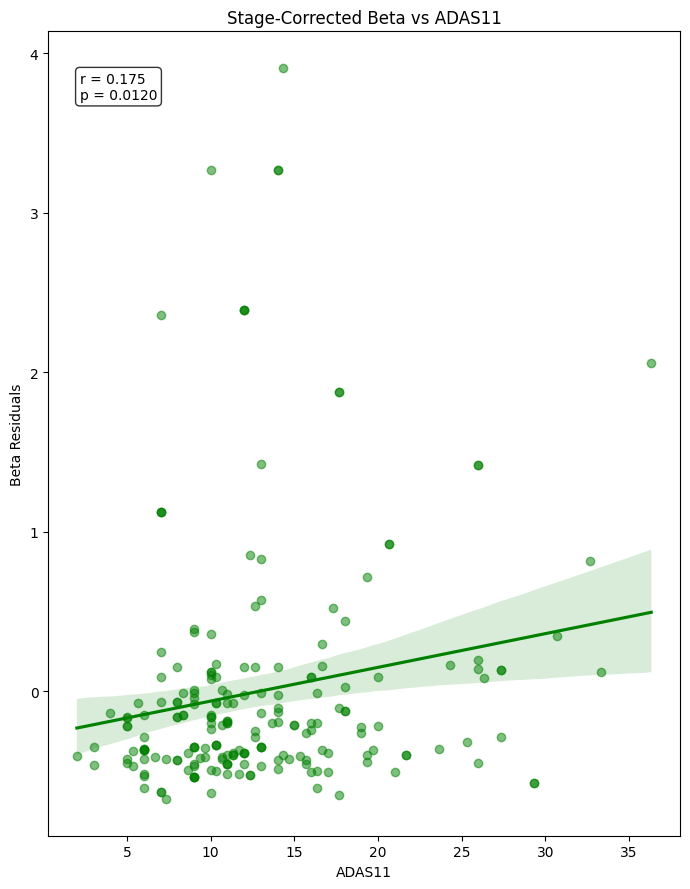

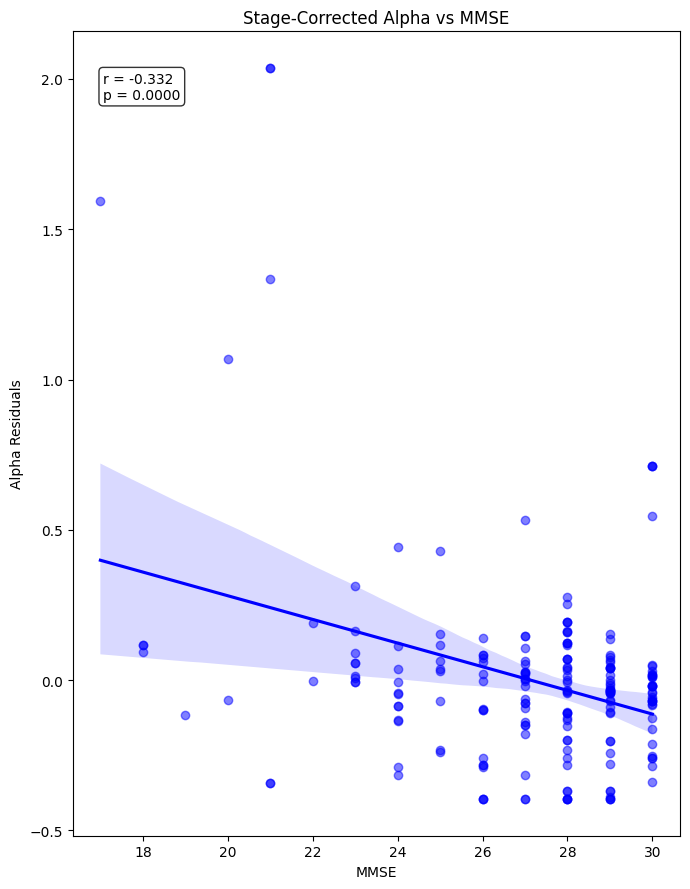

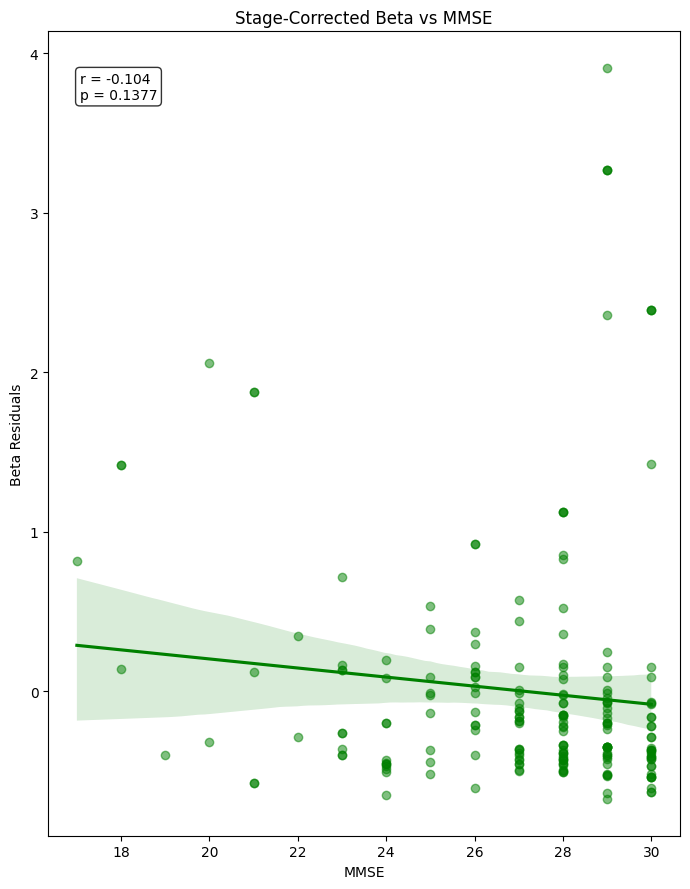

In [197]:
# First, create residuals by regressing out stage (same as before)
from sklearn.linear_model import LinearRegression

# Create residuals (same code as before)
X_stage = demographic_correlation_data['ml_stage'].values.reshape(-1, 1)
y_alpha = demographic_correlation_data['alpha'].values
y_beta = demographic_correlation_data['beta'].values

alpha_model = LinearRegression()
beta_model = LinearRegression()
alpha_model.fit(X_stage, y_alpha)
beta_model.fit(X_stage, y_beta)
alpha_residuals = y_alpha - alpha_model.predict(X_stage)
beta_residuals = y_beta - beta_model.predict(X_stage)
demographic_correlation_data['alpha_residuals'] = alpha_residuals
demographic_correlation_data['beta_residuals'] = beta_residuals

# Function to create plot with stats
def plot_residuals(x_var, x_label, residual_type='alpha'):
    plt.figure(figsize=(7, 9))
    
    # Calculate correlation
    corr, p_val = scipy.stats.pearsonr(demographic_correlation_data[x_var], 
                                      demographic_correlation_data[f'{residual_type}_residuals'])
    
    # Create plot
    sns.regplot(data=demographic_correlation_data,
               x=x_var,
               y=f'{residual_type}_residuals',
               color='blue' if residual_type == 'alpha' else 'green',
               scatter_kws={'alpha':0.5})
    
    # Add stats text
    stats_text = f'r = {corr:.3f}\np = {p_val:.4f}'
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.title(f'Stage-Corrected {residual_type.capitalize()} vs {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(f'{residual_type.capitalize()} Residuals')
    plt.tight_layout()
    plt.show()

# Create all plots
for var, label in [('AGE', 'Age'), 
                   ('ADAS11_bl', 'ADAS11'), 
                   ('MMSE_bl', 'MMSE')]:
    # Alpha plots
    plot_residuals(var, label, 'alpha')
    # Beta plots
    plot_residuals(var, label, 'beta')

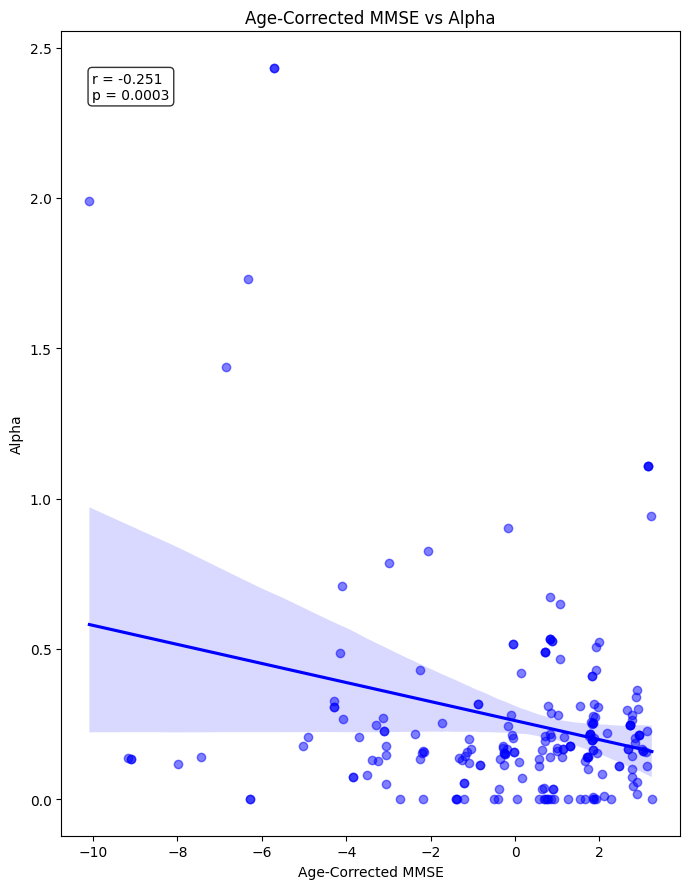

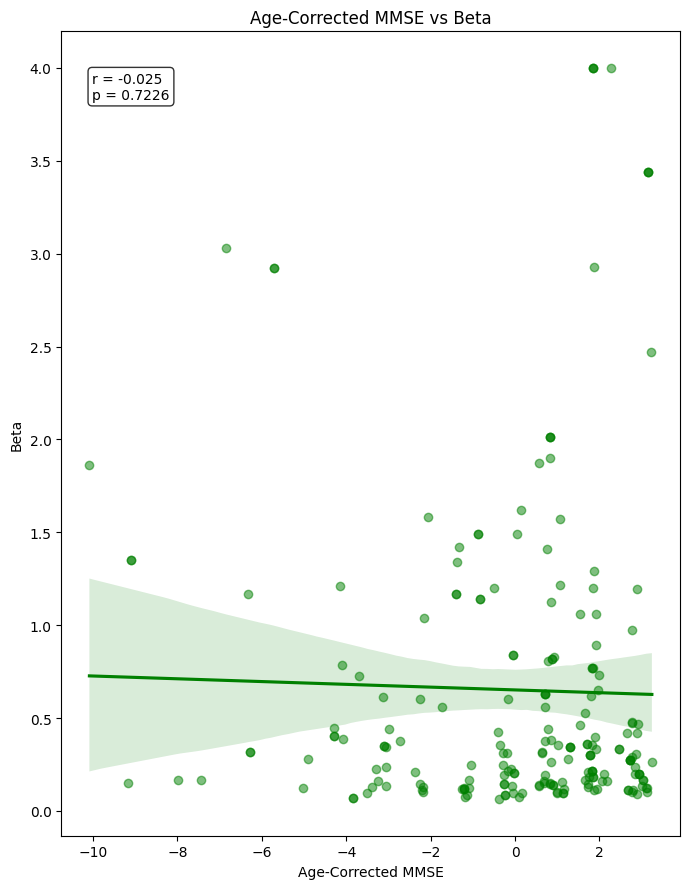

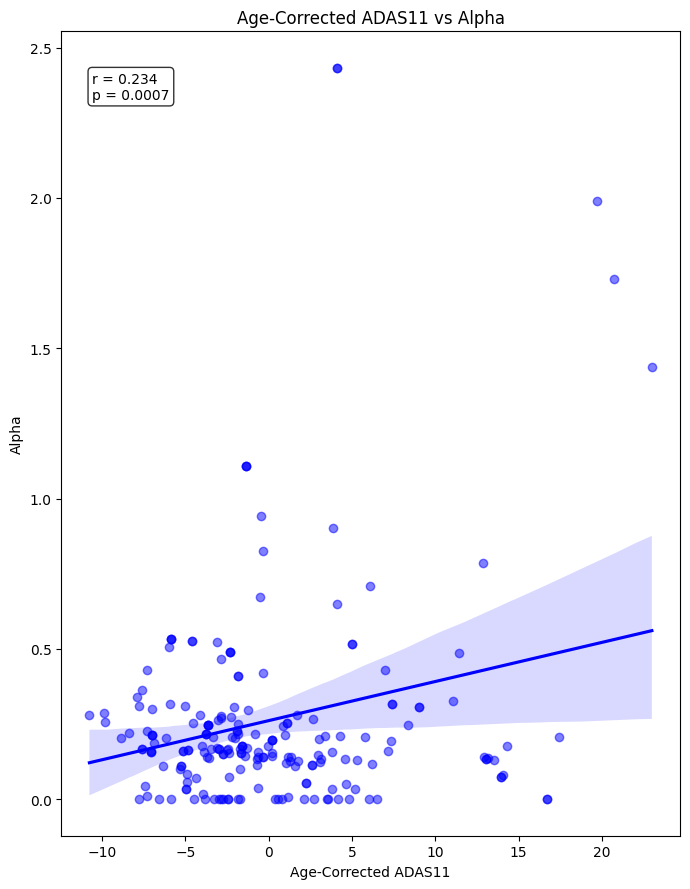

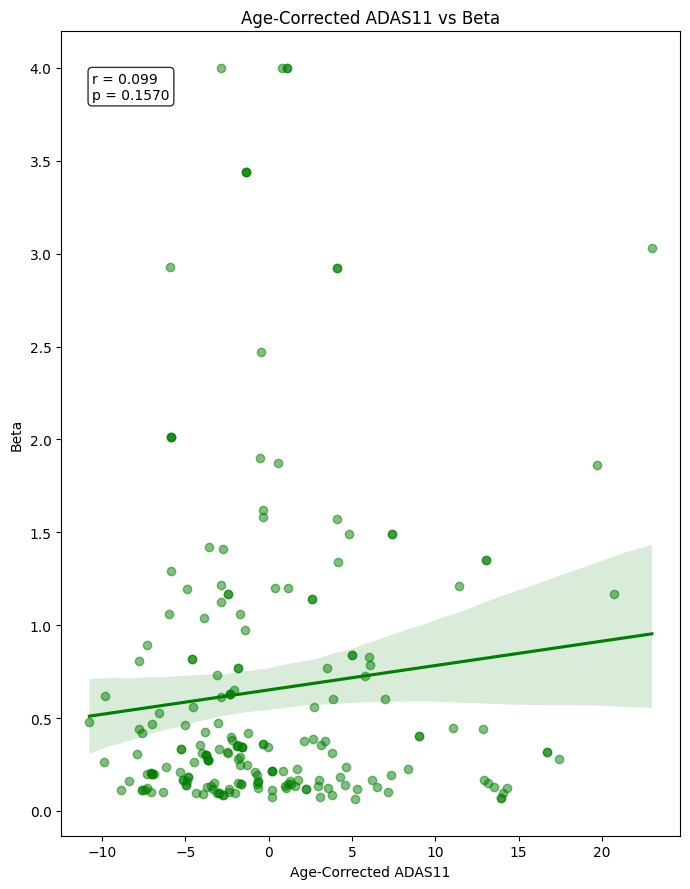

In [198]:
# First, regress out age from cognitive scores
# For MMSE
X_age = demographic_correlation_data['AGE'].values.reshape(-1, 1)

# MMSE
y_mmse = demographic_correlation_data['MMSE_bl'].values
mmse_model = LinearRegression()
mmse_model.fit(X_age, y_mmse)
mmse_residuals = y_mmse - mmse_model.predict(X_age)
demographic_correlation_data['mmse_residuals'] = mmse_residuals

# ADAS11
y_adas = demographic_correlation_data['ADAS11_bl'].values
adas_model = LinearRegression()
adas_model.fit(X_age, y_adas)
adas_residuals = y_adas - adas_model.predict(X_age)
demographic_correlation_data['adas_residuals'] = adas_residuals

# Function to create plot with stats
def plot_cognitive_correlation(cog_var, cog_label, param_type='alpha'):
    plt.figure(figsize=(7, 9))
    
    # Calculate correlation
    corr, p_val = scipy.stats.pearsonr(demographic_correlation_data[f'{cog_var}_residuals'], 
                                      demographic_correlation_data[param_type])
    
    # Create plot
    sns.regplot(data=demographic_correlation_data,
               x=f'{cog_var}_residuals',
               y=param_type,
               color='blue' if param_type == 'alpha' else 'green',
               scatter_kws={'alpha':0.5})
    
    # Add stats text
    stats_text = f'r = {corr:.3f}\np = {p_val:.4f}'
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.title(f'Age-Corrected {cog_label} vs {param_type.capitalize()}')
    plt.xlabel(f'Age-Corrected {cog_label}')
    plt.ylabel(param_type.capitalize())
    plt.tight_layout()
    plt.show()

# Create all plots
for var, label in [('mmse', 'MMSE'), ('adas', 'ADAS11')]:
    # Alpha plots
    plot_cognitive_correlation(var, label, 'alpha')
    # Beta plots
    plot_cognitive_correlation(var, label, 'beta')

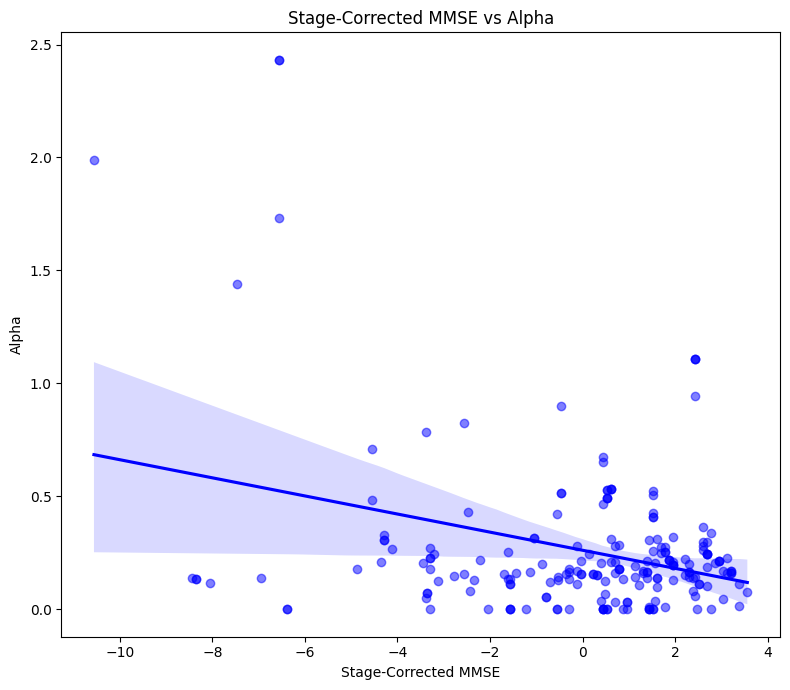


Correlation between Stage-Corrected MMSE and alpha:
r = -0.316, p = 0.0000


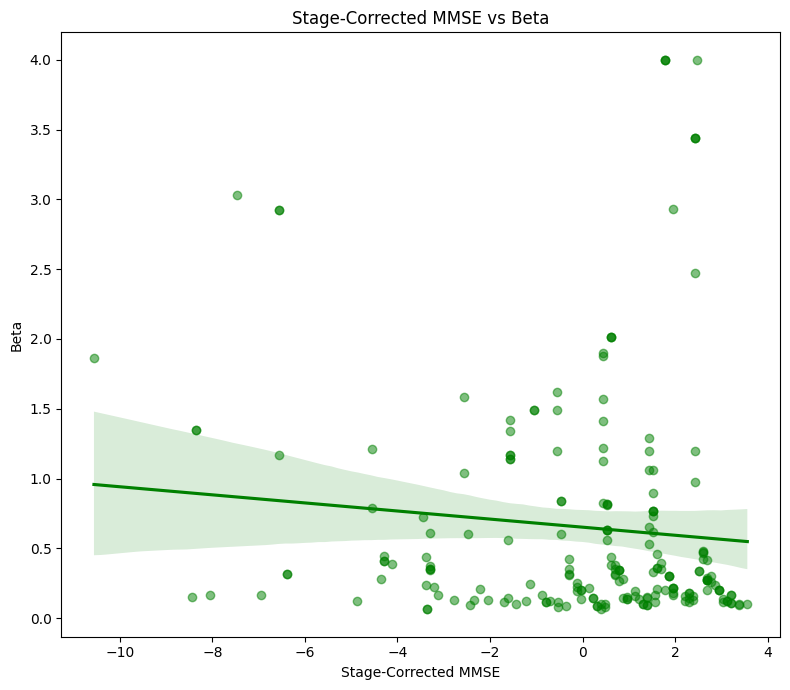


Correlation between Stage-Corrected MMSE and beta:
r = -0.096, p = 0.1719


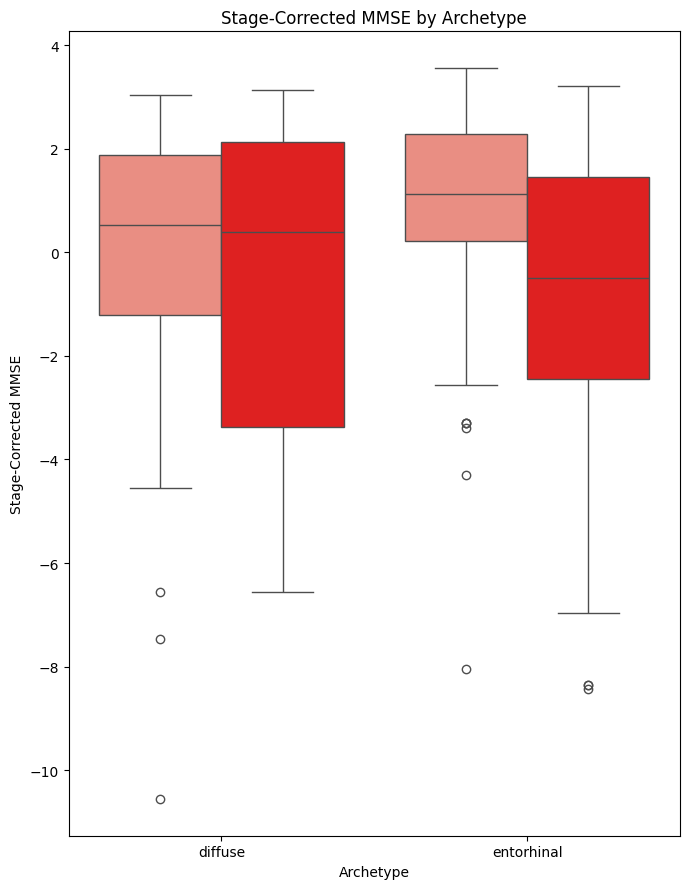


Mann-Whitney U test for Stage-Corrected MMSE by Archetype:
U = 3564.5, p = 0.3563

MMSE Mean ± SD by archetype:
Diffuse: -0.559 ± 3.293
Entorhinal: 0.205 ± 2.540


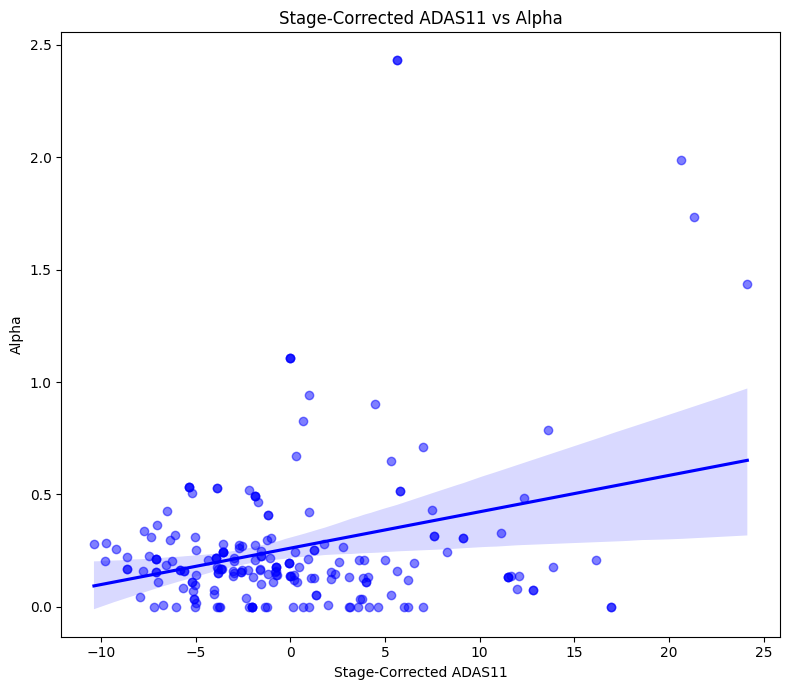


Correlation between Stage-Corrected ADAS11 and alpha:
r = 0.289, p = 0.0000


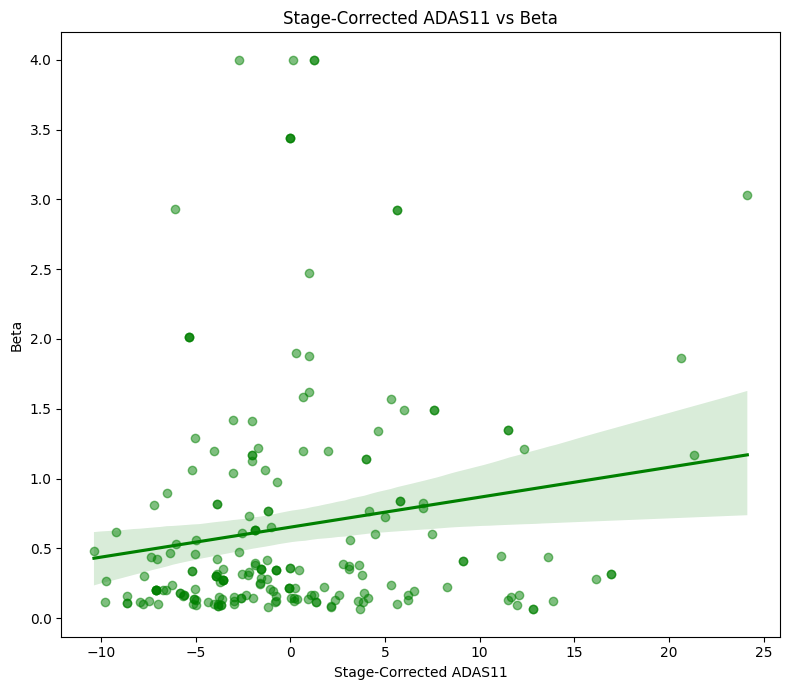


Correlation between Stage-Corrected ADAS11 and beta:
r = 0.161, p = 0.0210


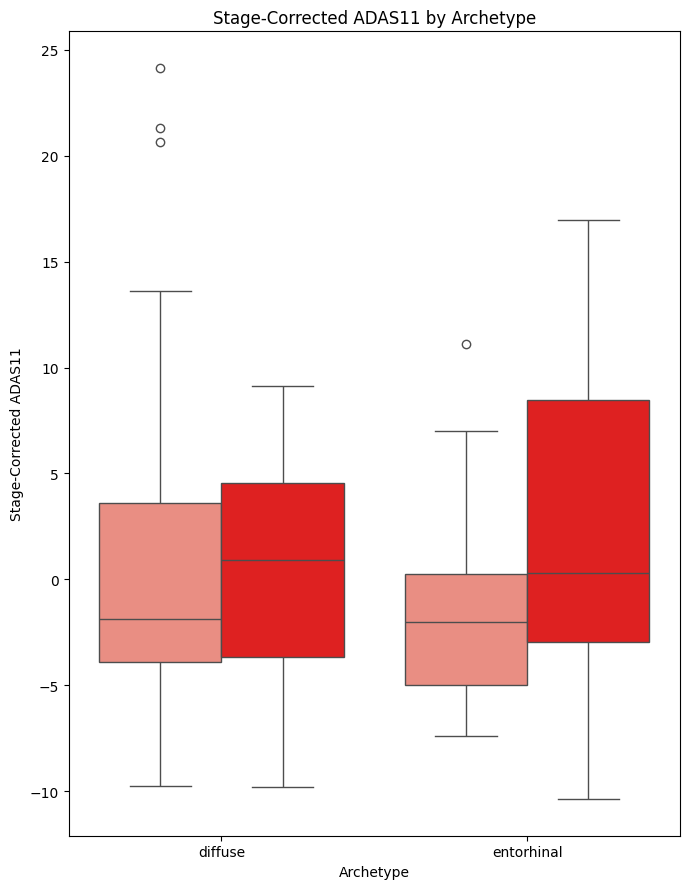


Mann-Whitney U test for Stage-Corrected ADAS11 by Archetype:
U = 4130.5, p = 0.5266

ADAS11 Mean ± SD by archetype:
Diffuse: 0.827 ± 7.679
Entorhinal: -0.406 ± 5.642


In [207]:
# First, regress out stage from cognitive scores
X_stage = demographic_correlation_data['ml_stage'].values.reshape(-1, 1)

# MMSE
y_mmse = demographic_correlation_data['MMSE_bl'].values
mmse_model = LinearRegression()
mmse_model.fit(X_stage, y_mmse)
mmse_residuals = y_mmse - mmse_model.predict(X_stage)
demographic_correlation_data['mmse_stage_residuals'] = mmse_residuals

# ADAS11
y_adas = demographic_correlation_data['ADAS11_bl'].values
adas_model = LinearRegression()
adas_model.fit(X_stage, y_adas)
adas_residuals = y_adas - adas_model.predict(X_stage)
demographic_correlation_data['adas_stage_residuals'] = adas_residuals

# Function to plot correlations with parameters (alpha/beta)
def plot_cognitive_param_correlation(cog_var, cog_label, param_type='alpha'):
    plt.figure(figsize=(8, 7))
    
    # Calculate correlation
    corr, p_val = scipy.stats.pearsonr(demographic_correlation_data[f'{cog_var}_stage_residuals'], 
                                      demographic_correlation_data[param_type])
    
    # Create plot
    sns.regplot(data=demographic_correlation_data,
               x=f'{cog_var}_stage_residuals',
               y=param_type,
               color='blue' if param_type == 'alpha' else 'green',
               scatter_kws={'alpha':0.5})
    
    plt.title(f'Stage-Corrected {cog_label} vs {param_type.capitalize()}')
    plt.xlabel(f'Stage-Corrected {cog_label}')
    plt.ylabel(param_type.capitalize())
    plt.tight_layout()
    plt.show()
    
    # Print stats below plot
    print(f"\nCorrelation between Stage-Corrected {cog_label} and {param_type}:")
    print(f"r = {corr:.3f}, p = {p_val:.4f}")

# Create all plots
for var, label in [('mmse', 'MMSE'), ('adas', 'ADAS11')]:
    # Correlations with alpha and beta
    plot_cognitive_param_correlation(var, label, 'alpha')
    plot_cognitive_param_correlation(var, label, 'beta')
    
    # Distribution by archetype
    plot_cognitive_by_archetype(var, label)

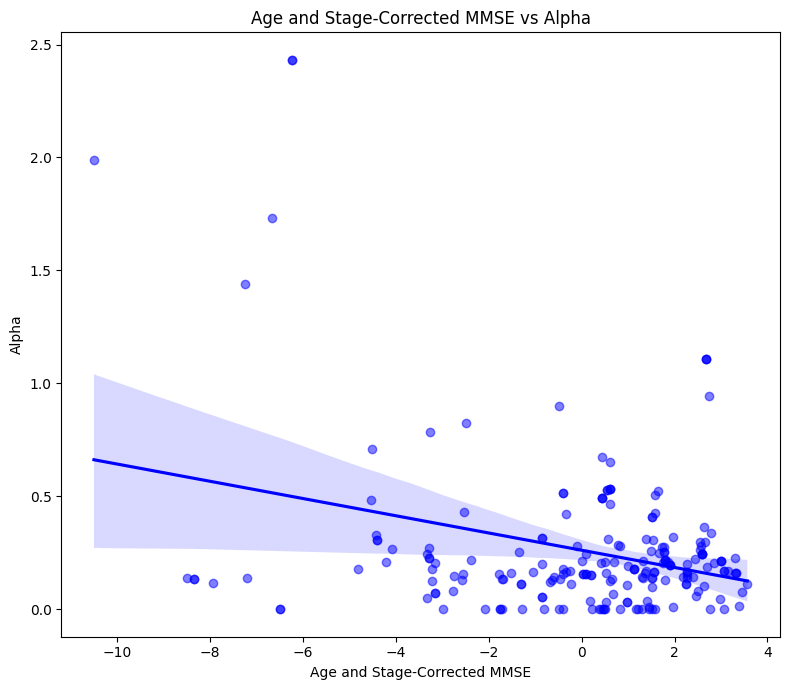


Correlation between Age and Stage-Corrected MMSE and alpha:
r = -0.300, p = 0.0000


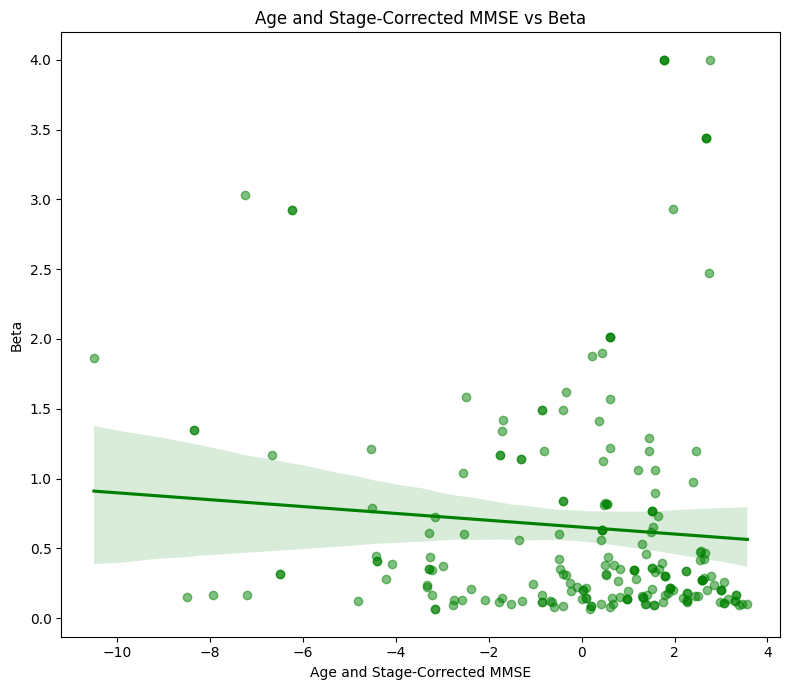


Correlation between Age and Stage-Corrected MMSE and beta:
r = -0.081, p = 0.2468


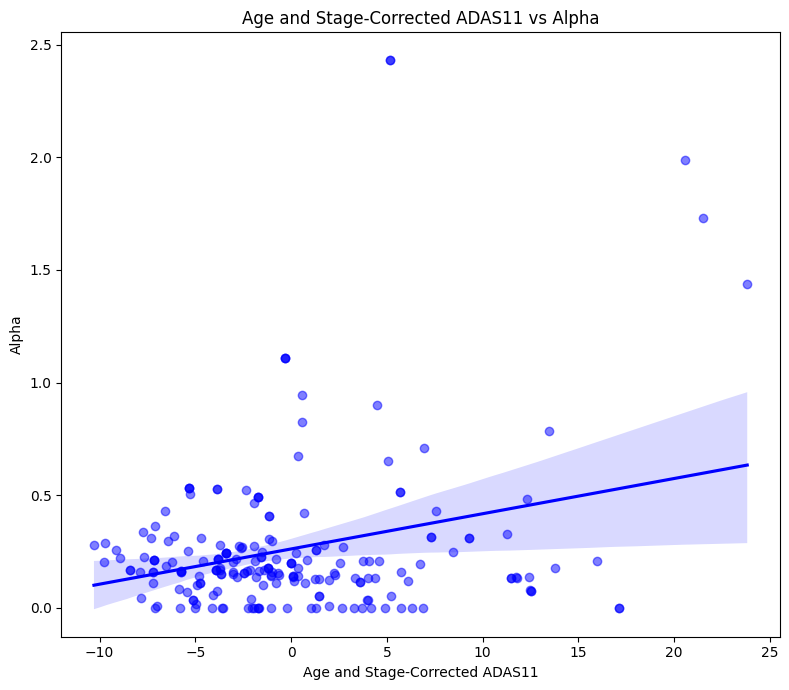


Correlation between Age and Stage-Corrected ADAS11 and alpha:
r = 0.280, p = 0.0000


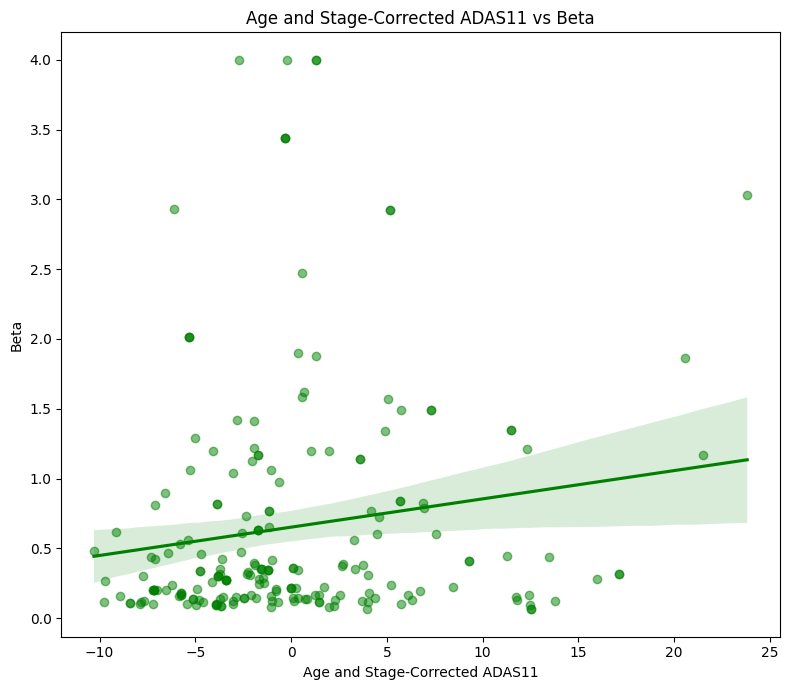


Correlation between Age and Stage-Corrected ADAS11 and beta:
r = 0.152, p = 0.0295


In [244]:
# First, regress out both age and stage from cognitive scores
X = demographic_correlation_data[['AGE', 'ml_stage']].values

# MMSE
y_mmse = demographic_correlation_data['MMSE_bl'].values
mmse_model = LinearRegression()
mmse_model.fit(X, y_mmse)
mmse_residuals = y_mmse - mmse_model.predict(X)
demographic_correlation_data['mmse_age_stage_residuals'] = mmse_residuals

# ADAS11
y_adas = demographic_correlation_data['ADAS11_bl'].values
adas_model = LinearRegression()
adas_model.fit(X, y_adas)
adas_residuals = y_adas - adas_model.predict(X)
demographic_correlation_data['adas_age_stage_residuals'] = adas_residuals

# Function to plot correlations with parameters (alpha/beta)
def plot_cognitive_param_correlation(cog_var, cog_label, param_type='alpha'):
    plt.figure(figsize=(8, 7))
    
    # Calculate correlation
    corr, p_val = scipy.stats.pearsonr(demographic_correlation_data[f'{cog_var}_age_stage_residuals'], 
                                      demographic_correlation_data[param_type])
    
    # Create plot
    sns.regplot(data=demographic_correlation_data,
               x=f'{cog_var}_age_stage_residuals',
               y=param_type,
               color='blue' if param_type == 'alpha' else 'green',
               scatter_kws={'alpha':0.5})
    
    plt.title(f'Age and Stage-Corrected {cog_label} vs {param_type.capitalize()}')
    plt.xlabel(f'Age and Stage-Corrected {cog_label}')
    plt.ylabel(param_type.capitalize())
    plt.tight_layout()
    plt.show()
    
    # Print stats below plot
    print(f"\nCorrelation between Age and Stage-Corrected {cog_label} and {param_type}:")
    print(f"r = {corr:.3f}, p = {p_val:.4f}")

# Create all plots
for var, label in [('mmse', 'MMSE'), ('adas', 'ADAS11')]:
    # Correlations with alpha and beta
    plot_cognitive_param_correlation(var, label, 'alpha')
    plot_cognitive_param_correlation(var, label, 'beta')

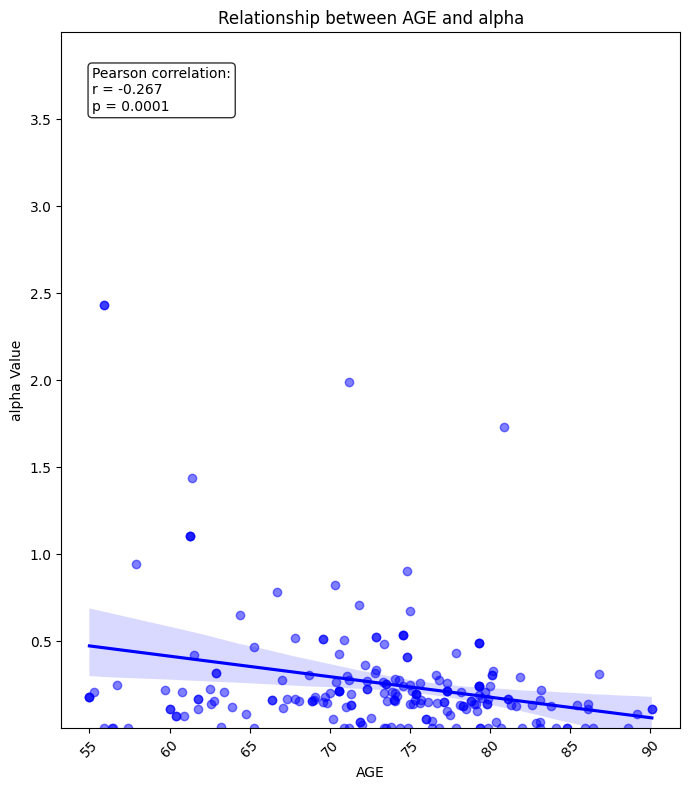

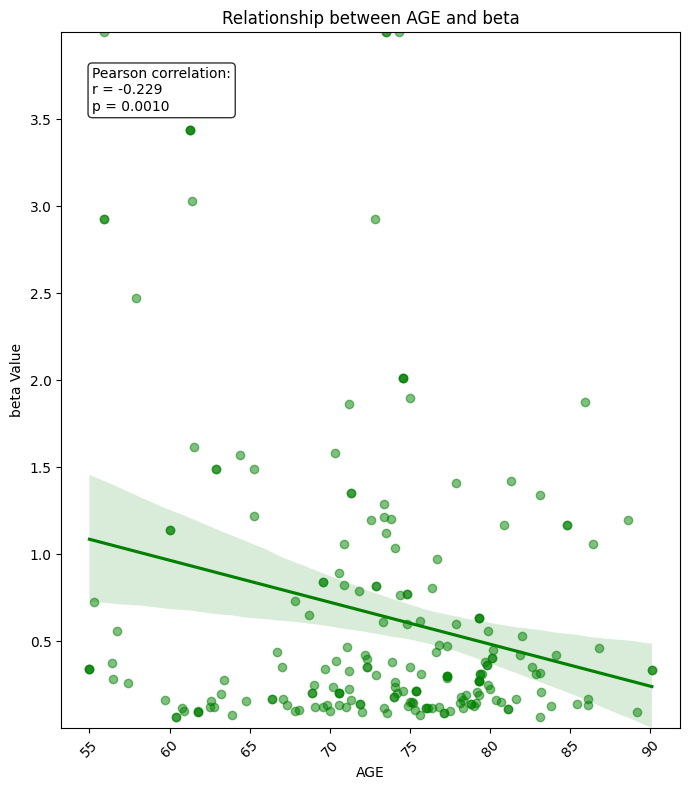

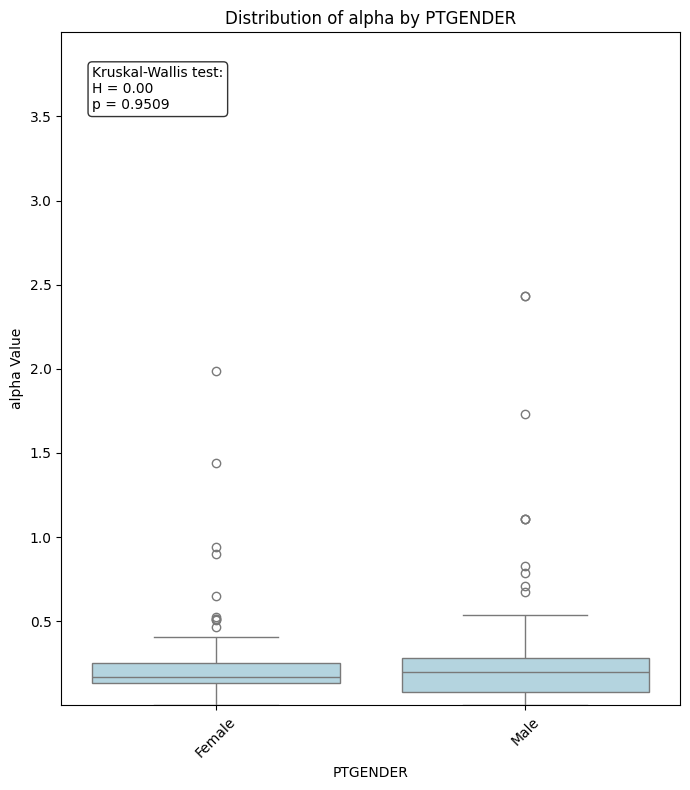

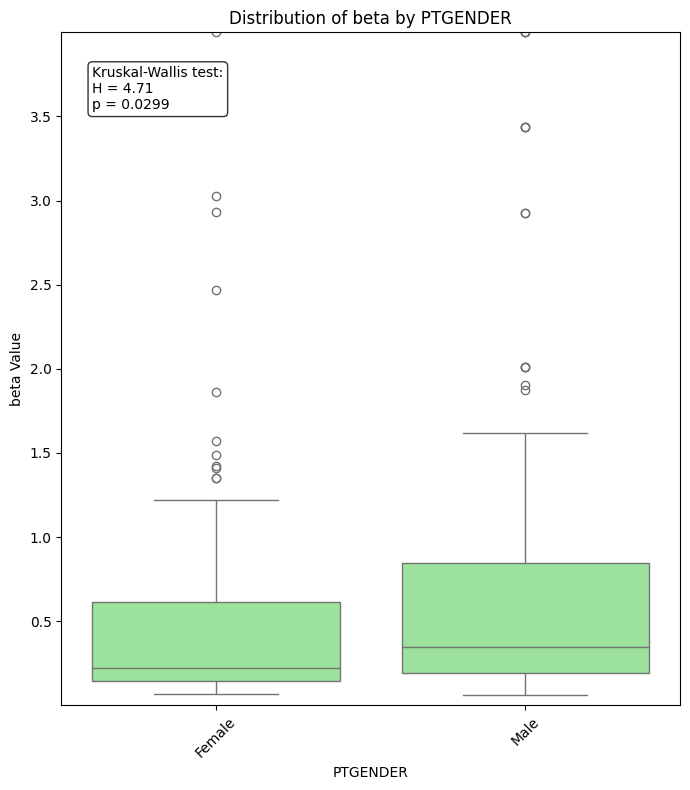

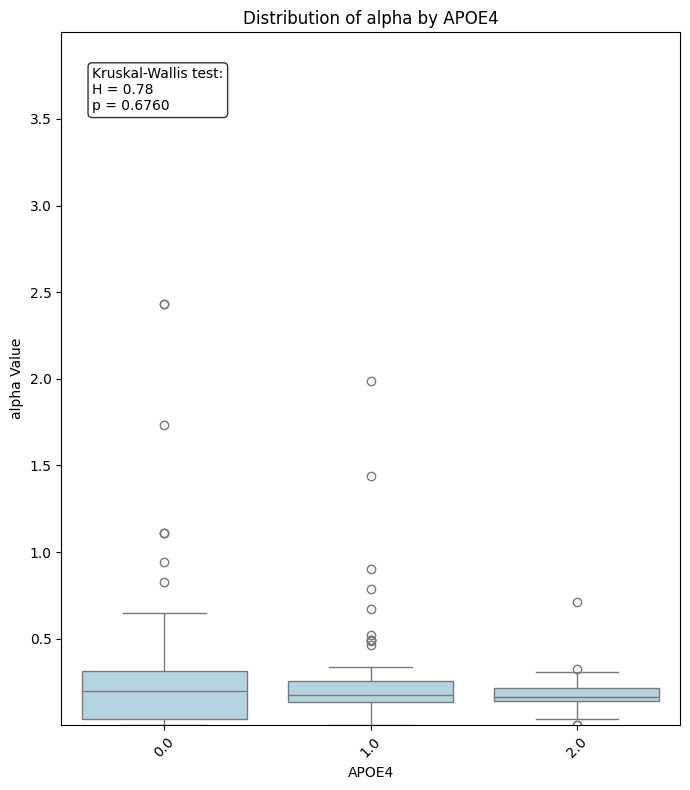

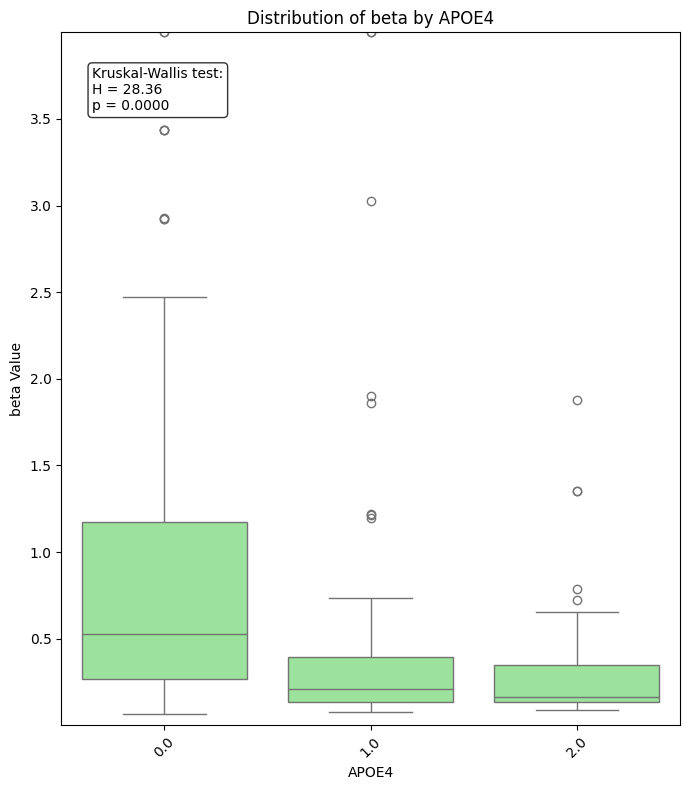

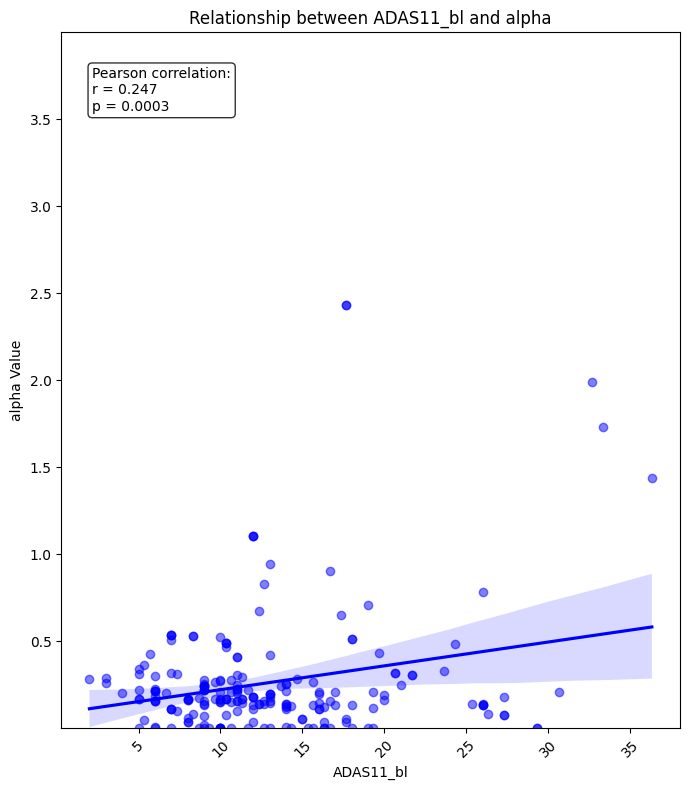

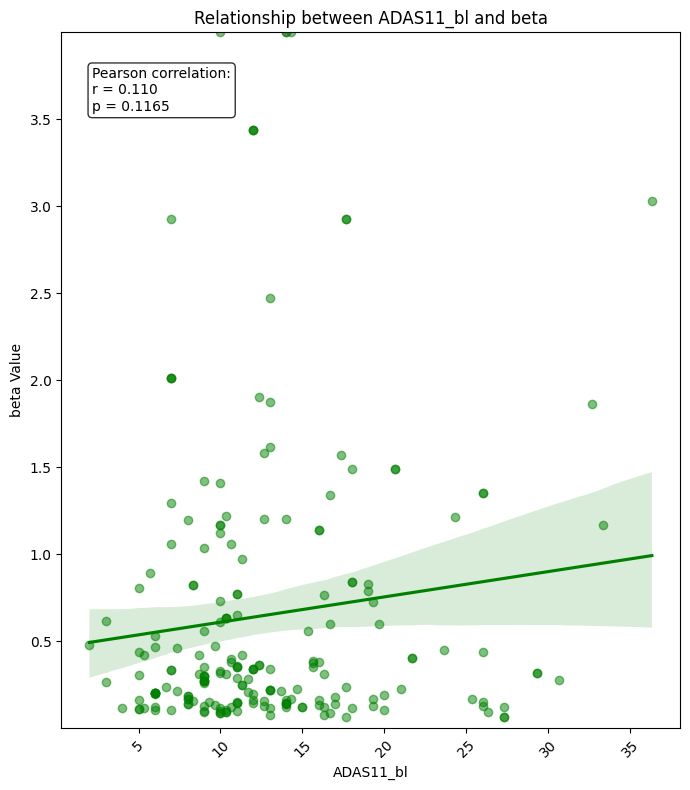

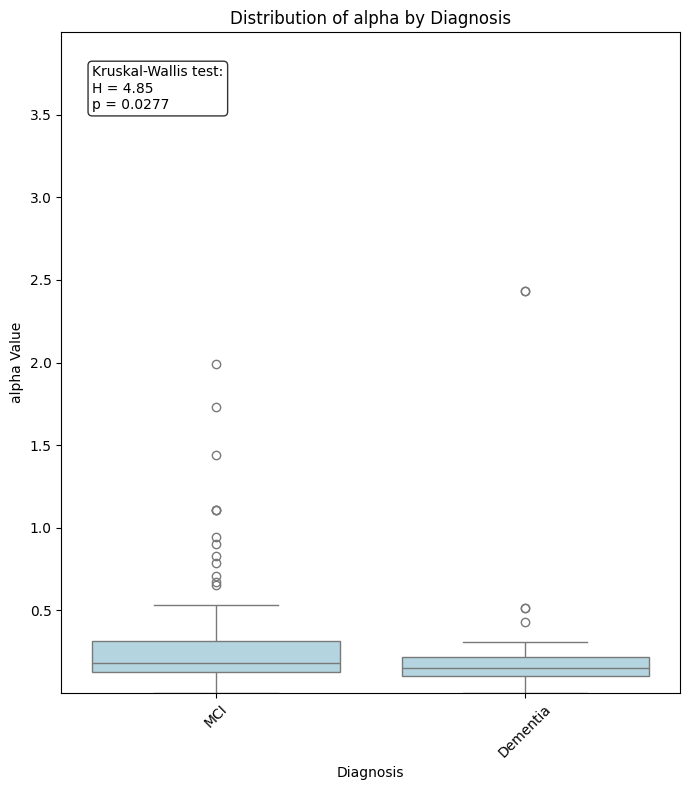

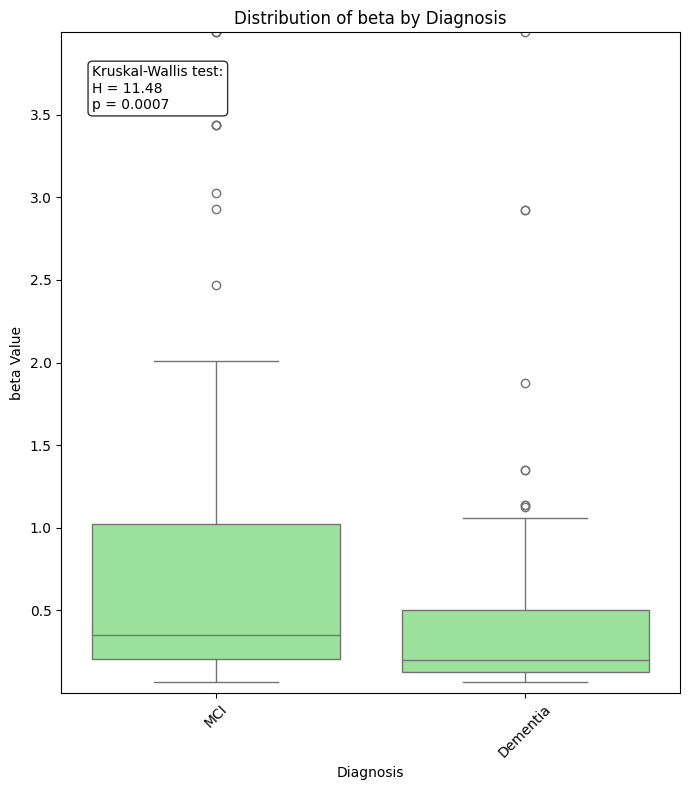

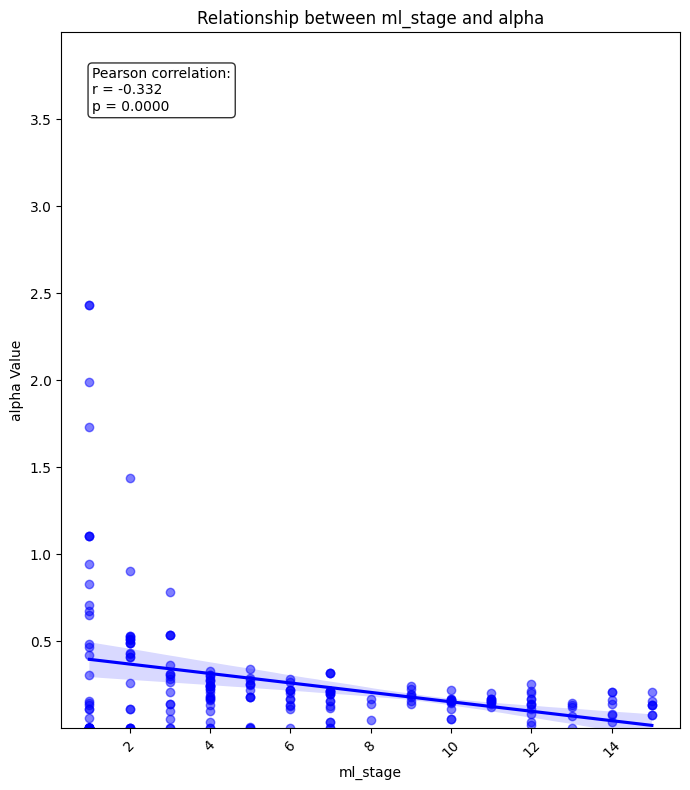

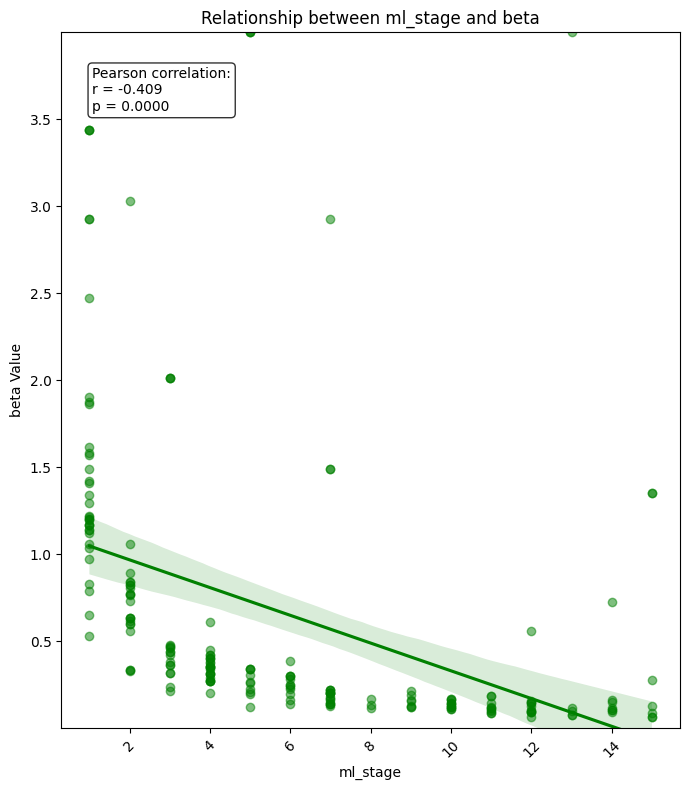


Mean values across categorical variables:
--------------------------------------------------

Diagnosis:
Diagnosis
Dementia    0.223
MCI         0.282
Name: alpha, dtype: float64
Diagnosis
Dementia    0.483
MCI         0.742
Name: beta, dtype: float64
------------------------------

PTGENDER:
PTGENDER
Female    0.243
Male      0.275
Name: alpha, dtype: float64
PTGENDER
Female    0.545
Male      0.728
Name: beta, dtype: float64
------------------------------

archetype_assignment:
archetype_assignment
diffuse       0.438
entorhinal    0.201
Name: alpha, dtype: float64
archetype_assignment
diffuse       0.714
entorhinal    0.613
Name: beta, dtype: float64
------------------------------

Mean R values across continuous variables:
--------------------------------------------------

AGE:
Mean R: 0.85
------------------------------

ADAS11_bl:
Mean R: 0.85
------------------------------

MMSE_bl:
Mean R: 0.85
------------------------------


In [11]:
variables = ['AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl', 'Diagnosis', 'ml_stage']

for var in variables:
    # Get overall min and max for both alpha and beta for consistent y-axis
    y_min = min(demographic_correlation_data['alpha'].min(), 
                demographic_correlation_data['beta'].min())
    y_max = max(demographic_correlation_data['alpha'].max(), 
                demographic_correlation_data['beta'].max())
    
    if var in ['PTGENDER', 'APOE4', 'Diagnosis']:
        # For categorical variables
        for param in ['alpha', 'beta']:
            plt.figure(figsize=(7, 8))
            
            # Create boxplot
            sns.boxplot(data=demographic_correlation_data, 
                       x=var, 
                       y=param,
                       color='lightblue' if param == 'alpha' else 'lightgreen')
            
            plt.title(f'Distribution of {param} by {var}')
            plt.ylabel(f'{param} Value')
            plt.xticks(rotation=45)
            plt.ylim(y_min, y_max)
            
            # Perform Kruskal-Wallis test
            h_stat, p_val = scipy.stats.kruskal(*[group[param].values 
                                                 for name, group in demographic_correlation_data.groupby(var)])
            
            # Add stats text to plot
            stats_text = f'Kruskal-Wallis test:\nH = {h_stat:.2f}\np = {p_val:.4f}'
            plt.text(0.05, 0.95, stats_text,
                    transform=plt.gca().transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            plt.show()
            
    else:
        # For numerical variables
        for param in ['alpha', 'beta']:
            plt.figure(figsize=(7, 8))
            
            # Create scatter plot with regression line
            sns.regplot(data=demographic_correlation_data, 
                       x=var, 
                       y=param,
                       scatter_kws={'alpha':0.5},
                       color='blue' if param == 'alpha' else 'green')
            
            plt.title(f'Relationship between {var} and {param}')
            plt.ylabel(f'{param} Value')
            plt.xlabel(var)
            plt.xticks(rotation=45)
            plt.ylim(y_min, y_max)
            
            # Calculate Pearson correlation
            corr, p_val = scipy.stats.pearsonr(demographic_correlation_data[var], 
                                             demographic_correlation_data[param])
            
            # Add stats text to plot
            stats_text = f'Pearson correlation:\nr = {corr:.3f}\np = {p_val:.4f}'
            plt.text(0.05, 0.95, stats_text,
                    transform=plt.gca().transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            plt.show()

# Print mean values for alpha and beta across categorical variables
categorical_vars = ['Diagnosis', 'PTGENDER', 'archetype_assignment']
print("\nMean values across categorical variables:")
print("-" * 50)
for var in categorical_vars:
    print(f"\n{var}:")
    print(demographic_correlation_data.groupby(var)['alpha'].mean().round(3))
    print(demographic_correlation_data.groupby(var)['beta'].mean().round(3))
    print("-" * 30)

# Print mean R values across continuous variables 
continuous_vars = ['AGE', 'ADAS11_bl', 'MMSE_bl']
print("\nMean R values across continuous variables:")
print("-" * 50)
for var in continuous_vars:
    print(f"\n{var}:")
    print(f"Mean R: {demographic_correlation_data['R'].mean().round(3)}")
    print("-" * 30)

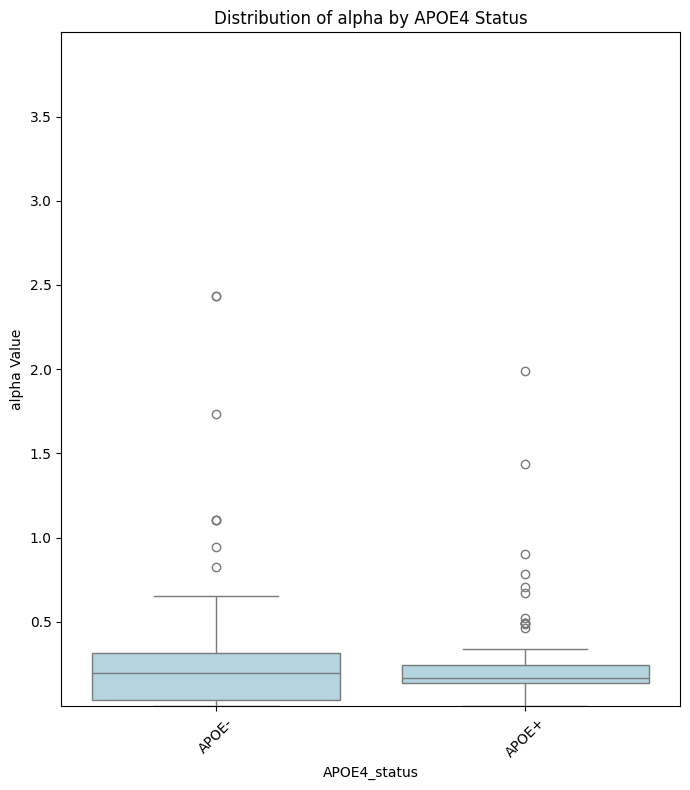

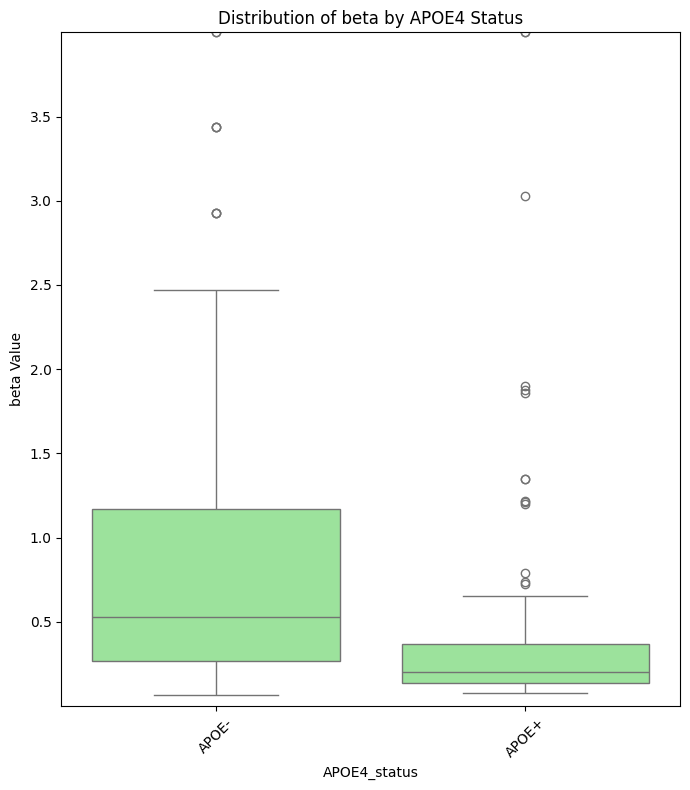


Mean ± SD values by APOE4 status:

APOE-:
Alpha: 0.294 ± 0.426
Beta: 0.898 ± 0.925

APOE+:
Alpha: 0.234 ± 0.258
Beta: 0.436 ± 0.670


In [15]:
# Create binary APOE4 status (+ or -)
demographic_correlation_data['APOE4_status'] = demographic_correlation_data['APOE4'].map({0: 'APOE-', 1: 'APOE+', 2: 'APOE+'})

# Get overall min and max for both alpha and beta for consistent y-axis
y_min = min(demographic_correlation_data['alpha'].min(), 
            demographic_correlation_data['beta'].min())
y_max = max(demographic_correlation_data['alpha'].max(), 
            demographic_correlation_data['beta'].max())

# For each parameter (alpha and beta)
for param in ['alpha', 'beta']:
    plt.figure(figsize=(7, 8))
    
    # Create boxplot
    sns.boxplot(data=demographic_correlation_data, 
               x='APOE4_status', 
               y=param,
               color='lightblue' if param == 'alpha' else 'lightgreen')
    
    plt.title(f'Distribution of {param} by APOE4 Status')
    plt.ylabel(f'{param} Value')
    plt.xticks(rotation=45)
    plt.ylim(y_min, y_max)
    
    # Perform Mann-Whitney U test (since we now have 2 groups)
    groups = [group[param].values for name, group in demographic_correlation_data.groupby('APOE4_status')]
    stat, p_val = scipy.stats.mannwhitneyu(*groups)
    
    # # Add stats text to plot
    # stats_text = f'Mann-Whitney U test:\nU = {stat:.2f}\np = {p_val:.4f}'
    # plt.text(0.05, 0.95, stats_text,
    #         transform=plt.gca().transAxes,
    #         verticalalignment='top',
    #         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Print mean values
print("\nMean ± SD values by APOE4 status:")
for status in ['APOE-', 'APOE+']:
    apoe_data = demographic_correlation_data[demographic_correlation_data['APOE4_status'] == status]
    print(f"\n{status}:")
    print(f"Alpha: {apoe_data['alpha'].mean():.3f} ± {apoe_data['alpha'].std():.3f}")
    print(f"Beta: {apoe_data['beta'].mean():.3f} ± {apoe_data['beta'].std():.3f}")

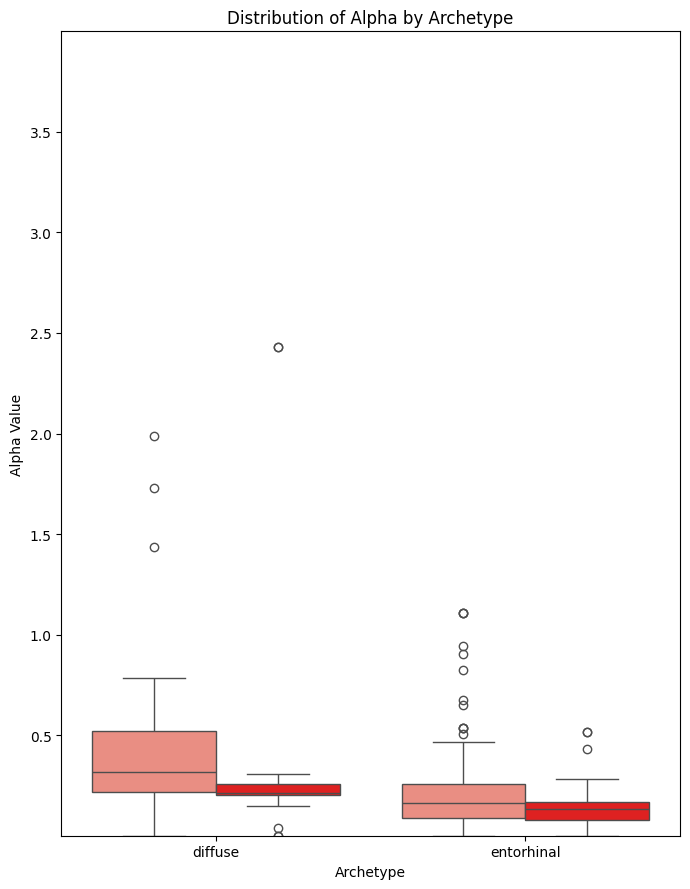

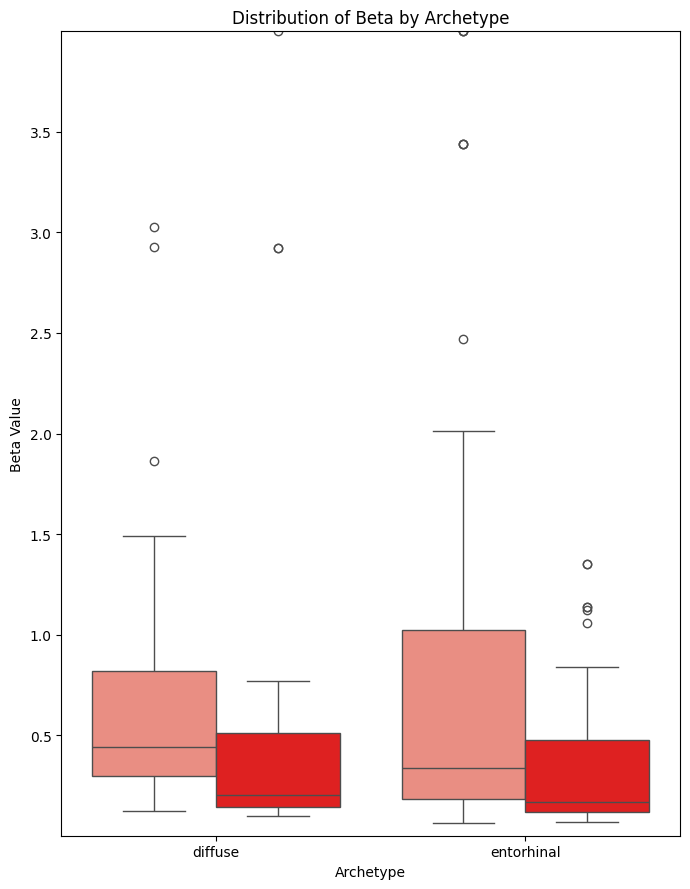


Mann-Whitney U test results:
Alpha: U=5657.00, p=0.0000
Beta: U=4352.00, p=0.2139

Mean ± SD values:

Diffuse:
Alpha: 0.438 ± 0.555
Beta: 0.714 ± 0.896

Entorhinal:
Alpha: 0.201 ± 0.214
Beta: 0.613 ± 0.806


In [182]:
# Get overall min and max for both alpha and beta for consistent y-axis
y_min = min(demographic_correlation_data['alpha'].min(), 
            demographic_correlation_data['beta'].min())
y_max = max(demographic_correlation_data['alpha'].max(), 
            demographic_correlation_data['beta'].max())

# Alpha plot
plt.figure(figsize=(7, 9))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='alpha',
           hue='Diagnosis',
           palette=color_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of Alpha by Archetype')
plt.ylabel('Alpha Value')
plt.xlabel('Archetype')
plt.gca().get_legend().remove()
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

# Beta plot
plt.figure(figsize=(7, 9))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='beta',
           hue='Diagnosis',
           palette=color_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of Beta by Archetype')
plt.ylabel('Beta Value')
plt.xlabel('Archetype')
plt.gca().get_legend().remove()
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

# Perform statistical tests
# For Alpha
groups_alpha = [group['alpha'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_alpha, p_val_alpha = scipy.stats.mannwhitneyu(*groups_alpha)

# For Beta
groups_beta = [group['beta'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_beta, p_val_beta = scipy.stats.mannwhitneyu(*groups_beta)

print("\nMann-Whitney U test results:")
print(f"Alpha: U={stat_alpha:.2f}, p={p_val_alpha:.4f}")
print(f"Beta: U={stat_beta:.2f}, p={p_val_beta:.4f}")

# Print mean and std values for each archetype
print("\nMean ± SD values:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"Alpha: {arch_data['alpha'].mean():.3f} ± {arch_data['alpha'].std():.3f}")
    print(f"Beta: {arch_data['beta'].mean():.3f} ± {arch_data['beta'].std():.3f}")

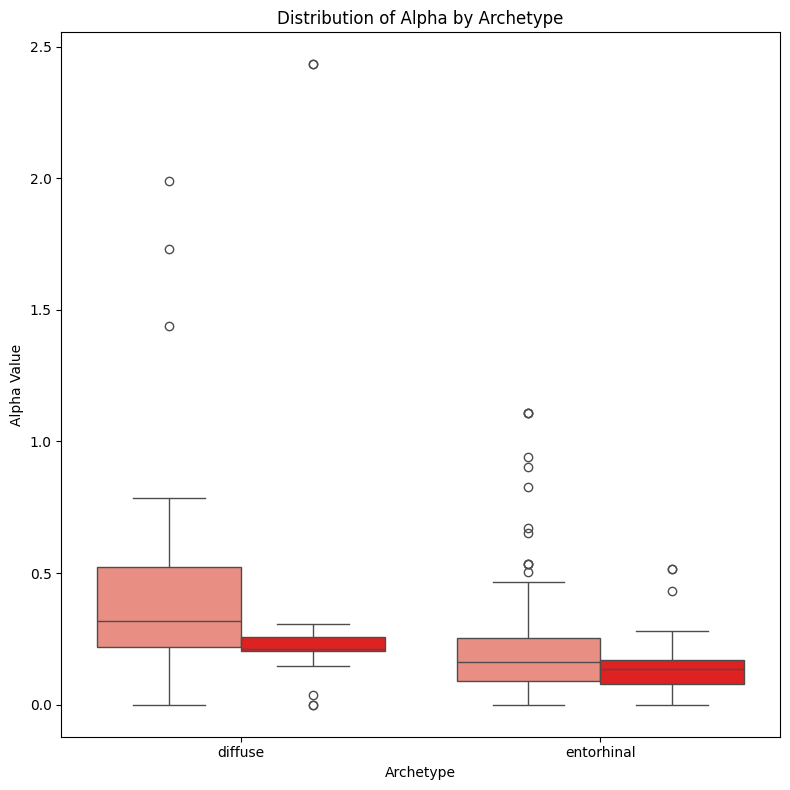

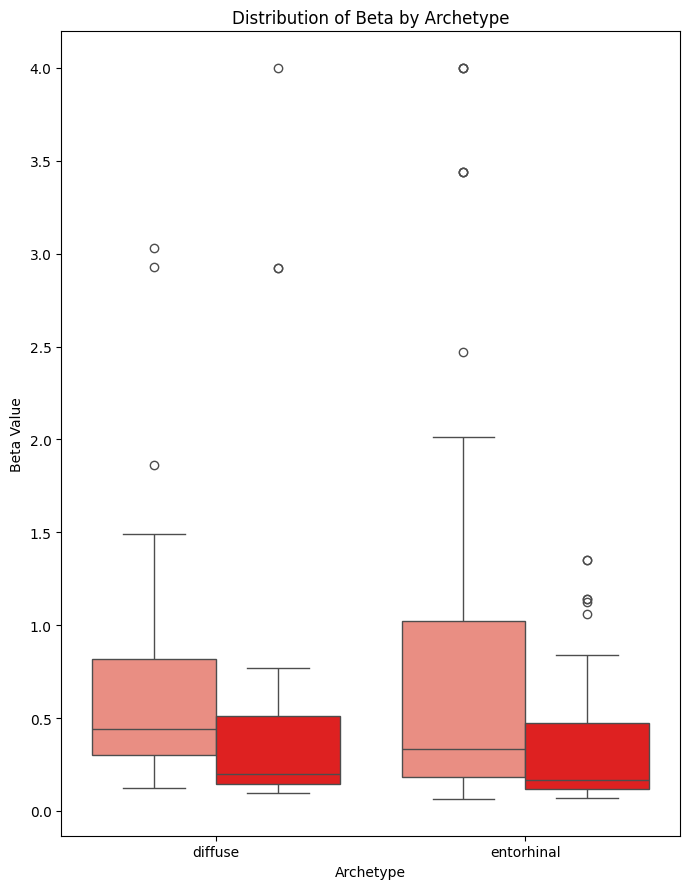


Mann-Whitney U test results:
Alpha: U=5657.00, p=0.0000
Beta: U=4352.00, p=0.2139

Mean ± SD values:

Diffuse:
Alpha: 0.438 ± 0.555
Beta: 0.714 ± 0.896

Entorhinal:
Alpha: 0.201 ± 0.214
Beta: 0.613 ± 0.806

One-way ANOVA test results:
Alpha: F=19.26, p=0.0000
Beta: F=0.57, p=0.4501


In [238]:
# Alpha plot
plt.figure(figsize=(8, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='alpha',
           hue='Diagnosis',
           palette=color_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of Alpha by Archetype')
plt.ylabel('Alpha Value')
plt.xlabel('Archetype')
plt.gca().get_legend().remove()
# Set y-axis limits based on alpha data only
y_min_alpha = demographic_correlation_data['alpha'].min()
y_max_alpha = demographic_correlation_data['alpha'].max()
plt.ylim(y_min_alpha - 0.05*(y_max_alpha - y_min_alpha), 
         y_max_alpha + 0.05*(y_max_alpha - y_min_alpha))  # Add 5% padding
plt.tight_layout()
plt.show()

# Beta plot
plt.figure(figsize=(7, 9))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='beta',
           hue='Diagnosis',
           palette=color_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of Beta by Archetype')
plt.ylabel('Beta Value')
plt.xlabel('Archetype')
plt.gca().get_legend().remove()
# Set y-axis limits based on beta data only
y_min_beta = demographic_correlation_data['beta'].min()
y_max_beta = demographic_correlation_data['beta'].max()
plt.ylim(y_min_beta - 0.05*(y_max_beta - y_min_beta), 
         y_max_beta + 0.05*(y_max_beta - y_min_beta))  # Add 5% padding
plt.tight_layout()
plt.show()

# Perform statistical tests
# For Alpha
groups_alpha = [group['alpha'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_alpha, p_val_alpha = scipy.stats.mannwhitneyu(*groups_alpha)

# For Beta
groups_beta = [group['beta'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_beta, p_val_beta = scipy.stats.mannwhitneyu(*groups_beta)

print("\nMann-Whitney U test results:")
print(f"Alpha: U={stat_alpha:.2f}, p={p_val_alpha:.4f}")
print(f"Beta: U={stat_beta:.2f}, p={p_val_beta:.4f}")

# Print mean and std values for each archetype
print("\nMean ± SD values:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"Alpha: {arch_data['alpha'].mean():.3f} ± {arch_data['alpha'].std():.3f}")
    print(f"Beta: {arch_data['beta'].mean():.3f} ± {arch_data['beta'].std():.3f}")

# Perform one-way ANOVA tests
# For Alpha
f_stat_alpha, p_val_anova_alpha = scipy.stats.f_oneway(*groups_alpha)

# For Beta  
f_stat_beta, p_val_anova_beta = scipy.stats.f_oneway(*groups_beta)

print("\nOne-way ANOVA test results:")
print(f"Alpha: F={f_stat_alpha:.2f}, p={p_val_anova_alpha:.4f}")
print(f"Beta: F={f_stat_beta:.2f}, p={p_val_anova_beta:.4f}")


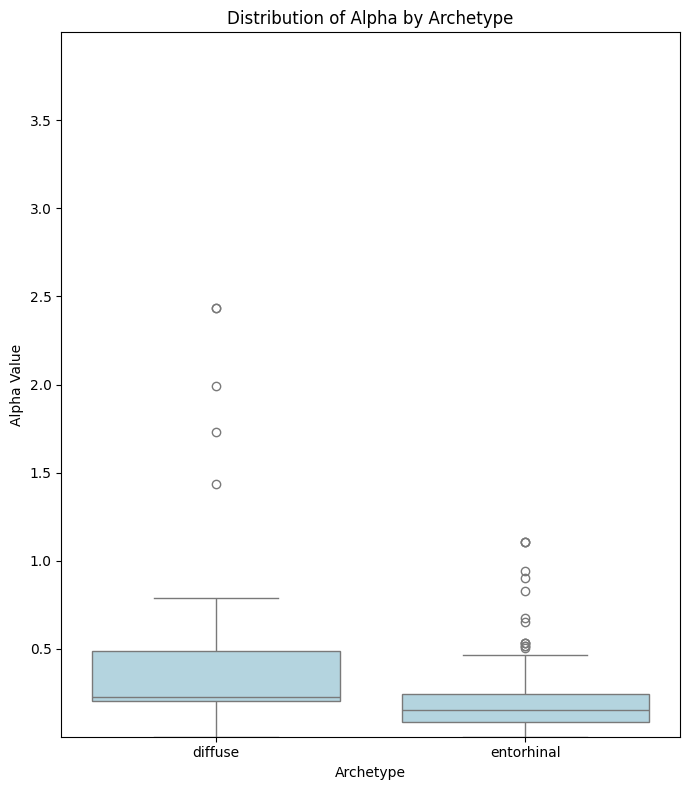

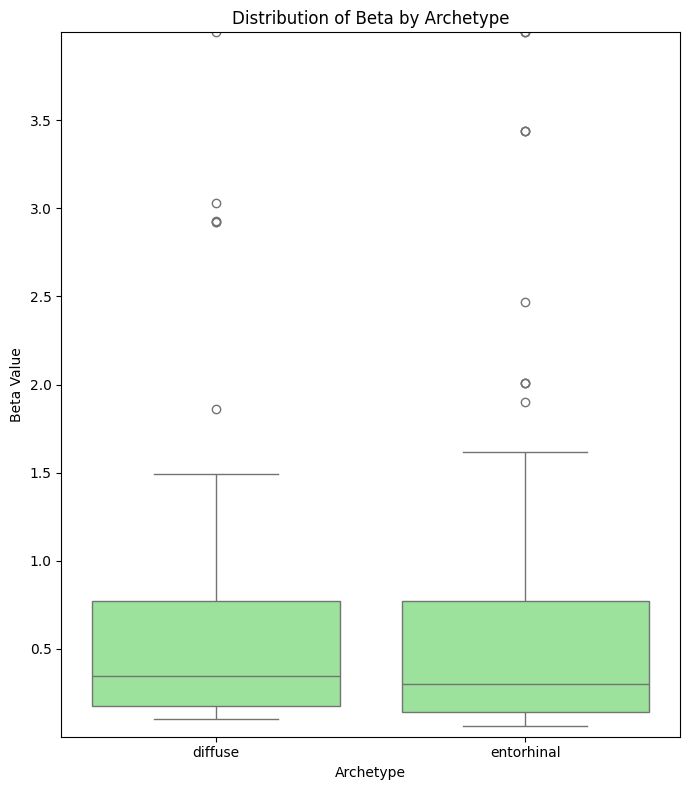


Mann-Whitney U test results:
Alpha: U=5657.00, p=0.0000
Beta: U=4352.00, p=0.2139

Mean ± SD values:

Diffuse:
Alpha: 0.438 ± 0.555
Beta: 0.714 ± 0.896

Entorhinal:
Alpha: 0.201 ± 0.214
Beta: 0.613 ± 0.806


In [185]:
# Get overall min and max for both alpha and beta for consistent y-axis
y_min = min(demographic_correlation_data['alpha'].min(), 
            demographic_correlation_data['beta'].min())
y_max = max(demographic_correlation_data['alpha'].max(), 
            demographic_correlation_data['beta'].max())

# Alpha plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='alpha',
           color='lightblue',
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of Alpha by Archetype')
plt.ylabel('Alpha Value')
plt.xlabel('Archetype')
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

# Beta plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='beta',
           color='lightgreen',
           order=['diffuse', 'entorhinal'])
plt.title('Distribution of Beta by Archetype')
plt.ylabel('Beta Value')
plt.xlabel('Archetype')
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

# Perform statistical tests
# For Alpha
groups_alpha = [group['alpha'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_alpha, p_val_alpha = scipy.stats.mannwhitneyu(*groups_alpha)

# For Beta
groups_beta = [group['beta'].values for name, group in demographic_correlation_data.groupby('archetype_assignment')]
stat_beta, p_val_beta = scipy.stats.mannwhitneyu(*groups_beta)

print("\nMann-Whitney U test results:")
print(f"Alpha: U={stat_alpha:.2f}, p={p_val_alpha:.4f}")
print(f"Beta: U={stat_beta:.2f}, p={p_val_beta:.4f}")

# Print mean and std values for each archetype
print("\nMean ± SD values:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"Alpha: {arch_data['alpha'].mean():.3f} ± {arch_data['alpha'].std():.3f}")
    print(f"Beta: {arch_data['beta'].mean():.3f} ± {arch_data['beta'].std():.3f}")

Text(0.5, 1.02, 'Demographic Correlations with Archetype Assignments (Dementia Only)')

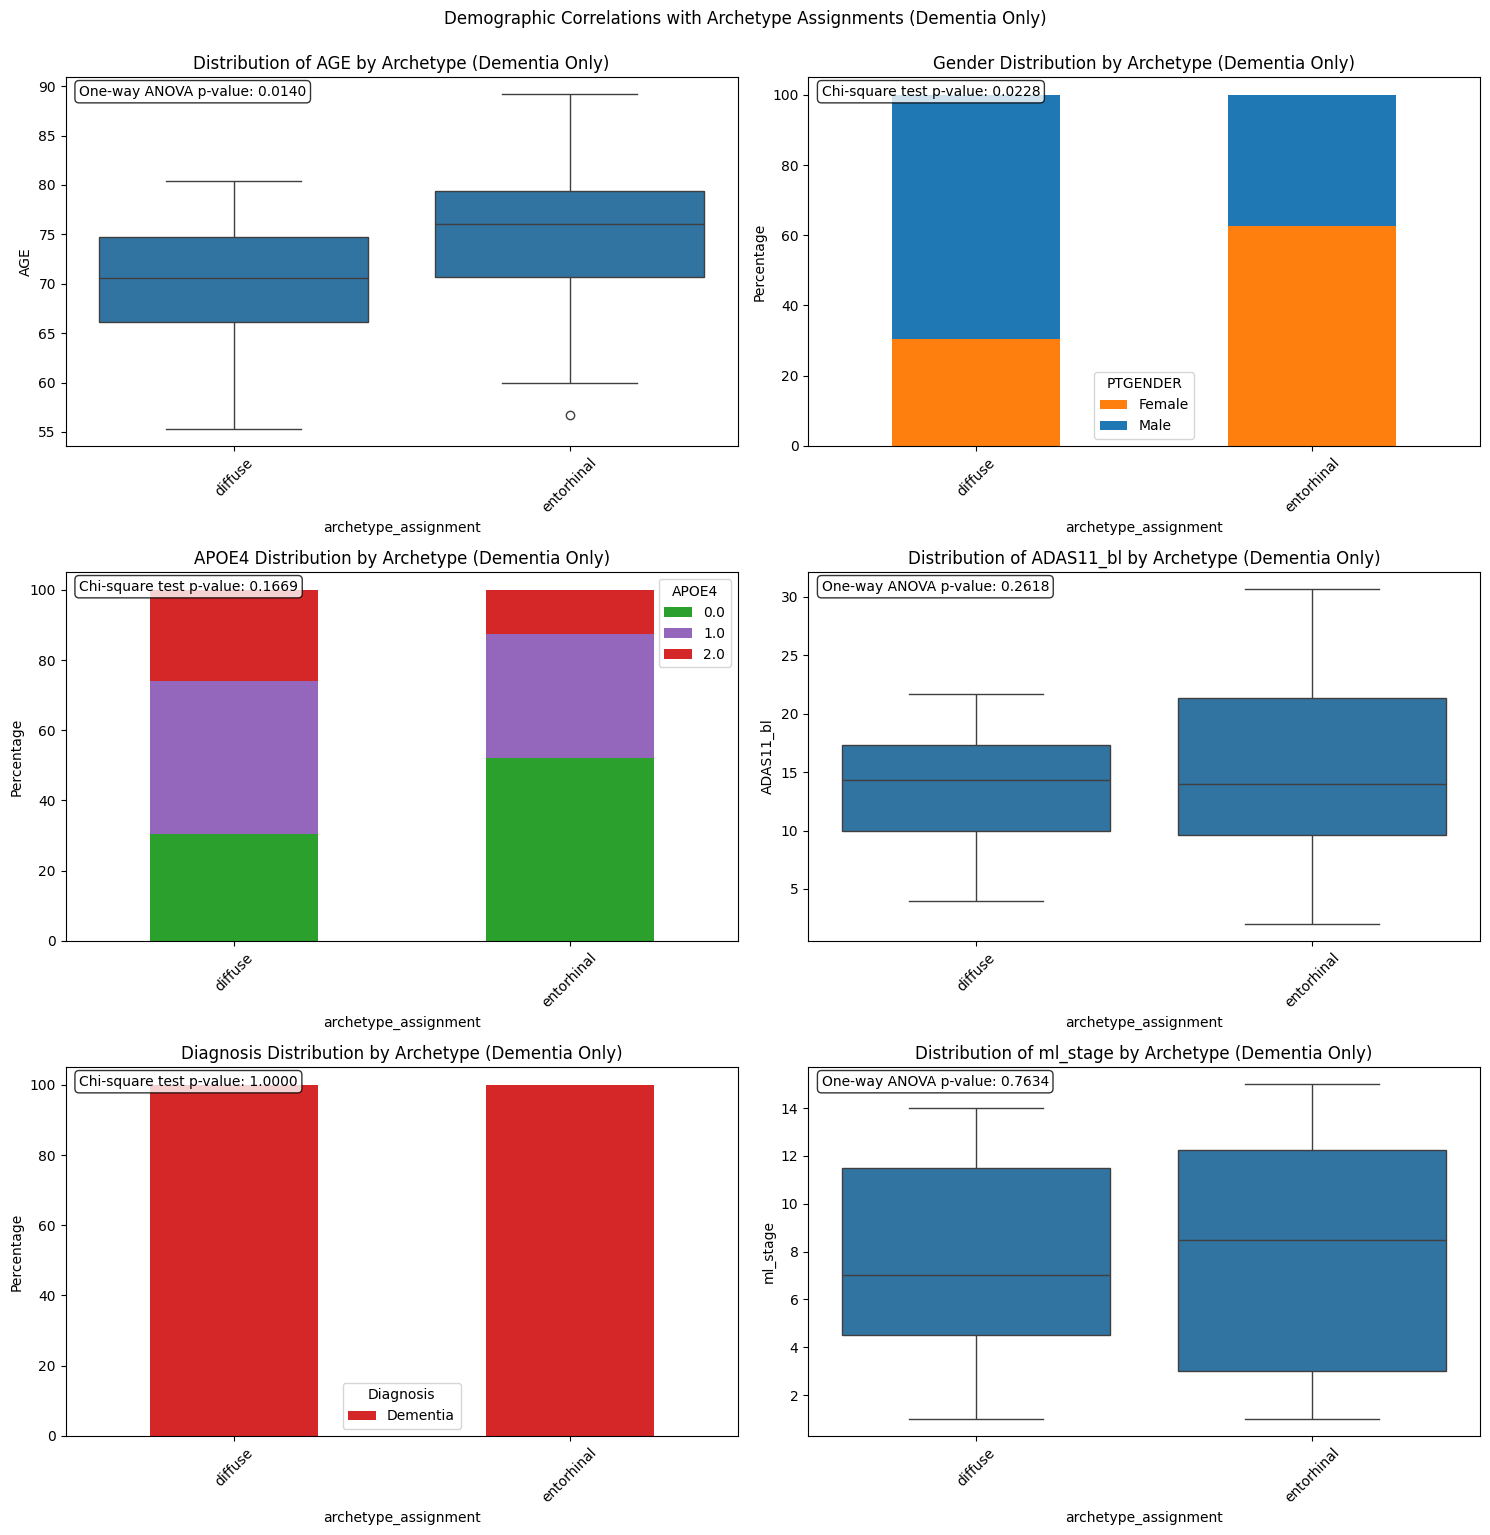

In [135]:
# Filter for only dementia subjects
dementia_data = demographic_correlation_data[demographic_correlation_data['Diagnosis'] == 'Dementia'].copy()

# Define consistent color palettes
gender_colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # Blue and Orange
apoe_colors = {0: '#2ca02c', 1: '#9467bd', 2: '#d62728'}  # Green, Purple, Red
diagnosis_colors = {'CN': '#7FBFE9', 'MCI': '#E07A7A', 'Dementia': '#D62728'}  # Light Blue, Light Red, Dark Red

# Create figure for correlation plots
plt.figure(figsize=(15, 15))

# Create subplots for each demographic variable
variables = ['AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl', 'Diagnosis', 'ml_stage']
for i, var in enumerate(variables, 1):
    ax = plt.subplot(3, 2, i)
    
    # Calculate statistics first
    if var in ['PTGENDER', 'APOE4', 'Diagnosis']:
        # Create contingency table with specific order
        contingency = pandas.crosstab(dementia_data['archetype_assignment'], 
                                    dementia_data[var])
        # Reorder the contingency table with correct case
        contingency = contingency.loc[['diffuse', 'entorhinal']]
        chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
        stat_text = f'Chi-square test p-value: {p_value:.4f}'
        
        # Calculate percentages for stacked bars
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    else:
        groups = [group for _, group in dementia_data.groupby('archetype_assignment')[var]]
        f_stat, p_value = scipy.stats.f_oneway(*groups)
        stat_text = f'One-way ANOVA p-value: {p_value:.4f}'
    
    # Create plots with consistent colors
    if var == 'AGE':
        sns.boxplot(data=dementia_data, x='archetype_assignment', y=var, 
                   order=['diffuse', 'entorhinal'])  # Removed hue since we're only looking at Dementia
        plt.title(f'Distribution of {var} by Archetype (Dementia Only)')
    elif var == 'PTGENDER':
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, color=[gender_colors[col] for col in contingency_pct.columns])
        plt.title('Gender Distribution by Archetype (Dementia Only)')
        plt.ylabel('Percentage')
    elif var == 'APOE4':
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, color=[apoe_colors[col] for col in contingency_pct.columns])
        plt.title('APOE4 Distribution by Archetype (Dementia Only)')
        plt.ylabel('Percentage')
    elif var == 'Diagnosis':
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, color=[diagnosis_colors[col] for col in contingency_pct.columns])
        plt.title('Diagnosis Distribution by Archetype (Dementia Only)')
        plt.ylabel('Percentage')
    else:
        sns.boxplot(data=dementia_data, x='archetype_assignment', y=var,
                   order=['diffuse', 'entorhinal'])
        plt.title(f'Distribution of {var} by Archetype (Dementia Only)')
    
    # Add statistical test results to plot
    plt.text(0.02, 0.98, stat_text,
             transform=ax.transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.suptitle('Demographic Correlations with Archetype Assignments (Dementia Only)', y=1.02)

Text(0.5, 1.02, 'Demographic Correlations with Archetype Assignments')

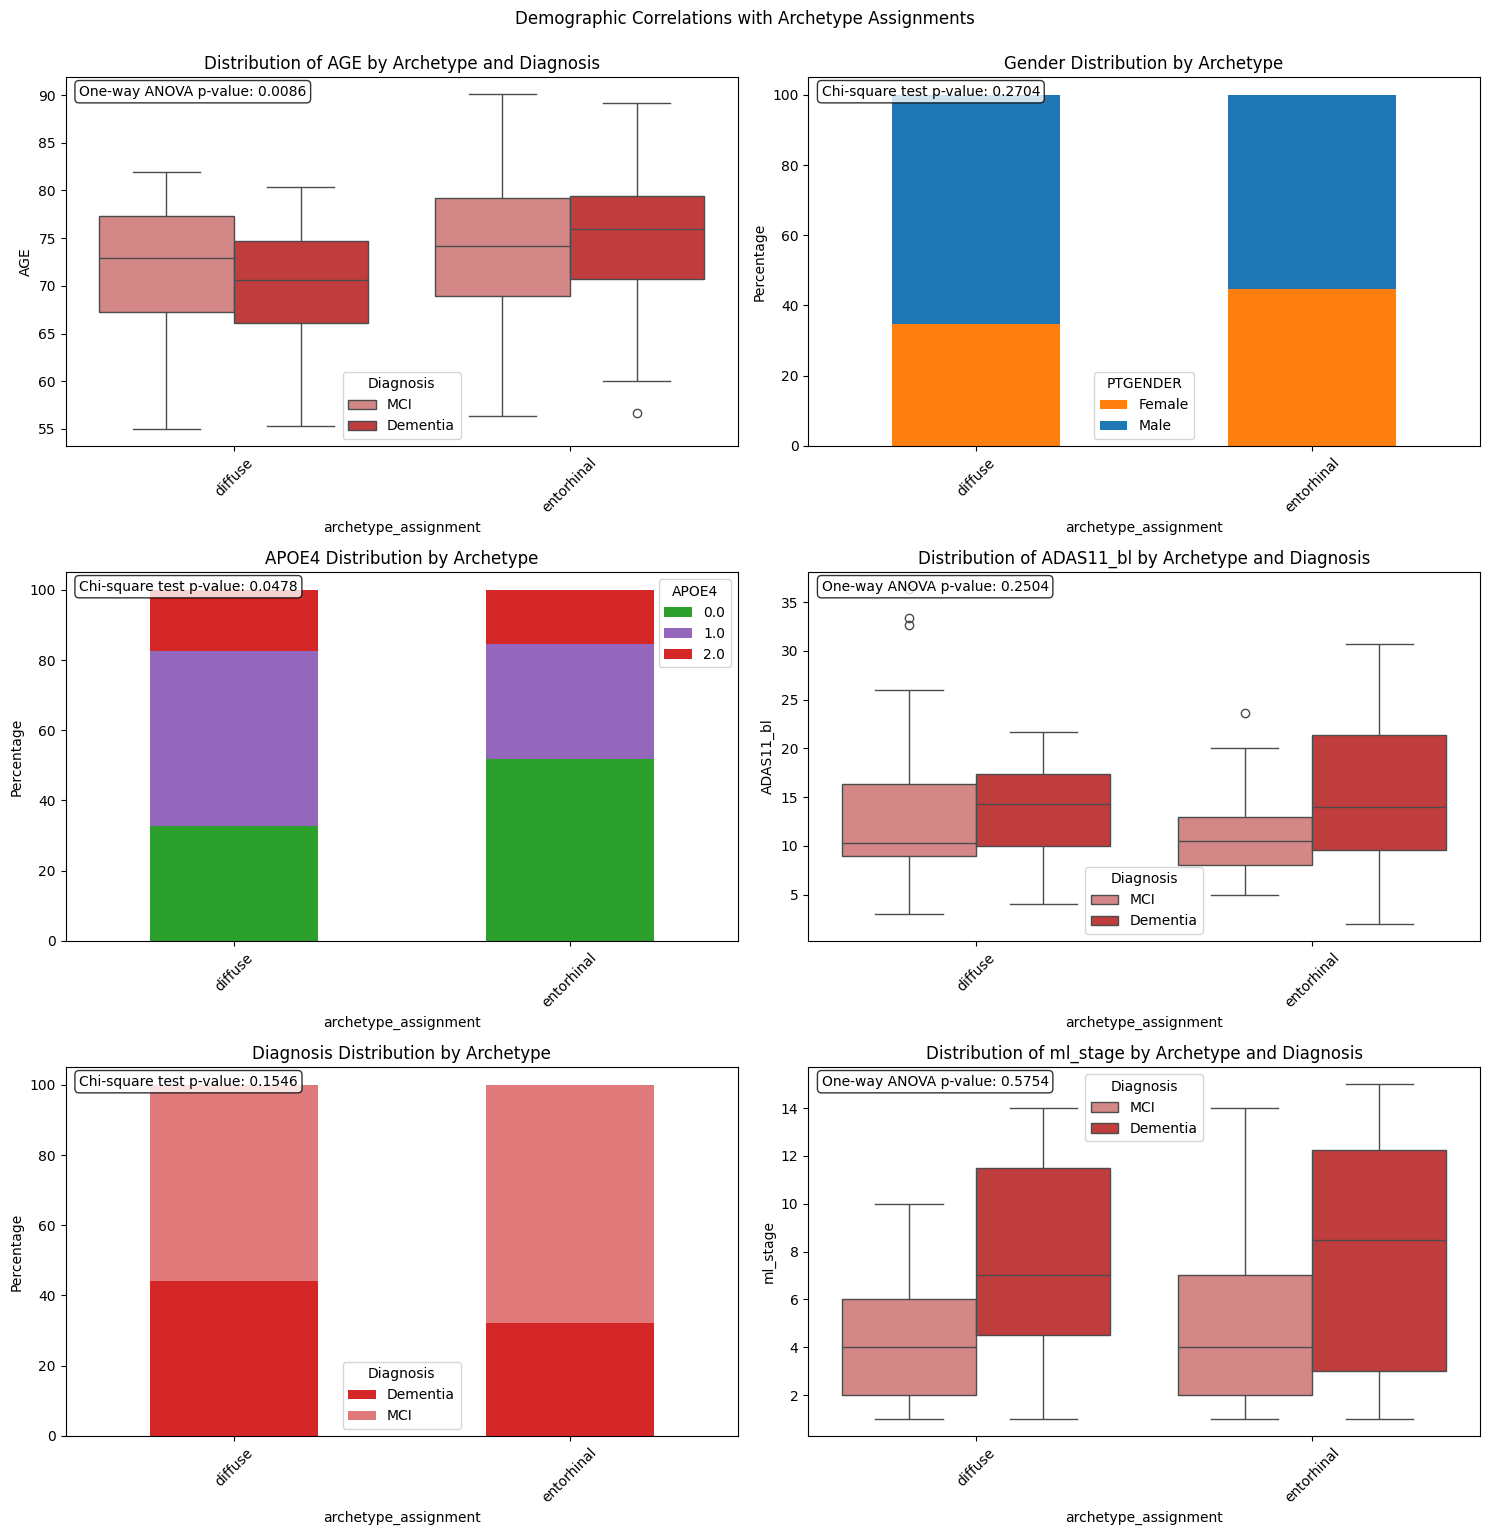

In [137]:
# Define consistent color palettes
gender_colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # Blue and Orange
apoe_colors = {0: '#2ca02c', 1: '#9467bd', 2: '#d62728'}  # Green, Purple, Red
diagnosis_colors = {'CN': '#7FBFE9', 'MCI': '#E07A7A', 'Dementia': '#D62728'}  # Light Blue, Light Red, Dark Red

# Create figure for correlation plots
plt.figure(figsize=(15, 15))

# Create subplots for each demographic variable
variables = ['AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl', 'Diagnosis', 'ml_stage']
for i, var in enumerate(variables, 1):
    ax = plt.subplot(3, 2, i)
    
    # Calculate statistics first
    if var in ['PTGENDER', 'APOE4', 'Diagnosis']:
        # Create contingency table with specific order
        contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                                    demographic_correlation_data[var])
        # Reorder the contingency table with correct case
        contingency = contingency.loc[['diffuse', 'entorhinal']]
        chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
        stat_text = f'Chi-square test p-value: {p_value:.4f}'
        
        # Calculate percentages for stacked bars
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    else:
        # One-way ANOVA between archetypes
        groups = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')[var]]
        f_stat, p_value = scipy.stats.f_oneway(*groups)
        stat_text = f'One-way ANOVA p-value: {p_value:.4f}'
    
    # Create plots with consistent colors
    if var in ['AGE', 'ADAS11_bl', 'ml_stage']:
        sns.boxplot(data=demographic_correlation_data, x='archetype_assignment', y=var, 
                   hue='Diagnosis', palette=diagnosis_colors, 
                   order=['diffuse', 'entorhinal'])
        plt.title(f'Distribution of {var} by Archetype and Diagnosis')
    elif var == 'PTGENDER':
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, color=[gender_colors[col] for col in contingency_pct.columns])
        plt.title('Gender Distribution by Archetype')
        plt.ylabel('Percentage')
    elif var == 'APOE4':
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, color=[apoe_colors[col] for col in contingency_pct.columns])
        plt.title('APOE4 Distribution by Archetype')
        plt.ylabel('Percentage')
    elif var == 'Diagnosis':
        contingency_pct.plot(kind='bar', stacked=True, ax=ax, color=[diagnosis_colors[col] for col in contingency_pct.columns])
        plt.title('Diagnosis Distribution by Archetype')
        plt.ylabel('Percentage')
    
    # Add statistical test results to plot
    plt.text(0.02, 0.98, stat_text,
             transform=ax.transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.suptitle('Demographic Correlations with Archetype Assignments', y=1.02)


AGE One-way ANOVA p-value: 0.0086


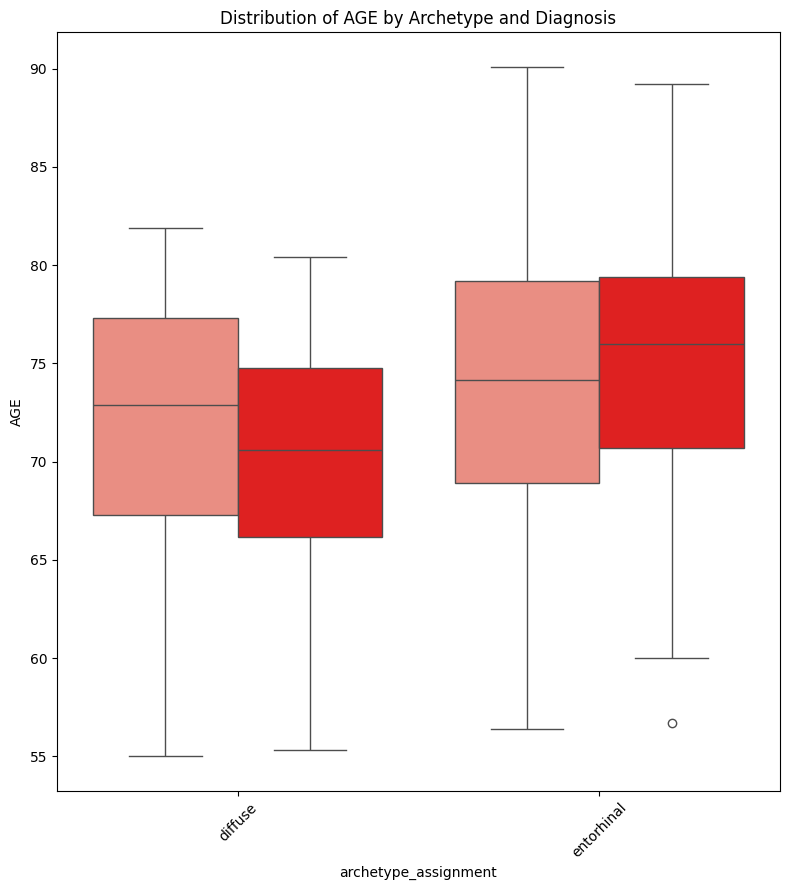


PTGENDER Chi-square test p-value: 0.2704


<Figure size 800x900 with 0 Axes>

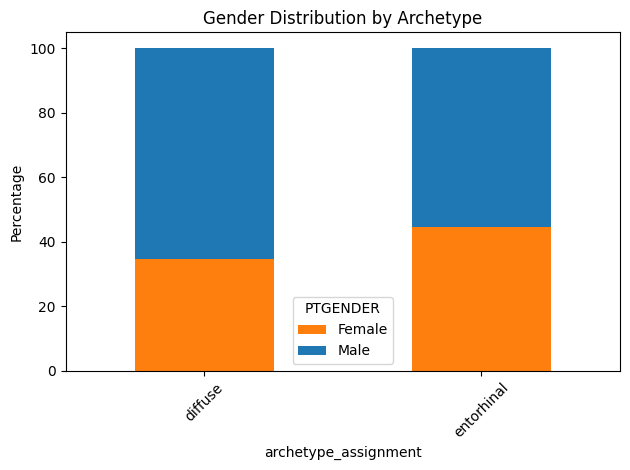


APOE4 Chi-square test p-value: 0.0478


<Figure size 800x900 with 0 Axes>

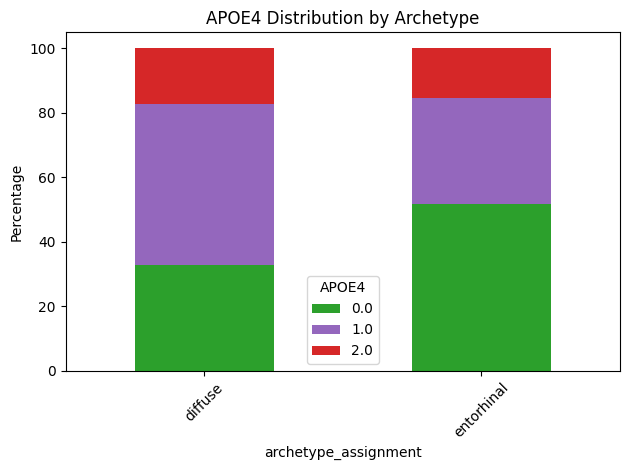


ADAS11_bl One-way ANOVA p-value: 0.2504


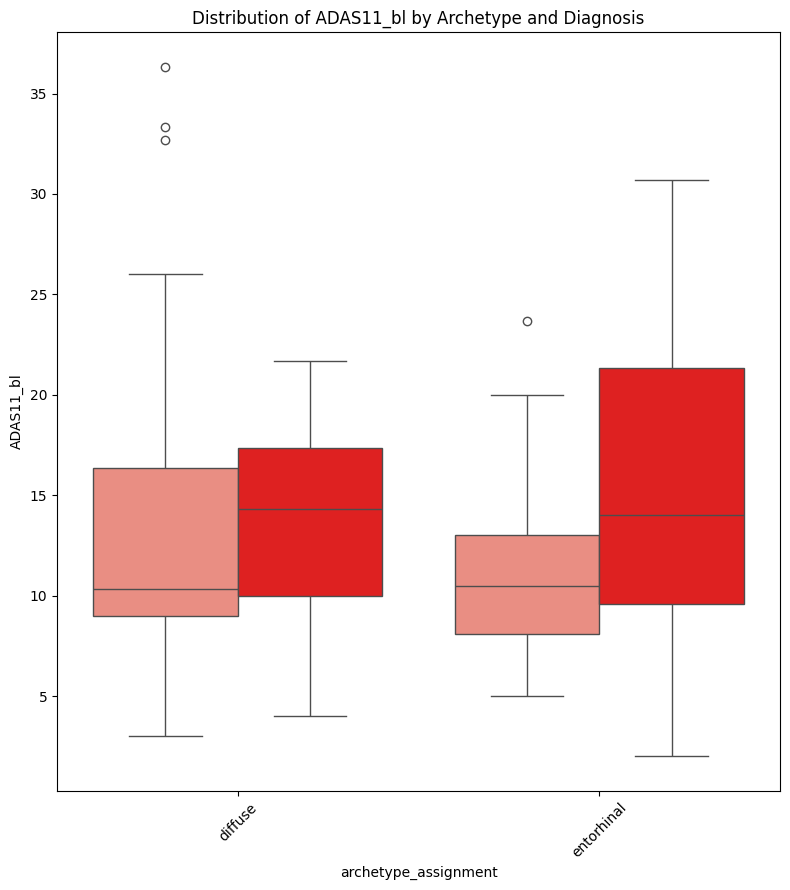


Diagnosis Chi-square test p-value: 0.1546


<Figure size 800x900 with 0 Axes>

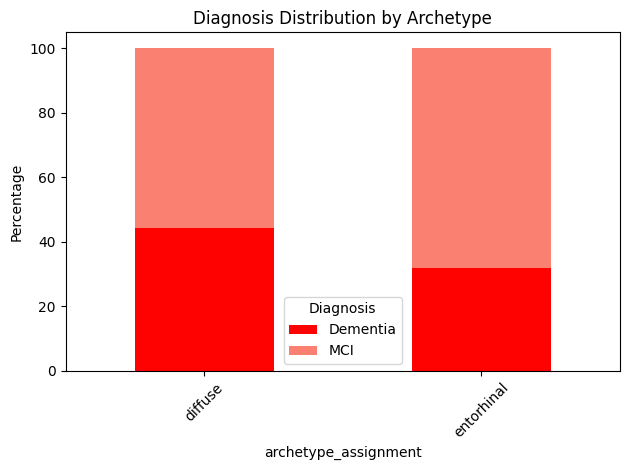


ml_stage One-way ANOVA p-value: 0.5754


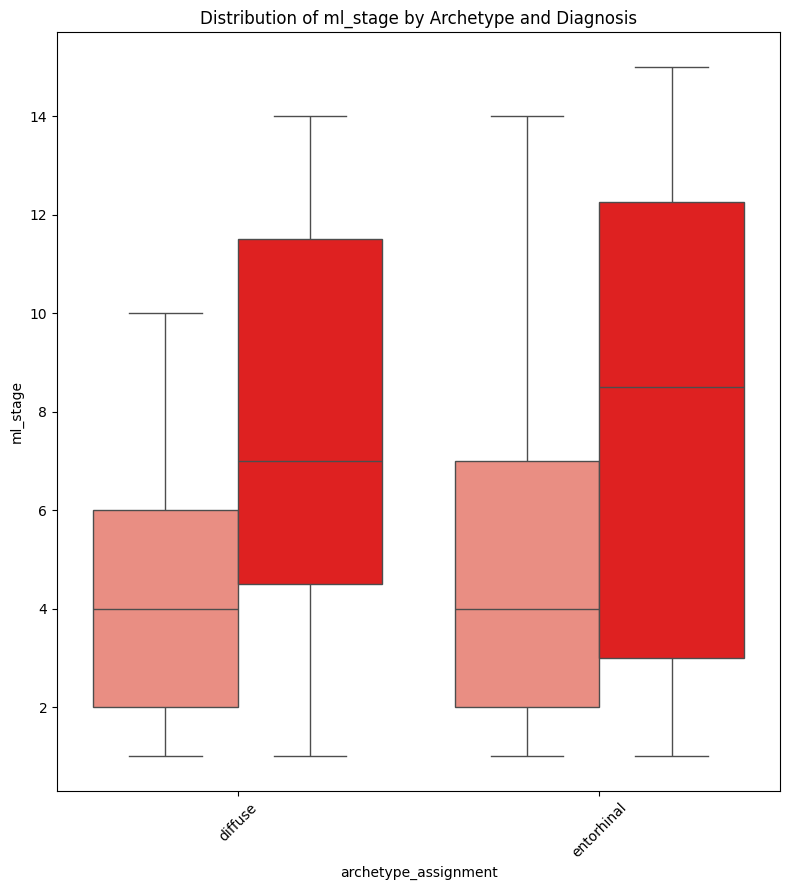


Diagnosis Distribution by Archetype (%):
Diagnosis             Dementia   MCI
archetype_assignment                
diffuse                   44.2  55.8
entorhinal                32.0  68.0

Diagnosis Distribution by Archetype (counts):
Diagnosis             Dementia  MCI
archetype_assignment               
diffuse                     23   29
entorhinal                  48  102


In [18]:
# Define consistent color palettes
gender_colors = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # Blue and Orange
apoe_colors = {0: '#2ca02c', 1: '#9467bd', 2: '#d62728'}  # Green, Purple, Red
diagnosis_colors = {'CN': '#7FBFE9', 'MCI': '#E07A7A', 'Dementia': '#D62728'}  # Light Blue, Light Red, Dark Red

# Create plots for each demographic variable
variables = ['AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl', 'Diagnosis', 'ml_stage']
for var in variables:
    # Create new figure for each variable
    plt.figure(figsize=(8, 9))
    
    # Calculate statistics first (for printing only)
    if var in ['PTGENDER', 'APOE4', 'Diagnosis']:
        contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                                    demographic_correlation_data[var])
        contingency = contingency.loc[['diffuse', 'entorhinal']]
        chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
        print(f'\n{var} Chi-square test p-value: {p_value:.4f}')
        
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    else:
        groups = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')[var]]
        f_stat, p_value = scipy.stats.f_oneway(*groups)
        print(f'\n{var} One-way ANOVA p-value: {p_value:.4f}')
    
    # Create plots with consistent colors
    if var in ['AGE', 'ADAS11_bl', 'ml_stage']:
        sns.boxplot(data=demographic_correlation_data, x='archetype_assignment', y=var, 
                   hue='Diagnosis', palette=color_palette, 
                   order=['diffuse', 'entorhinal'])
        plt.title(f'Distribution of {var} by Archetype and Diagnosis')
        # Remove legend
        plt.gca().get_legend().remove()
    elif var == 'PTGENDER':
        contingency_pct.plot(kind='bar', stacked=True, color=[gender_colors[col] for col in contingency_pct.columns])
        plt.title('Gender Distribution by Archetype')
        plt.ylabel('Percentage')
    elif var == 'APOE4':
        contingency_pct.plot(kind='bar', stacked=True, color=[apoe_colors[col] for col in contingency_pct.columns])
        plt.title('APOE4 Distribution by Archetype')
        plt.ylabel('Percentage')
    elif var == 'Diagnosis':
        contingency_pct.plot(kind='bar', stacked=True, color=[color_palette[col] for col in contingency_pct.columns])
        plt.title('Diagnosis Distribution by Archetype')
        plt.ylabel('Percentage')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # Display each plot individually

# Print percentages for diagnosis distribution
diagnosis_contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                                      demographic_correlation_data['Diagnosis'])
diagnosis_contingency = diagnosis_contingency.loc[['diffuse', 'entorhinal']]
diagnosis_pct = diagnosis_contingency.div(diagnosis_contingency.sum(axis=1), axis=0) * 100

print("\nDiagnosis Distribution by Archetype (%):")
print(diagnosis_pct.round(1))
print("\nDiagnosis Distribution by Archetype (counts):")
print(diagnosis_contingency)


PTGENDER Chi-square test p-value: 0.2704

Percentage distribution:
PTGENDER              Female  Male
archetype_assignment              
diffuse                 34.6  65.4
entorhinal              44.7  55.3

Counts:
PTGENDER              Female  Male
archetype_assignment              
diffuse                   18    34
entorhinal                67    83


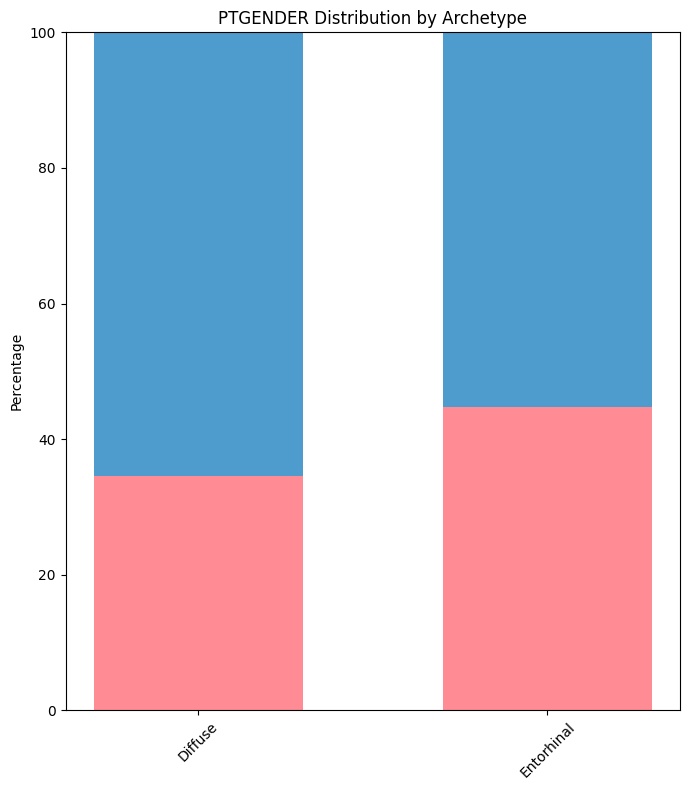


APOE4 Chi-square test p-value: 0.0478

Percentage distribution:
APOE4                  0.0   1.0   2.0
archetype_assignment                  
diffuse               32.7  50.0  17.3
entorhinal            51.7  32.9  15.4

Counts:
APOE4                 0.0  1.0  2.0
archetype_assignment               
diffuse                17   26    9
entorhinal             77   49   23


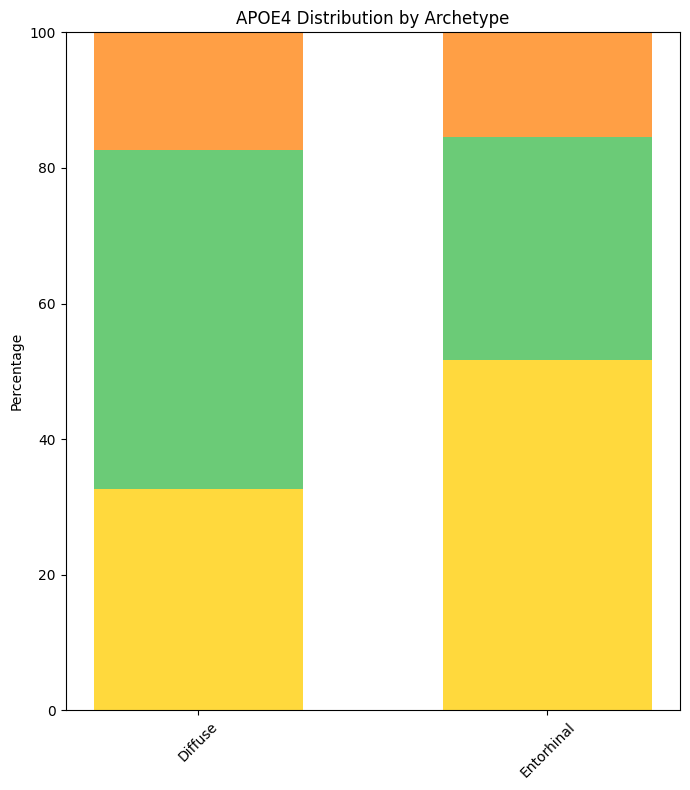


Diagnosis Chi-square test p-value: 0.1546

Percentage distribution:
Diagnosis             Dementia   MCI
archetype_assignment                
diffuse                   44.2  55.8
entorhinal                32.0  68.0

Counts:
Diagnosis             Dementia  MCI
archetype_assignment               
diffuse                     23   29
entorhinal                  48  102


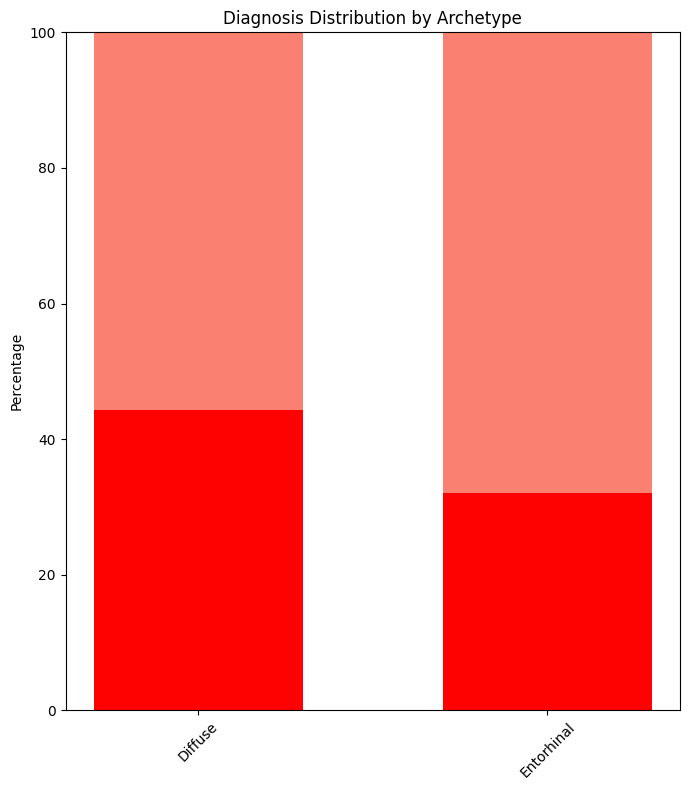

In [231]:
# Cell 1: Categorical variables with histograms
FIGURE_SIZE = (7, 8)

# Define consistent color palettes
gender_colors = {'Male': '#4E9BCD', 'Female': '#FF8B94'}  # Blue and Pink
apoe_colors = {0: '#FFD93D', 1: '#6BCB77', 2: '#FF9F45'}  # Yellow, Green, Orange

# Create histogram plots for categorical variables
categorical_vars = ['PTGENDER', 'APOE4', 'Diagnosis']
for var in categorical_vars:
    # Calculate statistics
    contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                                demographic_correlation_data[var])
    contingency = contingency.loc[['diffuse', 'entorhinal']]
    chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
    print(f'\n{var} Chi-square test p-value: {p_value:.4f}')
    
    # Calculate and print percentages
    contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    print("\nPercentage distribution:")
    print(contingency_pct.round(1))
    print("\nCounts:")
    print(contingency)
    
    # Create figure first
    plt.figure(figsize=FIGURE_SIZE)
    
    # Plot bars for each category
    bottom = numpy.zeros(2)  # for 'diffuse' and 'entorhinal'
    x = numpy.arange(2)
    
    for col in contingency_pct.columns:
        if var == 'PTGENDER':
            color = gender_colors[col]
        elif var == 'APOE4':
            color = apoe_colors[int(col)]  # Convert col to int for APOE4
        else:  # Diagnosis
            color = color_palette[col]
            
        plt.bar(x, contingency_pct[col], bottom=bottom, 
               label=col, color=color, width=0.6)
        bottom += contingency_pct[col]
    
    plt.xticks(x, ['Diffuse', 'Entorhinal'], rotation=45)
    plt.title(f'{var} Distribution by Archetype')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

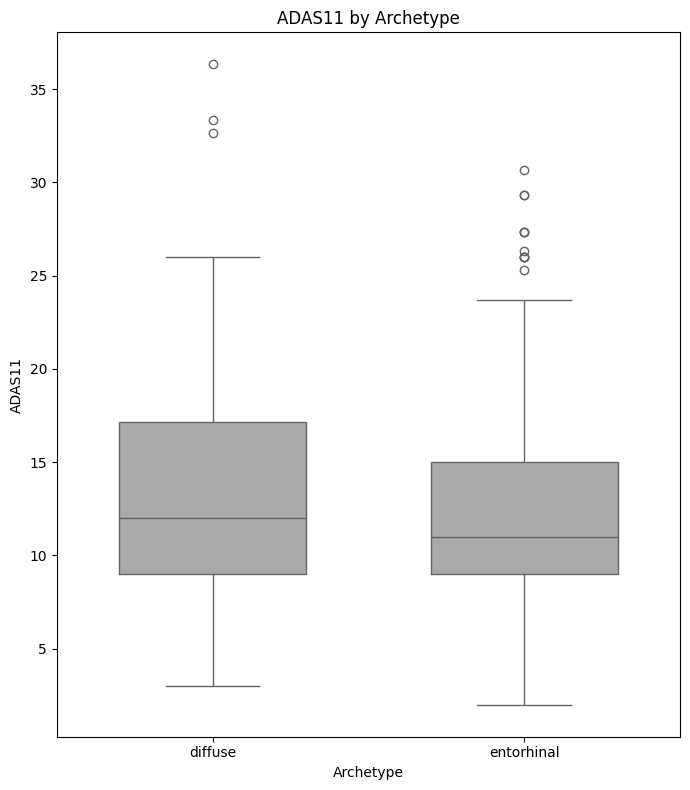

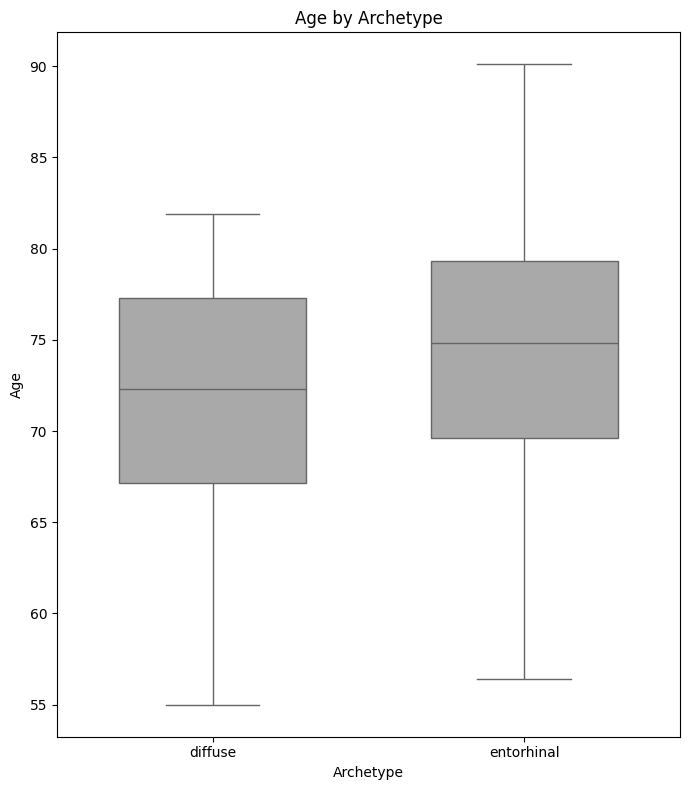

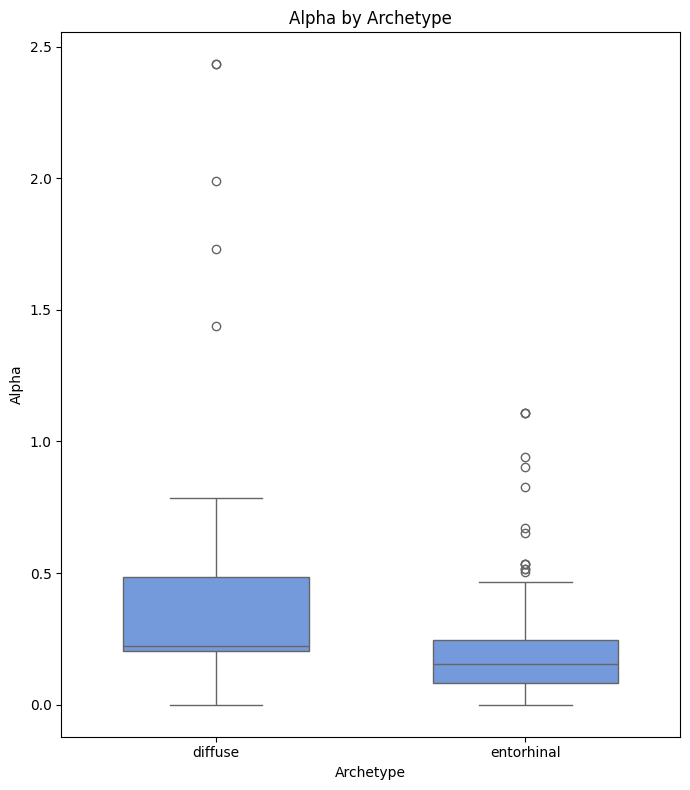

One-way ANOVA test results:

ADAS11:
F = 1.33, p = 0.2504

Age:
F = 7.05, p = 0.0086

Alpha:
F = 19.26, p = 0.0000

Mean ± SD values by archetype:

Diffuse:
ADAS11: 13.679 ± 7.416
Age: 70.640 ± 8.002
Alpha: 0.438 ± 0.555

Entorhinal:
ADAS11: 12.515 ± 5.831
Age: 73.934 ± 7.609
Alpha: 0.201 ± 0.214


In [26]:
# Define colors
neutral_grey = '#A9A9A9'  # Dark grey
light_blue = '#87CEFA'    # Light blue

# ADAS plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='ADAS11_bl',
           width=0.6,
           color=neutral_grey,
           order=['diffuse', 'entorhinal'])
plt.title('ADAS11 by Archetype')
plt.ylabel('ADAS11')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Age plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='AGE',
           width=0.6,
           color=neutral_grey,
           order=['diffuse', 'entorhinal'])
plt.title('Age by Archetype')
plt.ylabel('Age')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Alpha plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='alpha',
           width=0.6,
           color='#6495ED',
           order=['diffuse', 'entorhinal'])
plt.title('Alpha by Archetype')
plt.ylabel('Alpha')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Print statistics
print("One-way ANOVA test results:")

# ADAS stats
groups_adas = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['ADAS11_bl']]
f_stat_adas, p_val_adas = scipy.stats.f_oneway(*groups_adas)
print(f"\nADAS11:")
print(f"F = {f_stat_adas:.2f}, p = {p_val_adas:.4f}")

# Age stats
groups_age = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['AGE']]
f_stat_age, p_val_age = scipy.stats.f_oneway(*groups_age)
print(f"\nAge:")
print(f"F = {f_stat_age:.2f}, p = {p_val_age:.4f}")

# Alpha stats
groups_alpha = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['alpha']]
f_stat_alpha, p_val_alpha = scipy.stats.f_oneway(*groups_alpha)
print(f"\nAlpha:")
print(f"F = {f_stat_alpha:.2f}, p = {p_val_alpha:.4f}")

# Print mean and std values
print("\nMean ± SD values by archetype:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"ADAS11: {arch_data['ADAS11_bl'].mean():.3f} ± {arch_data['ADAS11_bl'].std():.3f}")
    print(f"Age: {arch_data['AGE'].mean():.3f} ± {arch_data['AGE'].std():.3f}")
    print(f"Alpha: {arch_data['alpha'].mean():.3f} ± {arch_data['alpha'].std():.3f}")


AGE One-way ANOVA p-value: 0.0086


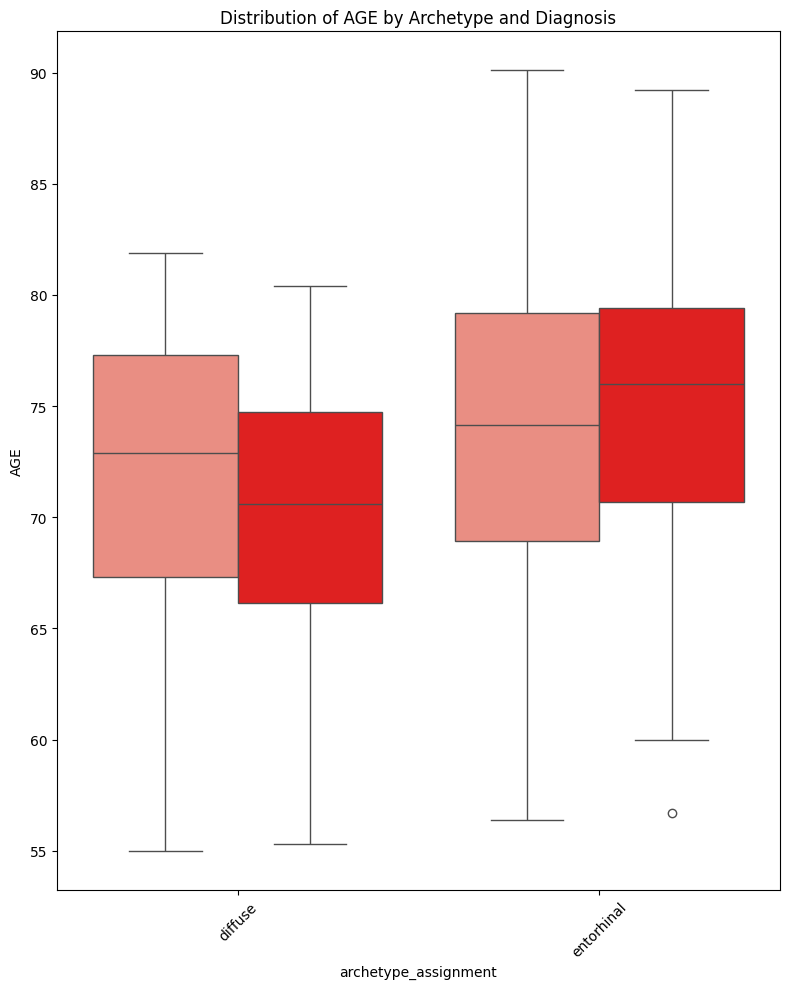


PTGENDER Chi-square test p-value: 0.2704


<Figure size 800x1000 with 0 Axes>

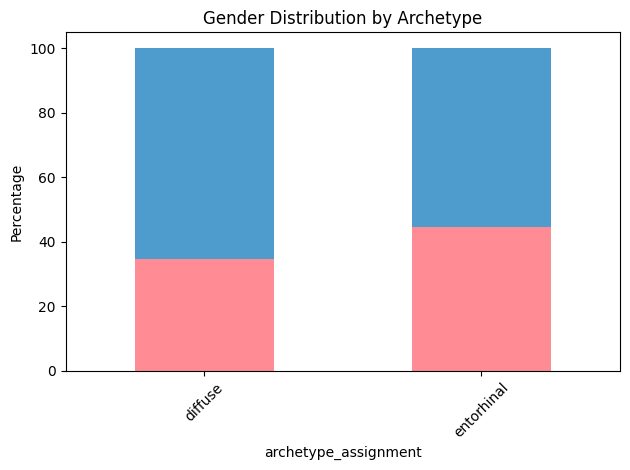


APOE4 Chi-square test p-value: 0.0478


<Figure size 800x1000 with 0 Axes>

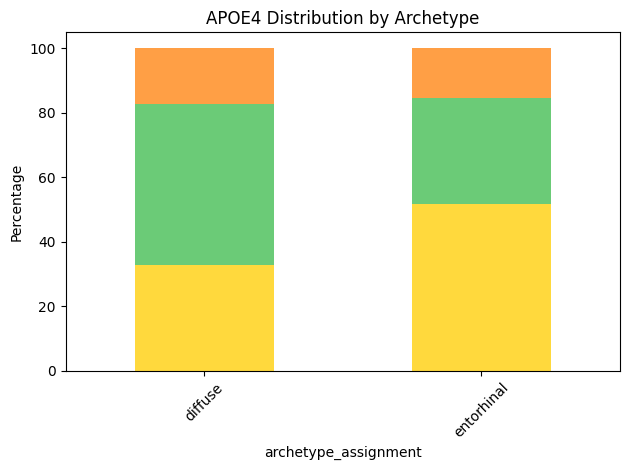


ADAS11_bl One-way ANOVA p-value: 0.2504


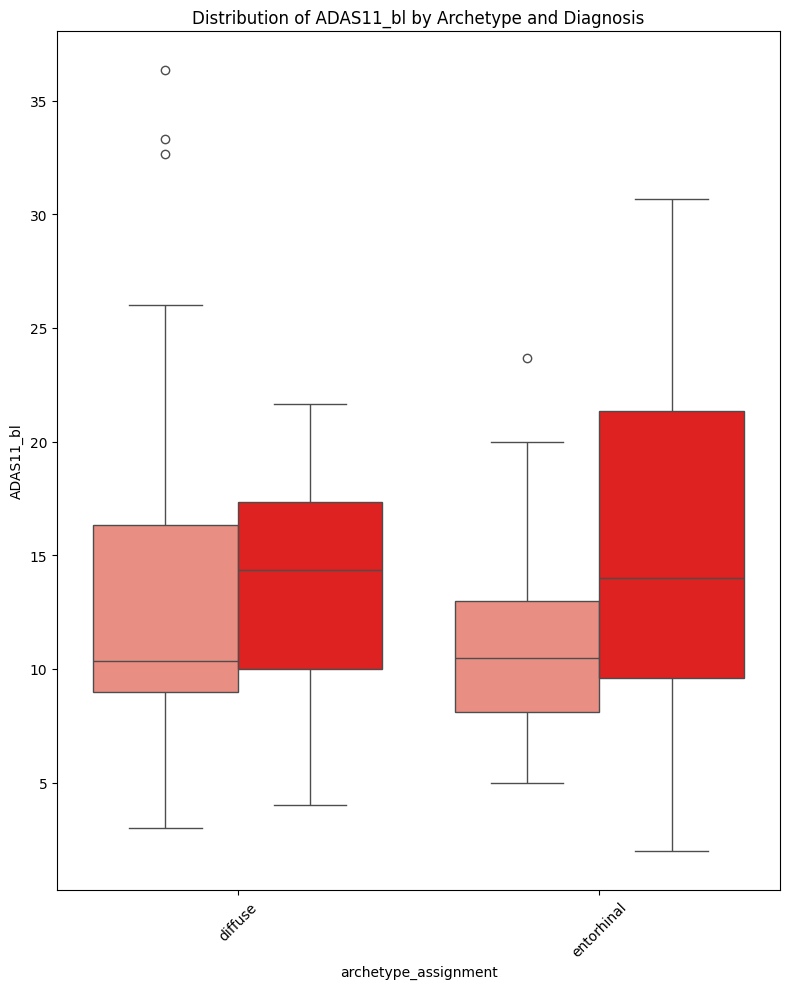


Diagnosis Chi-square test p-value: 0.1546


<Figure size 800x1000 with 0 Axes>

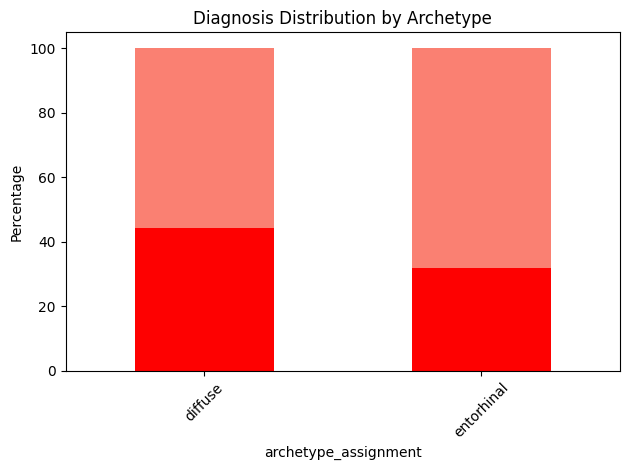


ml_stage One-way ANOVA p-value: 0.5754


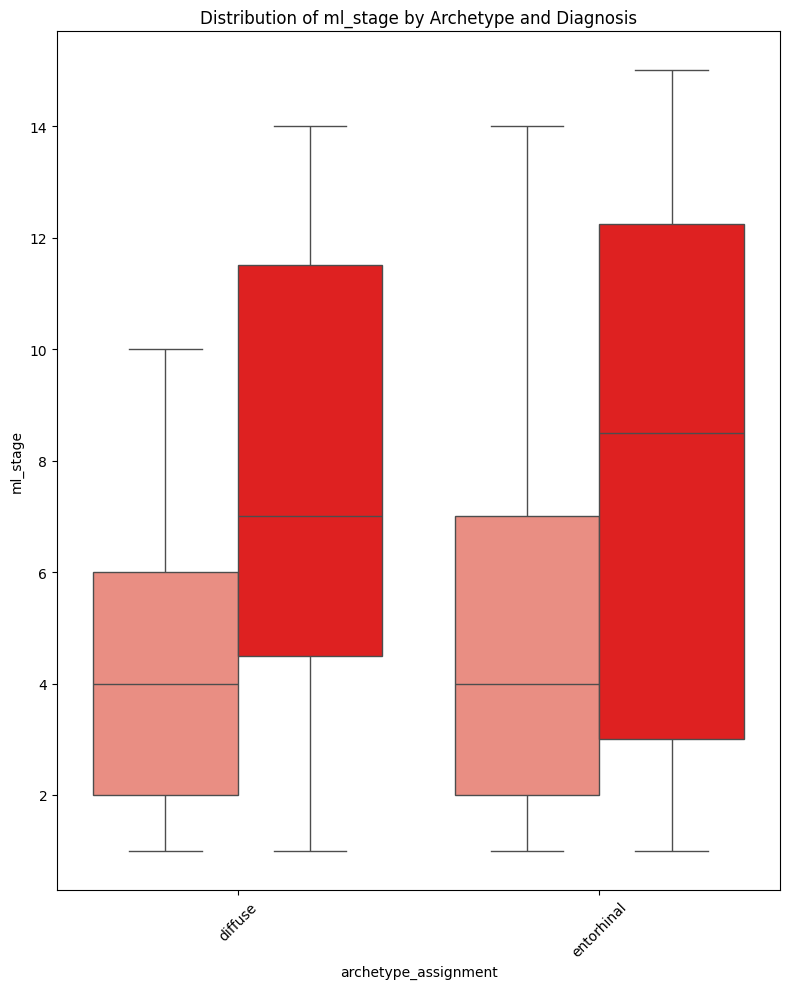

In [229]:
# Define consistent color palettes with pastel colors
gender_colors = {'Male': '#4E9BCD', 'Female': '#FF8B94'}  # Rich Blue and Pink
apoe_colors = {0: '#FFD93D', 1: '#6BCB77', 2: '#FF9F45'}  # Yellow, Green, Orange
diagnosis_colors = {'CN': '#7FBFE9', 'MCI': '#E07A7A', 'Dementia': '#D62728'}  # Keep original diagnosis colors

# Create plots for each demographic variable
variables = ['AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl', 'Diagnosis', 'ml_stage']
for var in variables:
    # Create new figure for each variable
    plt.figure(figsize=(8, 10))
    
    # Calculate statistics first (for printing only)
    if var in ['PTGENDER', 'APOE4', 'Diagnosis']:
        contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                                    demographic_correlation_data[var])
        contingency = contingency.loc[['diffuse', 'entorhinal']]
        chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
        print(f'\n{var} Chi-square test p-value: {p_value:.4f}')
        
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
    else:
        groups = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')[var]]
        f_stat, p_value = scipy.stats.f_oneway(*groups)
        print(f'\n{var} One-way ANOVA p-value: {p_value:.4f}')
    
    # Create plots with consistent colors
    if var in ['AGE', 'ADAS11_bl', 'ml_stage']:
        sns.boxplot(data=demographic_correlation_data, x='archetype_assignment', y=var, 
                   hue='Diagnosis', palette=color_palette, 
                   order=['diffuse', 'entorhinal'])
        plt.title(f'Distribution of {var} by Archetype and Diagnosis')
        # Remove legend
        plt.gca().get_legend().remove()
    elif var == 'PTGENDER':
        ax = contingency_pct.plot(kind='bar', stacked=True, color=[gender_colors[col] for col in contingency_pct.columns])
        plt.title('Gender Distribution by Archetype')
        plt.ylabel('Percentage')
        # Remove legend
        ax.get_legend().remove()
    elif var == 'APOE4':
        ax = contingency_pct.plot(kind='bar', stacked=True, color=[apoe_colors[col] for col in contingency_pct.columns])
        plt.title('APOE4 Distribution by Archetype')
        plt.ylabel('Percentage')
        # Remove legend
        ax.get_legend().remove()
    elif var == 'Diagnosis':
        ax = contingency_pct.plot(kind='bar', stacked=True, color=[color_palette[col] for col in contingency_pct.columns])
        plt.title('Diagnosis Distribution by Archetype')
        plt.ylabel('Percentage')
        # Remove legend
        ax.get_legend().remove()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # Display each plot individually


AGE:
One-way ANOVA: F(1,200) = 7.05, p = 8.5879e-03

Mean ± SD by archetype:
Diffuse: 70.64 ± 8.00
Entorhinal: 73.93 ± 7.61


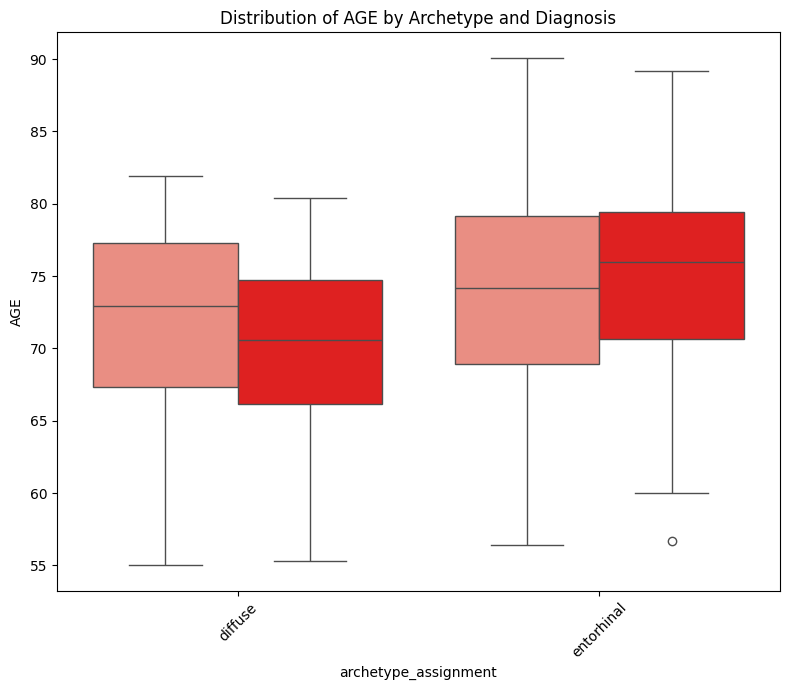


PTGENDER:
Chi-square test: χ²(1) = 1.21, p = 2.7039e-01

Percentage distribution:
PTGENDER              Female  Male
archetype_assignment              
diffuse                 34.6  65.4
entorhinal              44.7  55.3

Counts:
PTGENDER              Female  Male
archetype_assignment              
diffuse                   18    34
entorhinal                67    83


<Figure size 800x700 with 0 Axes>

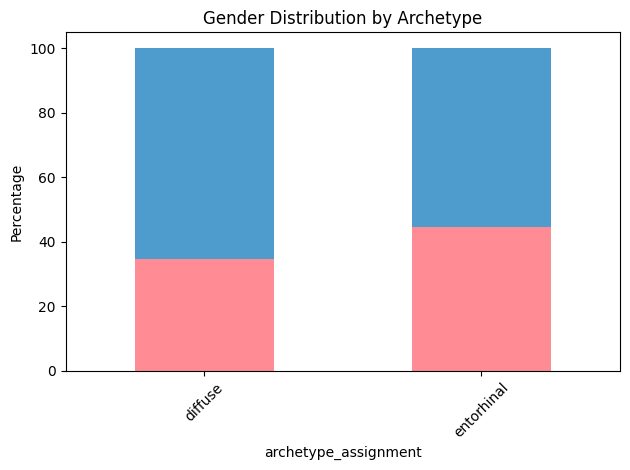


APOE4:
Chi-square test: χ²(2) = 6.08, p = 4.7796e-02

Percentage distribution:
APOE4                  0.0   1.0   2.0
archetype_assignment                  
diffuse               32.7  50.0  17.3
entorhinal            51.7  32.9  15.4

Counts:
APOE4                 0.0  1.0  2.0
archetype_assignment               
diffuse                17   26    9
entorhinal             77   49   23


<Figure size 800x700 with 0 Axes>

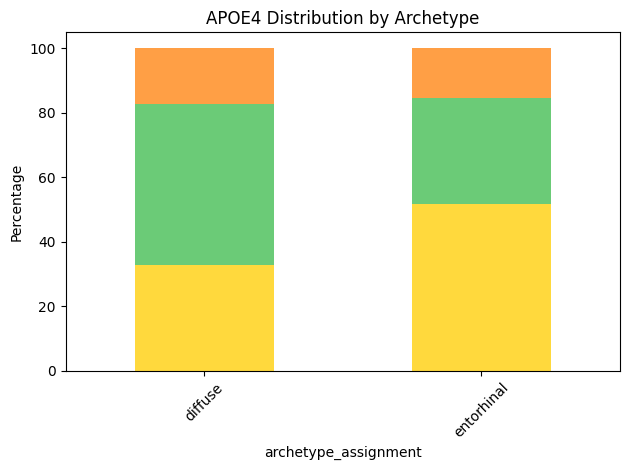


ADAS11_bl:
One-way ANOVA: F(1,200) = 1.33, p = 2.5039e-01

Mean ± SD by archetype:
Diffuse: 13.68 ± 7.42
Entorhinal: 12.52 ± 5.83


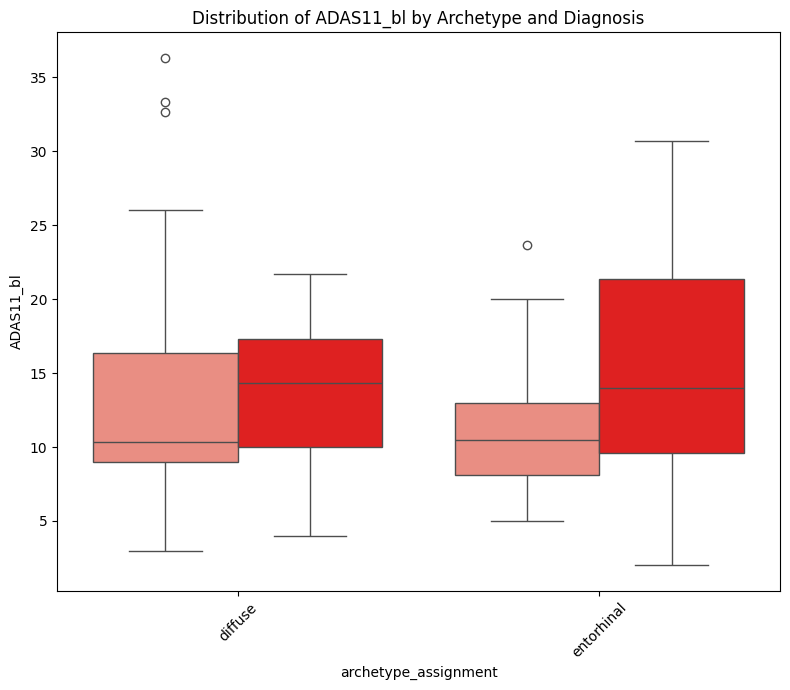


Diagnosis:
Chi-square test: χ²(1) = 2.03, p = 1.5463e-01

Percentage distribution:
Diagnosis             Dementia   MCI
archetype_assignment                
diffuse                   44.2  55.8
entorhinal                32.0  68.0

Counts:
Diagnosis             Dementia  MCI
archetype_assignment               
diffuse                     23   29
entorhinal                  48  102


<Figure size 800x700 with 0 Axes>

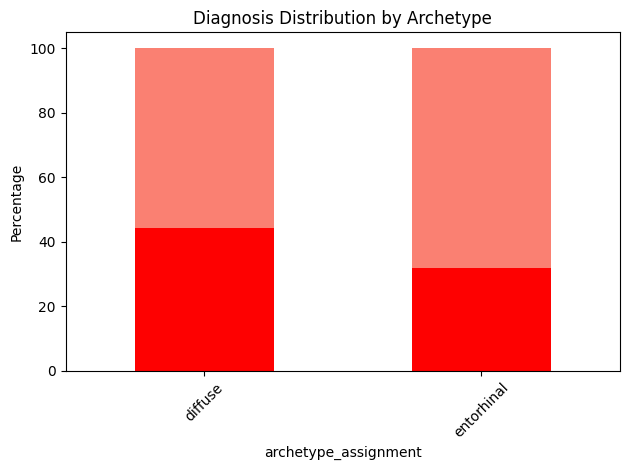


ml_stage:
One-way ANOVA: F(1,200) = 0.31, p = 5.7542e-01

Mean ± SD by archetype:
Diffuse: 5.69 ± 3.84
Entorhinal: 6.08 ± 4.44


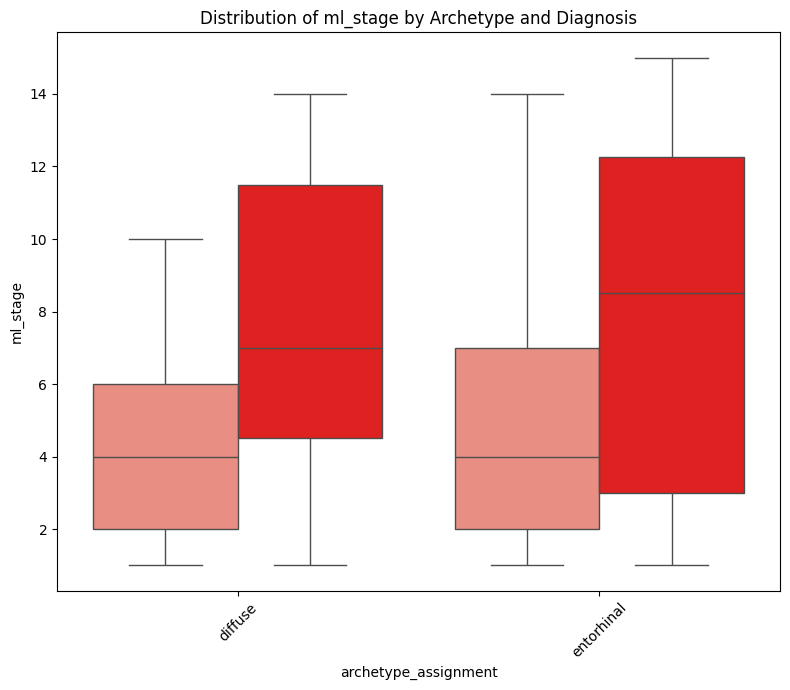

In [234]:
# Define consistent color palettes with pastel colors
gender_colors = {'Male': '#4E9BCD', 'Female': '#FF8B94'}  # Rich Blue and Pink
apoe_colors = {0: '#FFD93D', 1: '#6BCB77', 2: '#FF9F45'}  # Yellow, Green, Orange
diagnosis_colors = {'CN': '#7FBFE9', 'MCI': '#E07A7A', 'Dementia': '#D62728'}  # Keep original diagnosis colors

# Create plots for each demographic variable
variables = ['AGE', 'PTGENDER', 'APOE4', 'ADAS11_bl', 'Diagnosis', 'ml_stage']
for var in variables:
    # Create new figure for each variable
    plt.figure(figsize=(8, 7))
    
    # Calculate statistics first (for printing only)
    if var in ['PTGENDER', 'APOE4', 'Diagnosis']:
        contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                                    demographic_correlation_data[var])
        contingency = contingency.loc[['diffuse', 'entorhinal']]
        chi2, p_value, df, _ = scipy.stats.chi2_contingency(contingency)
        print(f'\n{var}:')
        print(f'Chi-square test: χ²({df}) = {chi2:.2f}, p = {p_value:.4e}')
        
        # Calculate and print percentages
        contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
        print("\nPercentage distribution:")
        print(contingency_pct.round(1))
        print("\nCounts:")
        print(contingency)
        
    else:
        groups = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')[var]]
        f_stat, p_value = scipy.stats.f_oneway(*groups)
        # Calculate degrees of freedom
        df1 = len(groups) - 1
        df2 = sum(len(g) for g in groups) - len(groups)
        print(f'\n{var}:')
        print(f'One-way ANOVA: F({df1},{df2}) = {f_stat:.2f}, p = {p_value:.4e}')
        
        # Calculate and print means
        print("\nMean ± SD by archetype:")
        for archetype in ['diffuse', 'entorhinal']:
            arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
            mean_val = arch_data[var].mean()
            std_val = arch_data[var].std()
            print(f"{archetype.capitalize()}: {mean_val:.2f} ± {std_val:.2f}")
    
    # Rest of plotting code remains the same
    if var in ['AGE', 'ADAS11_bl', 'ml_stage']:
        sns.boxplot(data=demographic_correlation_data, x='archetype_assignment', y=var, 
                   hue='Diagnosis', palette=color_palette, 
                   order=['diffuse', 'entorhinal'])
        plt.title(f'Distribution of {var} by Archetype and Diagnosis')
        plt.gca().get_legend().remove()
    elif var == 'PTGENDER':
        ax = contingency_pct.plot(kind='bar', stacked=True, color=[gender_colors[col] for col in contingency_pct.columns])
        plt.title('Gender Distribution by Archetype')
        plt.ylabel('Percentage')
        ax.get_legend().remove()
    elif var == 'APOE4':
        ax = contingency_pct.plot(kind='bar', stacked=True, color=[apoe_colors[col] for col in contingency_pct.columns])
        plt.title('APOE4 Distribution by Archetype')
        plt.ylabel('Percentage')
        ax.get_legend().remove()
    elif var == 'Diagnosis':
        ax = contingency_pct.plot(kind='bar', stacked=True, color=[color_palette[col] for col in contingency_pct.columns])
        plt.title('Diagnosis Distribution by Archetype')
        plt.ylabel('Percentage')
        ax.get_legend().remove()
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [235]:
# For AGE variable, split by archetype and diagnosis
for archetype in ['diffuse', 'entorhinal']:
    print(f"\n{archetype.capitalize()}:")
    for dx in ['MCI', 'Dementia']:
        mask = (demographic_correlation_data['archetype_assignment'] == archetype) & \
               (demographic_correlation_data['Diagnosis'] == dx)
        age_data = demographic_correlation_data[mask]['AGE']
        print(f"{dx}: {age_data.mean():.2f} ± {age_data.std():.2f} (n={len(age_data)})")


Diffuse:
MCI: 71.31 ± 7.87 (n=29)
Dementia: 69.79 ± 8.27 (n=23)

Entorhinal:
MCI: 73.50 ± 7.53 (n=102)
Dementia: 74.86 ± 7.77 (n=48)



AGE Two-way ANOVA results:
--------------------------------------------------
Archetype effect: p = 0.0078
Diagnosis effect: p = 0.6310
Interaction effect: p = 0.2577


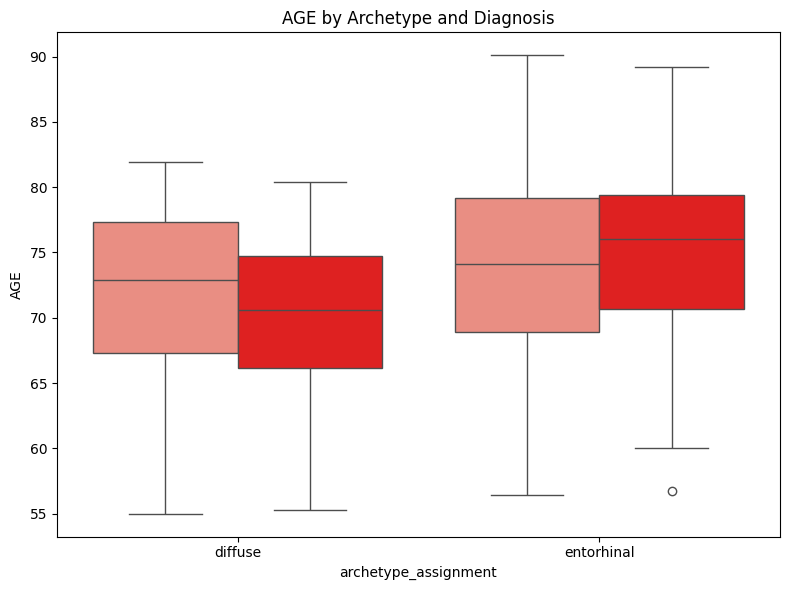


ADAS11_bl Two-way ANOVA results:
--------------------------------------------------
Archetype effect: p = 0.4252
Diagnosis effect: p = 0.0006
Interaction effect: p = 0.0162


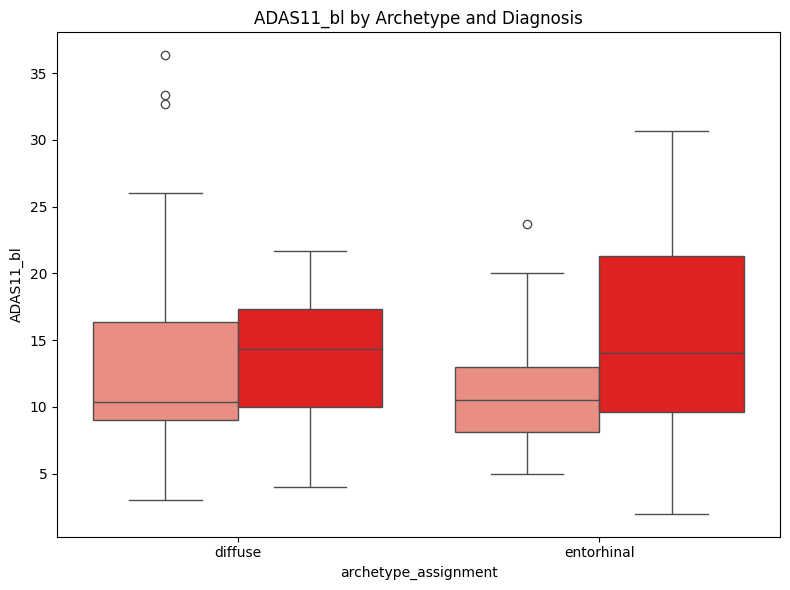


ml_stage Two-way ANOVA results:
--------------------------------------------------
Archetype effect: p = 0.2244
Diagnosis effect: p = 0.0000
Interaction effect: p = 0.5831


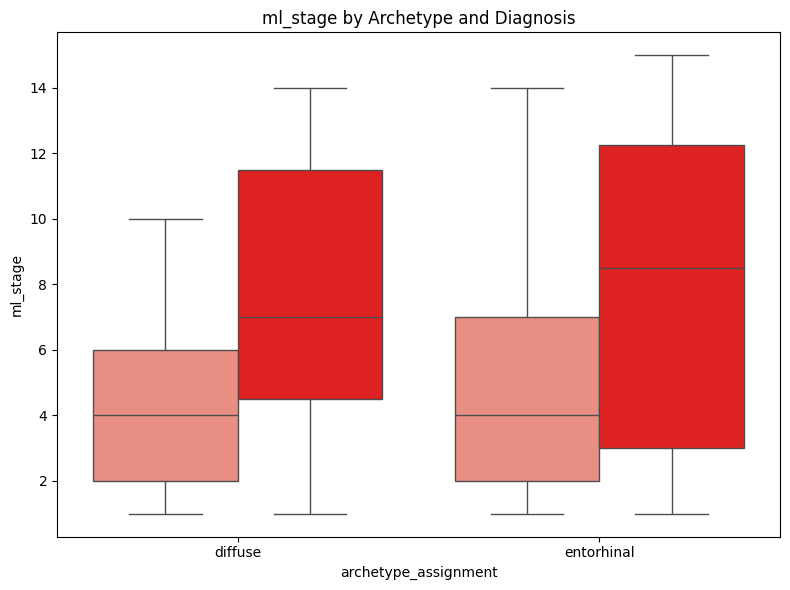

In [161]:
variables = ['AGE', 'ADAS11_bl', 'ml_stage']

for var in variables:
    # Create new figure for each variable
    plt.figure(figsize=(8, 6))
    
    # Perform two-way ANOVA
    from statsmodels.stats.anova import anova_lm
    from statsmodels.formula.api import ols
    
    model = ols(f'{var} ~ C(archetype_assignment) + C(Diagnosis) + C(archetype_assignment):C(Diagnosis)', 
               data=demographic_correlation_data).fit()
    aov_table = anova_lm(model, typ=2)
    
    # Print statistical results
    print(f"\n{var} Two-way ANOVA results:")
    print("-" * 50)
    print(f"Archetype effect: p = {aov_table.loc['C(archetype_assignment)', 'PR(>F)']:.4f}")
    print(f"Diagnosis effect: p = {aov_table.loc['C(Diagnosis)', 'PR(>F)']:.4f}")
    print(f"Interaction effect: p = {aov_table.loc['C(archetype_assignment):C(Diagnosis)', 'PR(>F)']:.4f}")
    
    # Create boxplot
    sns.boxplot(data=demographic_correlation_data, 
                x='archetype_assignment', 
                y=var, 
                hue='Diagnosis', 
                palette=color_palette,
                order=['diffuse', 'entorhinal'])
    
    plt.title(f'{var} by Archetype and Diagnosis')
    
    # Remove legend
    plt.gca().get_legend().remove()
    
    plt.tight_layout()
    plt.show()

### Plot total tau trajectory of each archetype 

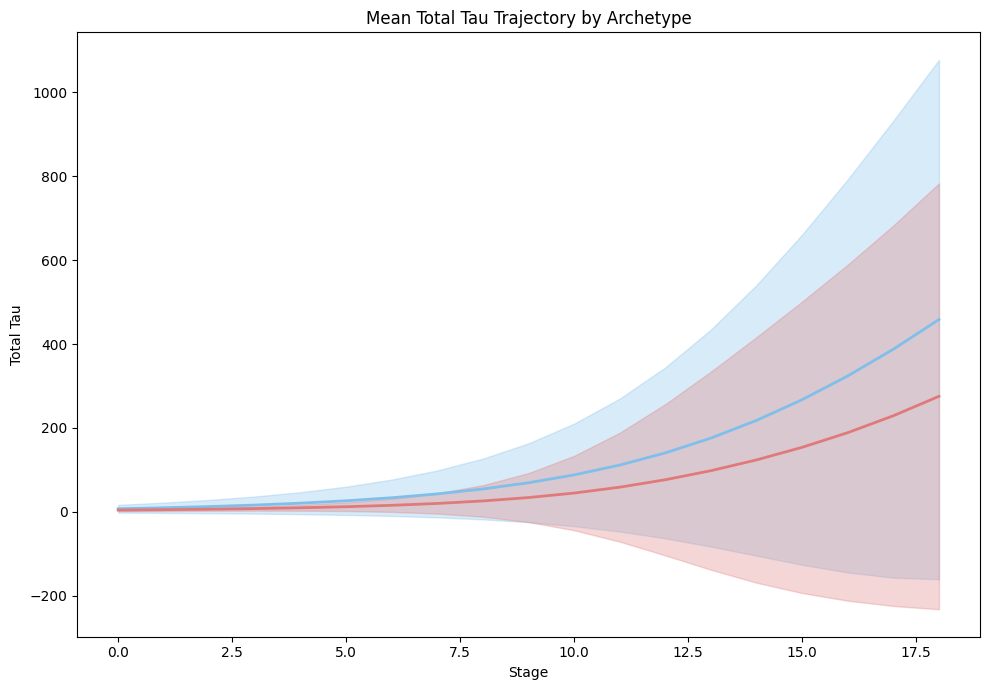

Number of subjects in diffuse group: 41
Number of subjects in entorhinal group: 121


In [107]:
import pickle
import numpy as np

# Load the pickle file
with open('/Users/robinsandell/Desktop/Raj Lab/EBM + Nexis/CODE EBM + Nexis/Nexis/seed vs. param op/timeseries_all_dict.pkl', 'rb') as f:
    timeseries_all_dict = pickle.load(f)

# Initialize dictionaries to store total tau for each archetype
diffuse_trajectories = []
entorhinal_trajectories = []

# Calculate total tau for each subject and assign to appropriate archetype
for rid, df in timeseries_all_dict.items():
    # Calculate total tau at each timepoint
    total_tau = df.sum(axis=0)
    
    # Get subject's archetype
    if rid in demographic_correlation_data['RID'].values:
        archetype = demographic_correlation_data[demographic_correlation_data['RID'] == rid]['archetype_assignment'].values[0]
        
        # Store trajectory in appropriate list
        if archetype == 'diffuse':
            diffuse_trajectories.append(total_tau)
        elif archetype == 'entorhinal':
            entorhinal_trajectories.append(total_tau)

# Convert to numpy arrays for easier calculation
diffuse_trajectories = np.array(diffuse_trajectories)
entorhinal_trajectories = np.array(entorhinal_trajectories)

# Calculate means and standard deviations
diffuse_mean = np.mean(diffuse_trajectories, axis=0)
diffuse_std = np.std(diffuse_trajectories, axis=0)
entorhinal_mean = np.mean(entorhinal_trajectories, axis=0)
entorhinal_std = np.std(entorhinal_trajectories, axis=0)

# Create the plot
plt.figure(figsize=(10, 7))

# Plot means and shaded areas for both archetypes
stages = np.arange(len(diffuse_mean))

# Yellow for diffuse
plt.plot(stages, diffuse_mean, color='#FFD93D', linewidth=2)  # Bright yellow
plt.fill_between(stages, 
                diffuse_mean - diffuse_std, 
                diffuse_mean + diffuse_std, 
                color='#FFD93D', 
                alpha=0.3)

# Red for entorhinal
plt.plot(stages, entorhinal_mean, color='#FF6B6B', linewidth=2)  # Coral red
plt.fill_between(stages, 
                entorhinal_mean - entorhinal_std, 
                entorhinal_mean + entorhinal_std, 
                color='#FF6B6B', 
                alpha=0.3)

plt.xlabel('Stage')
plt.ylabel('Total Tau')
plt.title('Mean Total Tau Trajectory by Archetype')
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of subjects in diffuse group: {len(diffuse_trajectories)}")
print(f"Number of subjects in entorhinal group: {len(entorhinal_trajectories)}")

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_1008/3056384284.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=demographic_correlation_data,


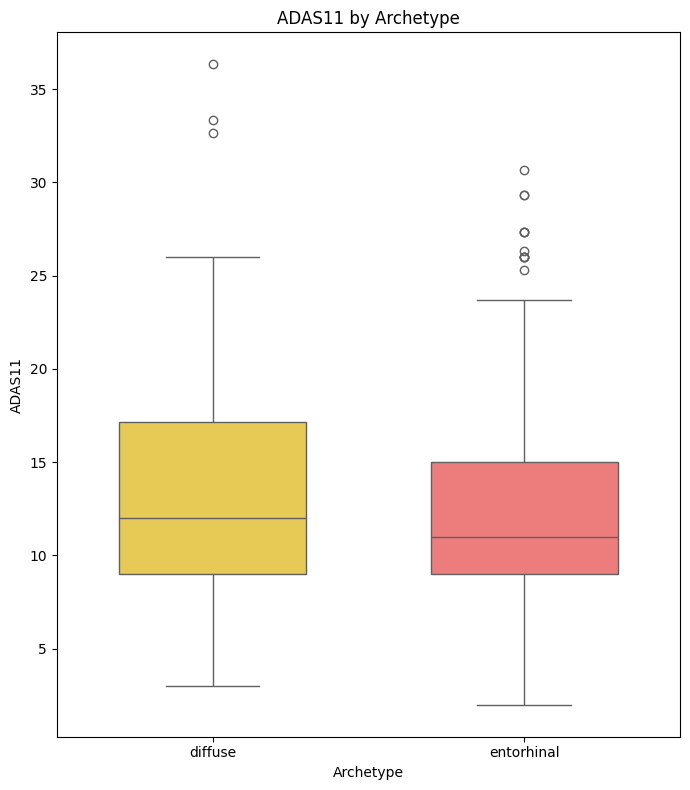

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_1008/3056384284.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=demographic_correlation_data,


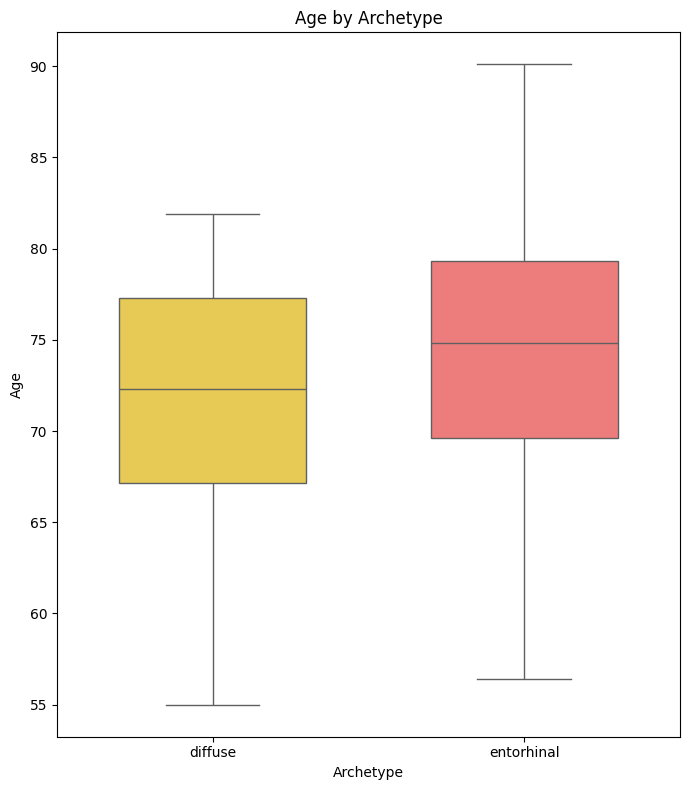

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_1008/3056384284.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=demographic_correlation_data,


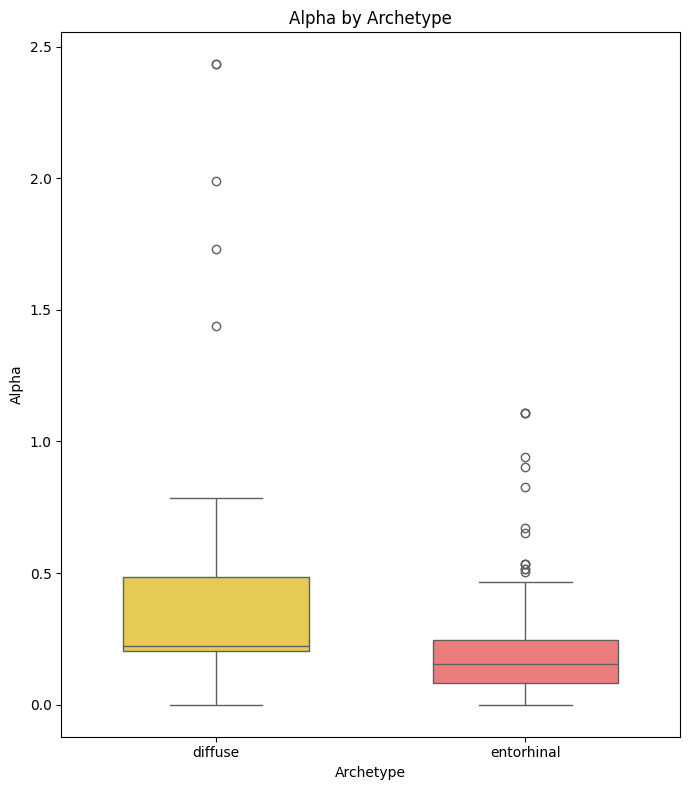

One-way ANOVA test results:

ADAS11:
F = 1.33, p = 0.2504

Age:
F = 7.05, p = 0.0086

Alpha:
F = 19.26, p = 0.0000

Mean ± SD values by archetype:

Diffuse:
ADAS11: 13.679 ± 7.416
Age: 70.640 ± 8.002
Alpha: 0.438 ± 0.555

Entorhinal:
ADAS11: 12.515 ± 5.831
Age: 73.934 ± 7.609
Alpha: 0.201 ± 0.214


In [8]:
# ADAS plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='ADAS11_bl',
           width=0.6,
           palette=archetype_palette,
           order=['diffuse', 'entorhinal'])
plt.title('ADAS11 by Archetype')
plt.ylabel('ADAS11')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Age plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='AGE',
           width=0.6,
           palette=archetype_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Age by Archetype')
plt.ylabel('Age')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Alpha plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='alpha',
           width=0.6,
           palette=archetype_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Alpha by Archetype')
plt.ylabel('Alpha')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Print all statistics
print("One-way ANOVA test results:")

# ADAS stats
groups_adas = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['ADAS11_bl']]
f_stat_adas, p_val_adas = scipy.stats.f_oneway(*groups_adas)
print(f"\nADAS11:")
print(f"F = {f_stat_adas:.2f}, p = {p_val_adas:.4f}")

# Age stats
groups_age = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['AGE']]
f_stat_age, p_val_age = scipy.stats.f_oneway(*groups_age)
print(f"\nAge:")
print(f"F = {f_stat_age:.2f}, p = {p_val_age:.4f}")

# Alpha stats
groups_alpha = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['alpha']]
f_stat_alpha, p_val_alpha = scipy.stats.f_oneway(*groups_alpha)
print(f"\nAlpha:")
print(f"F = {f_stat_alpha:.2f}, p = {p_val_alpha:.4f}")

# Print mean and std values
print("\nMean ± SD values by archetype:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"ADAS11: {arch_data['ADAS11_bl'].mean():.3f} ± {arch_data['ADAS11_bl'].std():.3f}")
    print(f"Age: {arch_data['AGE'].mean():.3f} ± {arch_data['AGE'].std():.3f}")
    print(f"Alpha: {arch_data['alpha'].mean():.3f} ± {arch_data['alpha'].std():.3f}")

/var/folders/s8/x9wmskq97fv12b1hfqdfvybh0000gn/T/ipykernel_1008/2491169418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=demographic_correlation_data,


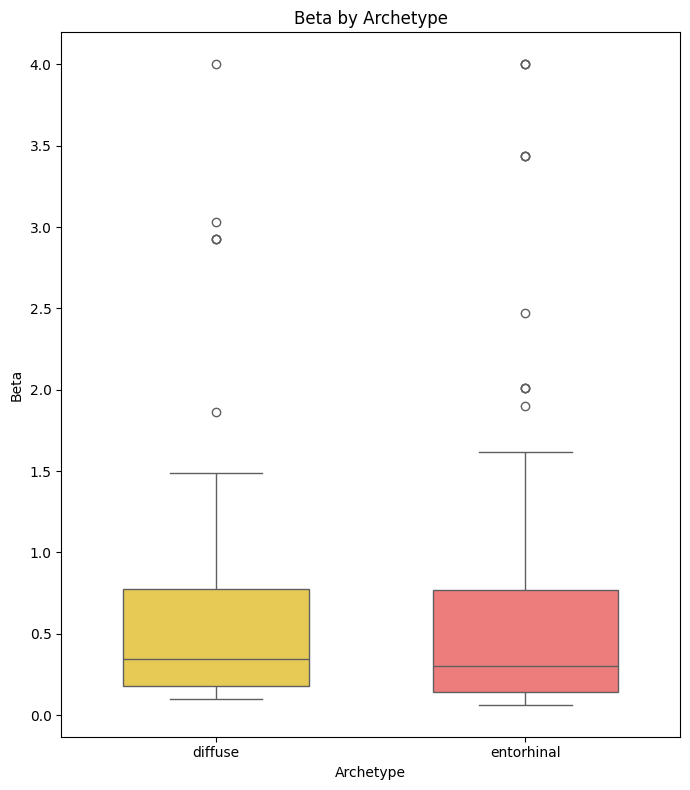


Beta:
F = 0.57, p = 0.4501

Mean ± SD values by archetype:

Diffuse:
Beta: 0.714 ± 0.896

Entorhinal:
Beta: 0.613 ± 0.806


In [9]:
# Beta plot
plt.figure(figsize=(7, 8))
sns.boxplot(data=demographic_correlation_data, 
           x='archetype_assignment', 
           y='beta',
           width=0.6,
           palette=custom_palette,
           order=['diffuse', 'entorhinal'])
plt.title('Beta by Archetype')
plt.ylabel('Beta')
plt.xlabel('Archetype')
plt.tight_layout()
plt.show()

# Print statistics for beta
groups_beta = [group for _, group in demographic_correlation_data.groupby('archetype_assignment')['beta']]
f_stat_beta, p_val_beta = scipy.stats.f_oneway(*groups_beta)
print(f"\nBeta:")
print(f"F = {f_stat_beta:.2f}, p = {p_val_beta:.4f}")

# Print mean and std values for beta
print("\nMean ± SD values by archetype:")
for archetype in ['diffuse', 'entorhinal']:
    arch_data = demographic_correlation_data[demographic_correlation_data['archetype_assignment'] == archetype]
    print(f"\n{archetype.capitalize()}:")
    print(f"Beta: {arch_data['beta'].mean():.3f} ± {arch_data['beta'].std():.3f}")


APOE4 Chi-square test p-value: 0.0277

Percentage distribution:
APOE4_combined        APOE4+  No APOE4
archetype_assignment                  
diffuse                 67.3      32.7
entorhinal              48.3      51.7

Counts:
APOE4_combined        APOE4+  No APOE4
archetype_assignment                  
diffuse                   35        17
entorhinal                72        77


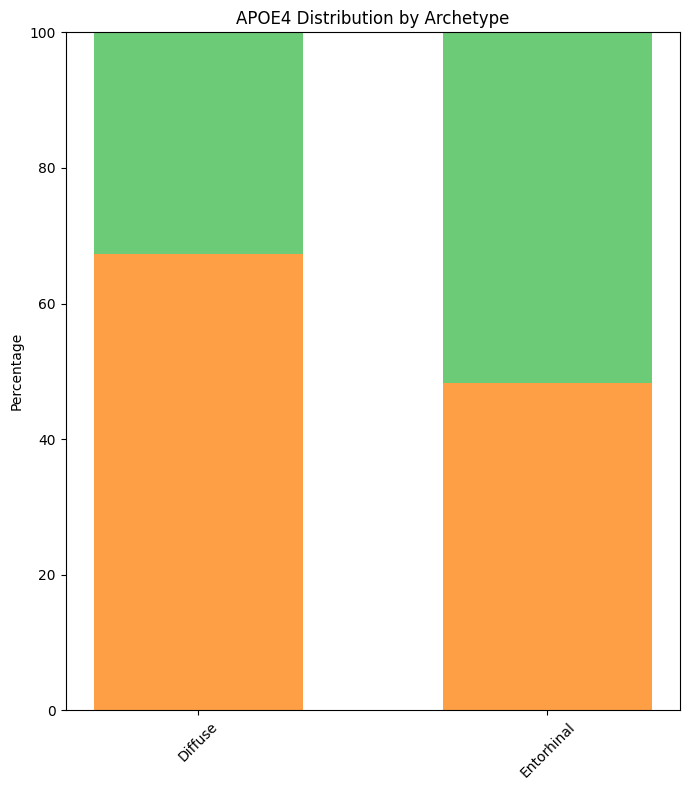

In [35]:
# Create figure first
plt.figure(figsize=(7, 8))

# For APOE4, combine groups 1 and 2
demographic_correlation_data['APOE4_combined'] = demographic_correlation_data['APOE4'].map({0: 'No APOE4', 1: 'APOE4+', 2: 'APOE4+'})

# Calculate contingency table and percentages
contingency = pandas.crosstab(demographic_correlation_data['archetype_assignment'], 
                            demographic_correlation_data['APOE4_combined'])
contingency = contingency.loc[['diffuse', 'entorhinal']]
contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100

# Calculate statistics
chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
print(f'\nAPOE4 Chi-square test p-value: {p_value:.4f}')
print("\nPercentage distribution:")
print(contingency_pct.round(1))
print("\nCounts:")
print(contingency)

# Plot stacked bars
bottom = numpy.zeros(2)  # for 'diffuse' and 'entorhinal'
x = numpy.arange(2)
apoe_colors_combined = {'No APOE4': '#6BCB77', 'APOE4+': '#FF9F45'}  # Green and Orange

for col in contingency_pct.columns:
    plt.bar(x, contingency_pct[col], bottom=bottom, 
           label=col, color=apoe_colors_combined[col], width=0.6)
    bottom += contingency_pct[col]

plt.xticks(x, ['Diffuse', 'Entorhinal'], rotation=45)
plt.title('APOE4 Distribution by Archetype')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()